In [1]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is in use:", tf.config.list_physical_devices('GPU'))
else:
    print("CPU is in use")


GPU is in use: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# For navigation in the folders
import pathlib
from pathlib import Path

# Import for date and time operations
from datetime import datetime
from time import strptime, strftime

# For progress bars
from tqdm import tqdm

# For plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# For data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
import pickle

# Seaborn settings for clean plots
sns.set(style="white", palette="muted")
sns.despine()

# Example path usage with pathlib
# current_dir = Path.cwd()
# another_example = current_dir / 'subfolder' / 'file.txt'


<Figure size 640x480 with 0 Axes>

In [3]:
import yfinance as yf
import os

# List of Nifty 50 stock tickers
nifty50_tickers = [
    'RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'TCS.NS', 'HINDUNILVR.NS',
    'ITC.NS', 'KOTAKBANK.NS', 'LT.NS', 'SBIN.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS',
    'AXISBANK.NS', 'HDFC.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'SUNPHARMA.NS', 'TITAN.NS',
    'ULTRACEMCO.NS', 'NTPC.NS', 'TATASTEEL.NS', 'TECHM.NS', 'POWERGRID.NS', 'NESTLEIND.NS',
    'M&M.NS', 'INDUSINDBK.NS', 'JSWSTEEL.NS', 'HCLTECH.NS', 'BAJAJFINSV.NS', 'ADANIGREEN.NS',
    'CIPLA.NS', 'ADANIPORTS.NS', 'DRREDDY.NS', 'ONGC.NS', 'TATACONSUM.NS', 'BRITANNIA.NS',
    'GRASIM.NS', 'HEROMOTOCO.NS', 'WIPRO.NS', 'DIVISLAB.NS', 'EICHERMOT.NS', 'HINDALCO.NS',
    'COALINDIA.NS', 'BPCL.NS', 'APOLLOHOSP.NS', 'SBILIFE.NS', 'BAJAJ-AUTO.NS', 'ADANIENT.NS',
    'ICICIGI.NS', 'ICICIPRULI.NS'
]

# Create a directory to store CSV files if it doesn't exist
if not os.path.exists('nifty50_data'):
    os.makedirs('nifty50_data')

# Download historical data for each stock and save to CSV
for ticker in nifty50_tickers:
    print(f"Downloading data for {ticker}...")
    stock_data = yf.Ticker(ticker)
    data = stock_data.history(period="5y")  # Adjust the period as needed (e.g., '5y', 'max')

    # Save the data to a CSV file
    csv_file = f'nifty50_data/{ticker}.csv'
    data.to_csv(csv_file)
    print(f"Data for {ticker} saved to {csv_file}")

print("All data downloaded and saved.")


Data for RELIANCE.NS saved to nifty50_data/RELIANCE.NS.csv
Data for HDFCBANK.NS saved to nifty50_data/HDFCBANK.NS.csv
Data for ICICIBANK.NS saved to nifty50_data/ICICIBANK.NS.csv
Data for INFY.NS saved to nifty50_data/INFY.NS.csv
Data for TCS.NS saved to nifty50_data/TCS.NS.csv
Data for HINDUNILVR.NS saved to nifty50_data/HINDUNILVR.NS.csv
Data for ITC.NS saved to nifty50_data/ITC.NS.csv
Data for KOTAKBANK.NS saved to nifty50_data/KOTAKBANK.NS.csv
Data for LT.NS saved to nifty50_data/LT.NS.csv
Data for SBIN.NS saved to nifty50_data/SBIN.NS.csv
Data for BAJFINANCE.NS saved to nifty50_data/BAJFINANCE.NS.csv
Data for BHARTIARTL.NS saved to nifty50_data/BHARTIARTL.NS.csv
Data for AXISBANK.NS saved to nifty50_data/AXISBANK.NS.csv


ERROR:yfinance:$HDFC.NS: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


Data for HDFC.NS saved to nifty50_data/HDFC.NS.csv
Data for ASIANPAINT.NS saved to nifty50_data/ASIANPAINT.NS.csv
Data for MARUTI.NS saved to nifty50_data/MARUTI.NS.csv
Data for SUNPHARMA.NS saved to nifty50_data/SUNPHARMA.NS.csv
Data for TITAN.NS saved to nifty50_data/TITAN.NS.csv
Data for ULTRACEMCO.NS saved to nifty50_data/ULTRACEMCO.NS.csv
Data for NTPC.NS saved to nifty50_data/NTPC.NS.csv
Data for TATASTEEL.NS saved to nifty50_data/TATASTEEL.NS.csv
Data for TECHM.NS saved to nifty50_data/TECHM.NS.csv
Data for POWERGRID.NS saved to nifty50_data/POWERGRID.NS.csv
Data for NESTLEIND.NS saved to nifty50_data/NESTLEIND.NS.csv
Data for M&M.NS saved to nifty50_data/M&M.NS.csv
Data for INDUSINDBK.NS saved to nifty50_data/INDUSINDBK.NS.csv
Data for JSWSTEEL.NS saved to nifty50_data/JSWSTEEL.NS.csv
Data for HCLTECH.NS saved to nifty50_data/HCLTECH.NS.csv
Data for BAJAJFINSV.NS saved to nifty50_data/BAJAJFINSV.NS.csv
Data for ADANIGREEN.NS saved to nifty50_data/ADANIGREEN.NS.csv
Data for CIPL

In [4]:
from pathlib import Path

# Define the path to the data directory
data_dir = Path.cwd() / 'nifty50_data'

# List all files in the directory
files_tags = [file for file in data_dir.iterdir() if file.is_file()]

# Remove hidden files (those starting with a dot)
files_tags = [file for file in files_tags if not file.name.startswith('.')]

# Extract stock names from the filenames (splitting by '_')
stock_name = [file.name[:-7] for file in files_tags]
stocks = [file.name for file in files_tags]

# Checking if the number of stock names matches the number of files
print(len(stock_name) == len(stocks))
print(f'There are {len(stock_name)} different stocks.')
# print(stock_name)


True
There are 50 different stocks.


In [5]:
# Configure TensorFlow to use GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Distributed training strategy
strategy = tf.distribute.MirroredStrategy()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm

# Define the path to the data directory

# Initialize lists to store kept and not-kept stocks
kept_stocks = []
not_kept_stocks = []

# Loop over each stock file and load the data
for s in tqdm(stocks):
    # Build the full path for each stock file
    file_path = data_dir / s

    # Read the CSV file
    df = pd.read_csv(file_path)

    print(len(df))

    # Keep only files with 1259 rows
    if len(df) != 1238:
        not_kept_stocks.append(s)
    else:
        kept_stocks.append(s)


 52%|█████▏    | 26/50 [00:00<00:00, 255.57it/s]

1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
0
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239
1239


100%|██████████| 50/50 [00:00<00:00, 253.97it/s]

1239
1239


In [8]:
print(kept_stocks)
for i, stock in enumerate(kept_stocks):
    if stock == 'ITC.NS.csv':
        print(i)

[]


In [9]:
kept_stock_rl = ['ITC.NS.csv','TITAN.NS.csv','BAJAJ-AUTO.NS.csv','M&M.NS.csv','BHARTIARTL.NS.csv']

# kept_stock_rl = [kept_stocks[3], kept_stocks[24], kept_stocks[17], kept_stocks[22], kept_stocks[34]]
print(kept_stock_rl)
# American Electric Power Company, Inc -- Electric Utilities
# AmerisourceBergen Corporation -- Healthcare and Pharmaceuticals
# Boston Properties, Inc -- Real Estate (REIT)
# Apache Corporation. -- Oil & Gas
# Anadarko Petroleum Corporation -- Oil & Gas


['ITC.NS.csv', 'TITAN.NS.csv', 'BAJAJ-AUTO.NS.csv', 'M&M.NS.csv', 'BHARTIARTL.NS.csv']


In [10]:
# Initialize lists to store 'open', 'close', 'high', and 'low' values
list_open = []
list_close = []
list_high = []
list_low = []

# Loop over each kept stock file and extract 'open', 'close', 'high', 'low' columns
for s in tqdm(kept_stock_rl):
    # Build the full path for each stock file
    file_path = data_dir / s

    # Read the CSV file, fill missing data, and copy relevant columns
    data = pd.read_csv(file_path).fillna(method='bfill').copy()
    data = data[['Open', 'Close', 'High', 'Low']]

    # Append the stock data to the respective lists
    list_open.append(data['Open'].values)
    list_close.append(data['Close'].values)
    list_high.append(data['High'].values)
    list_low.append(data['Low'].values)

# Convert the lists to NumPy arrays and perform the necessary transpositions
array_open = np.transpose(np.array(list_open))[:-1]
array_open_of_the_day = np.transpose(np.array(list_open))[1:]
array_close = np.transpose(np.array(list_close))[:-1]
array_high = np.transpose(np.array(list_high))[:-1]
array_low = np.transpose(np.array(list_low))[:-1]

# Check the shape of the resulting arrays
print(f'Array open shape: {array_open.shape}')
print(f'Array close shape: {array_close.shape}')
print(f'Array high shape: {array_high.shape}')
print(f'Array low shape: {array_low.shape}')


  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-10-64008aae83d9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = pd.read_csv(file_path).fillna(method='bfill').copy()
<ipython-input-10-64008aae83d9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = pd.read_csv(file_path).fillna(method='bfill').copy()
<ipython-input-10-64008aae83d9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = pd.read_csv(file_path).fillna(method='bfill').copy()
<ipython-input-10-64008aae83d9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = pd.read_csv(file_path).fillna(method='bfill').copy()
<ipython-input-10-64008aae8

Array open shape: (1238, 5)
Array close shape: (1238, 5)
Array high shape: (1238, 5)
Array low shape: (1238, 5)


In [11]:
# Create the X array with the specified transformations
X = np.transpose(np.array([array_close / array_open,
                           array_high / array_open,
                           array_low / array_open,
                           array_open_of_the_day / array_open]), axes=(0, 2, 1))

X = X.astype(np.float64)
# Output the shape of X
print(f'X shape: {X.shape}')

X shape: (4, 5, 1238)


In [12]:
import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
from gym.envs.registration import register

class TradeEnv():
    """
    This class is the trading environment (render) of our project.

    The trading agent calls the class by giving an action at the time t.
    Then the render gives back the new portfolio at the next step (time t+1).
    """

    def __init__(self, window_length=50, portfolio_value=10000, trading_cost=0.25/100, interest_rate=0.02/250, train_size=0.7):
        # Assuming `X` is the input data (already calculated from previous sections)
        self.data = X

        # Parameters
        self.portfolio_value = portfolio_value
        self.window_length = window_length
        self.trading_cost = trading_cost
        self.interest_rate = interest_rate

        # Number of stocks and features
        self.nb_stocks = self.data.shape[1]
        self.nb_features = self.data.shape[0]
        self.end_train = int((self.data.shape[2] - self.window_length) * train_size)

        # Initialize state and index
        self.index = None
        self.state = None
        self.done = False

        # Init seed
        self.seed()

    def return_pf(self):
        """
        Returns the value of the portfolio
        """
        return self.portfolio_value

    def readTensor(self, X, t):
        """
        Read tensor with the given window length up to time t
        """
        # print('Reading Tensor : ',t)
        return X[:, :, t - self.window_length:t]

    def readUpdate(self, t):
        """
        Returns the update vector of stock values at time t
        """
        #Open(t+1)/Open(t)
        #t --> represents previous state's time

        return np.array([1 + self.interest_rate] + self.data[-1, :, t].tolist())

    def seed(self, seed=None):
        """
        Set random seed
        """
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self, w_init, p_init, t=0):
        """
        Resets the environment with the given initial weights and portfolio value
        """
        self.state = (self.readTensor(self.data, self.window_length), w_init, p_init)
        self.index = self.window_length + t
        # print('Index : ',self.index)
        self.done = False

        return self.state, self.done

    def step(self, action):
        """
        Executes the action and computes the new state, portfolio, and reward
        """
        index = self.index
        data = self.readTensor(self.data, index)
        done = self.done

        # Previous State Details
        state = self.state
        w_previous = state[1]
        pf_previous = state[2]

        # Get update vector (price evolution)
        update_vector = self.readUpdate(index)

        # Allocation choice
        w_alloc = action
        pf_alloc = pf_previous

        # Compute transaction cost
        cost = pf_alloc * np.linalg.norm((w_alloc - w_previous), ord=1) * self.trading_cost

        # Convert weight vector to value vector
        v_alloc = pf_alloc * w_alloc

        # Pay transaction costs
        pf_trans = pf_alloc - cost #P_t
        v_trans = v_alloc - np.array([cost] + [0] * self.nb_stocks)

        # Market price evolution (end of day)
        v_evol = v_trans * update_vector

        # Compute new portfolio value
        pf_evol = np.sum(v_evol)

        # Compute new weight vector
        w_evol = v_evol / pf_evol

        # Compute reward as portfolio growth
        reward = (pf_evol - pf_previous) / pf_previous

        # Update index (moving forward in time)
        index += 1

        # Update state for the next step
        state = (self.readTensor(self.data, index), w_evol, pf_evol)

        if index >= self.end_train:
            done = True

        # Set new state, index, and done flag
        self.state = state
        self.index = index
        self.done = done

        return state, reward, done

**Parameter Setting**

In [13]:
import tensorflow as tf
import numpy as np

# Assuming `X` and other components have been defined as part of the environment setup

# Data (from the earlier `TradeEnv` code block)
data = np.array(X)
trading_period = data.shape[2]
nb_feature_map = data.shape[0]
nb_stocks = data.shape[1]

# Fix parameters of the netawork based on the number of stocks
m = nb_stocks
list_stock = [i for i in range(m)]

###############################Dictionaries of the problem###########################
dict_hp_net = {
    'n_filter_1': 2,
    'n_filter_2': 20,
    'kernel1_size': (1, 3)
}

dict_hp_pb = {
    'batch_size': 100,
    'ratio_train': 0.6,
    'ratio_val': 0.2,
    'length_tensor': 12,
    'ratio_greedy': 0.9,
    'ratio_regul': 0.1
}

dict_hp_opt = {
    'regularization': 1e-8,
    'learning': 9e-2
}

dict_fin = {
    'trading_cost': 0.25/100,
    'interest_rate': 0.02/250,
    'cash_bias_init': 0.7
}

dict_train = {
    'pf_init_train': 10000,
    'w_init_train': 'd',  # dynamic initialization
    'n_episodes': 100,
    'n_batches': 300
}

dict_test = {
    'pf_init_test': 10000,
    'w_init_test': 'd'  # dynamic initialization
}

###############################HP of the network ###########################
n_filter_1 = dict_hp_net['n_filter_1']
n_filter_2 = dict_hp_net['n_filter_2']
kernel1_size = dict_hp_net['kernel1_size']

###############################HP of the problem###########################

# Size of mini-batch during training
batch_size = dict_hp_pb['batch_size']

# Total number of steps for pre-training in the training set
total_steps_train = int(dict_hp_pb['ratio_train'] * trading_period)

# Total number of steps for pre-training in the validation set
total_steps_val = int(dict_hp_pb['ratio_val'] * trading_period)

# Total number of steps for the test
total_steps_test = trading_period - total_steps_train - total_steps_val

# Number of the columns (number of the trading periods) in each input price matrix
n = dict_hp_pb['length_tensor']

ratio_greedy = dict_hp_pb['ratio_greedy']
ratio_regul = dict_hp_pb['ratio_regul']

##############################HP of the optimization###########################

# The L2 regularization coefficient applied to network training
regularization = dict_hp_opt['regularization']

# Parameter alpha (i.e. the step size) of the Adam optimization
learning = dict_hp_opt['learning']
optimizer = tf.keras.optimizers.Adam(learning_rate=learning)

##############################Finance parameters###########################

trading_cost = dict_fin['trading_cost']
interest_rate = dict_fin['interest_rate']
cash_bias_init = dict_fin['cash_bias_init']

############################## PVM Parameters ###########################
sample_bias = 5e-5  # Beta in the geometric distribution for online training sample batches

############################## Training Parameters ###########################

# Initial weights and portfolio for training
w_init_train = np.array([1.0] + [0.0] * m)
pf_init_train = dict_train['pf_init_train']

n_episodes = dict_train['n_episodes']
n_batches = dict_train['n_batches']

############################## Test Parameters ###########################

# Initial weights and portfolio for testing
w_init_test = np.array([1.0] + [0.0] * m)
pf_init_test = dict_test['pf_init_test']

############################## Other environment Parameters ###########################

# Equal weights portfolio (for comparison or baseline strategy)
w_eq = np.array([1/(m+1)] * (m+1))

w_s = np.array([1] + [0.0] * m)

# ############################### TensorFlow 2.x Example ###############################
# # Since TensorFlow 2.x operates in eager mode by default, we don't need to initialize sessions or placeholders.

# # Example of creating a simple model using Keras (which is built into TensorFlow 2.x):
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=n_filter_1, kernel_size=kernel1_size, activation='relu', input_shape=(nb_feature_map, m+1, n)),
#     tf.keras.layers.Conv2D(filters=n_filter_2, kernel_size=kernel1_size, activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=m+1, activation='softmax')  # Output layer for stock allocations
# ])

# # Compile the model with the Adam optimizer and a loss function
# model.compile(optimizer=optimizer, loss='mean_squared_error')

# # Summary of the model structure
# model.summary()


In [14]:
#random action function

def get_random_action(m):
    random_vec = np.random.rand(m+1)
    return random_vec/np.sum(random_vec)

**Environment Creation**

In [15]:
#environment for trading of the agent
# this is the agent trading environment (policy network agent)
env = TradeEnv(window_length=n,
               portfolio_value=pf_init_train, trading_cost=trading_cost,
               interest_rate=interest_rate, train_size=dict_hp_pb['ratio_train'])


#environment for equiweighted
#this environment is set up for an agent who only plays an equiweithed portfolio (baseline)
env_eq = TradeEnv(window_length=n,
               portfolio_value=pf_init_train, trading_cost=trading_cost,
               interest_rate=interest_rate, train_size=dict_hp_pb['ratio_train'])

#environment secured (only money)
#this environment is set up for an agentwho plays secure, keeps its money
env_s = TradeEnv(window_length=n,
               portfolio_value=pf_init_train, trading_cost=trading_cost,
               interest_rate=interest_rate, train_size=dict_hp_pb['ratio_train'])


In [16]:
# Action list for agents, one for each stock
action_fu = []
# Environment list for agents, one environment per stock
env_fu = []

# Number of stocks (assuming `m` is predefined based on previous steps)
m = nb_stocks

# Set up individual environments for each stock
for i in range(m):
    # Create an action array where the agent invests fully in the i-th stock
    action = np.array([0.0]*(i+1) + [1.0] + [0.0]*(m-(i+1)))
    action_fu.append(action)

    # Create an environment specific to each stock
    env_fu_i = TradeEnv(window_length=n,
                        portfolio_value=pf_init_train,
                        trading_cost=trading_cost,
                        interest_rate=interest_rate,
                        train_size=dict_hp_pb['ratio_train'])

    env_fu.append(env_fu_i)

# Now, `action_fu` contains the individual actions for each stock
# `env_fu` contains individual environments for each stock


**Policy**

In [17]:
class Policy(tf.keras.Model):
    '''
    This class is used to instantiate the policy network agent
    '''

    def __init__(self, m, n, optimizer,
                 trading_cost=trading_cost,
                 interest_rate=interest_rate,
                 n_filter_1=n_filter_1,
                 n_filter_2=n_filter_2):

        super(Policy, self).__init__()  # Call the parent constructor

        # Parameters
        self.trading_cost = trading_cost
        self.interest_rate = interest_rate
        self.n_filter_1 = n_filter_1
        self.n_filter_2 = n_filter_2
        self.n = n
        self.m = m

        # Keras layers for policy model
        self.conv1_layer = tf.keras.layers.Conv2D(
            filters=self.n_filter_1,
            kernel_size=kernel1_size,
            activation='relu',
            padding='valid'
        )

        self.conv2_layer = tf.keras.layers.Conv2D(
            filters=self.n_filter_2,
            kernel_size=(1, self.n-2),
            activation='relu',
            padding='valid'
        )

        self.conv3_layer = tf.keras.layers.Conv2D(
            filters=1,
            kernel_size=(1, 1),
            activation='relu',
            padding='valid'
        )

        # Cash bias initialization
        self.cash_bias = tf.Variable(
            initial_value=tf.constant(cash_bias_init, shape=[1, 1, 1, 1]),
            trainable=True, name='cash_bias'
        )

        # Optimizer
        self.optimizer = optimizer

    # @tf.function
    def get_action(self,X_t,W_previous,pf_value_previous):
        batch_size = tf.shape(X_t)[0]

        # Cash bias adjustment
        cash_bias_repeated = tf.tile(self.cash_bias, [batch_size, 1, 1, 1])

        # Keras (and TensorFlow) layers, including Conv2D, by default assume the first dimension of the input to be the batch size.

        # Conv1 -> Conv2 -> Conv3
        X_transposed = tf.transpose(X_t, perm=[0, 2, 3, 1])

        # batch_size: The number of samples in the batch.
        # 5: Height of the input.
        # 10: Width of the input.
        # 4: The number of channels (depth).

        # print("X shape : ",X_transposed.shape)
        conv1_output = self.conv1_layer(X_transposed)
        # print("Conv 1 Output : ",conv1_output.shape)
        conv2_output = self.conv2_layer(conv1_output)
        # print("Conv 2 Output : ",conv2_output.shape)
        conv2_output = tf.cast(conv2_output,tf.float64)
        # print(conv2_output)

        # Portfolio weights from the previous period
        w_wo_c = W_previous[:, 1:]
        w_wo_c = tf.cast(tf.expand_dims(tf.expand_dims(w_wo_c, 2), -1), tf.float64)
        # print("W_Wo_c : ",w_wo_c.shape)

        merged = tf.concat([conv2_output, w_wo_c], axis=3)
        # print("Merged : ",merged.shape)

        # Concatenate with weights
        conv3_output = self.conv3_layer(merged)
        # print("Conv 3 Output : ",conv3_output.shape)
        tensor_with_cash_bias = tf.concat([cash_bias_repeated, conv3_output], axis=1)
        # print('tensor_with_cash_bias',tensor_with_cash_bias)

        # Final softmax to compute actions
        temp = tf.squeeze(tensor_with_cash_bias, [2, 3])
        # print(temp.shape)
        # print('temp',temp)
        action = tf.nn.softmax(temp)
        # print(action)
        return action

    # @tf.function
    def call(self, X_t, W_previous, pf_value_previous, dailyReturn_t):
        """
        Forward pass through the policy model to compute actions and rewards.
        """
        action = self.get_action(X_t,W_previous,pf_value_previous)

        # Compute reward
        constant_return = tf.ones([1, 1]) * (1 + self.interest_rate)
        cash_return = tf.tile(constant_return, [batch_size, 1])
        y_t = tf.concat([cash_return, dailyReturn_t], axis=1)

        V_prime_t = action * pf_value_previous
        V_previous = W_previous * pf_value_previous

        # Compute trading cost
        cost = self.trading_cost * tf.norm(V_prime_t - V_previous, ord=1, axis=1)
        cost = tf.expand_dims(cost, 1)

        # Subtract cost from portfolio
        zero_vec = tf.zeros([batch_size, self.m])
        vec_cost = tf.concat([cost, zero_vec], axis=1)

        V_second_t = V_prime_t - vec_cost
        V_t = V_second_t * y_t
        portfolio_value = tf.norm(V_t, ord=1)

        # Reward: change in portfolio value
        instantaneous_reward = (portfolio_value - pf_value_previous) / pf_value_previous

        return action, instantaneous_reward

    # @tf.function
    def compute_W(self, X_t_, W_previous_,pf_value_previous):
        """
        This function returns the action the agent takes
        given the input tensor and the W_previous
        """
        return self.get_action(X_t_, W_previous_,pf_value_previous)

    # @tf.function
    def train(self, X_t_, W_previous_, pf_value_previous_, dailyReturn_t_):
        """
        This function trains the neural network
        maximizing the reward
        the input is a batch of the different values
        """
        with tf.GradientTape() as tape:
            _, adjusted_reward = self.call(X_t_, W_previous_, pf_value_previous_, dailyReturn_t_)
            loss = -adjusted_reward

        #The attribute <---"self.trainable_variables"---> is built-in in TensorFlow's tf.keras.Model and tf.Module classes
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))


In [18]:
class PVM(object):
    '''
    This is used for achieving stochasticity
    This is the memory stack called PVM in the paper.
    The PVM stores the portfolio weights over the total training steps.
    '''

    def __init__(self, m, sample_bias, total_steps=total_steps_train,
                 batch_size=batch_size, w_init=w_init_train):
        '''
        Initializes the PVM.

        Args:
            m: Number of assets (stocks).
            sample_bias: The beta parameter for geometric sampling.
            total_steps: The total number of steps for training.
            batch_size: The size of each training batch.
            w_init: The initial portfolio weights (at time 0).
        '''
        # Initialize the memory stack with the same initial portfolio weights for all steps
        self.memory = np.transpose(np.array([w_init] * total_steps))
        self.sample_bias = sample_bias
        self.total_steps = total_steps
        self.batch_size = batch_size

    def get_W(self, t):
        '''
        Returns the portfolio weights at time step t.

        Args:
            t: The timestep from which to retrieve the portfolio weights.

        Returns:
            The portfolio weights at timestep t.
        '''
        if 0 <= t < self.total_steps:
            return self.memory[:, t]
        else:
            raise IndexError(f"Timestep t={t} is out of bounds.")

    def update(self, t, w):
        '''
        Updates the portfolio weights at time step t with the provided weights.

        Args:
            t: The timestep at which to update the portfolio weights.
            w: The new portfolio weights.
        '''
        if 0 <= t < self.total_steps:
            self.memory[:, t] = w
        else:
            raise IndexError(f"Timestep t={t} is out of bounds.")

    def draw(self, beta=None):
        '''
        Returns a valid starting time step for sampling a training batch.
        Uses geometric distribution sampling.

        Args:
            beta: The beta parameter for the geometric distribution. Defaults to the instance's sample_bias.

        Returns:
            A valid timestep to begin a training batch.
        '''
        if beta is None:
            beta = self.sample_bias

        while True:
            # Geometric distribution to choose a timestep
            z = np.random.geometric(p=beta)
            tb = self.total_steps - self.batch_size + 1 - z
            if tb >= 0:
                return tb

    def test(self):
        '''
        Returns the current state of the memory for testing or debugging.

        Returns:
            The entire portfolio memory.
        '''
        return self.memory


In [19]:
import numpy as np

def get_max_draw_down(xs):
    '''
    Calculate the maximum drawdown in a time series.

    Args:
        xs: A list or numpy array of asset or portfolio values over time.

    Returns:
        The maximum drawdown value, representing the largest peak-to-trough decline.
    '''
    xs = np.array(xs)

    if len(xs) < 2:
        raise ValueError("Input array must contain at least two elements to calculate drawdown.")

    # Maximum value up to each point in time
    max_accumulated = np.maximum.accumulate(xs)

    # Difference between the max value so far and the actual value
    drawdowns = max_accumulated - xs

    # Identify the point of maximum drawdown (i.e., trough)
    i = np.argmax(drawdowns)

    # Identify the peak that occurred before the maximum drawdown
    j = np.argmax(xs[:i]) if i > 0 else 0

    # Return the maximum drawdown (difference between peak and trough)
    return xs[j] - xs[i]


In [ ]:
print(n)

10


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def eval_perf(e):
    """
    This function evaluates the performance of the trading agent during validation.

    Args:
        e: The episode number (for labeling in plots).
    """

    # Lists to store performance metrics
    list_weight_end_val = []
    list_pf_end_training = []
    list_pf_min_training = []
    list_pf_max_training = []
    list_pf_mean_training = []
    list_pf_dd_training = []

    #######TEST#######
    # Create the environment for trading evaluation

    env_eval = TradeEnv(window_length=n,
                        portfolio_value=pf_init_train,
                        trading_cost=trading_cost,
                        interest_rate=interest_rate,
                        train_size=dict_hp_pb['ratio_train'])

    # Initialize the environment
    # print("Weight Init : ",w_init_test)
    state_eval, done_eval = env_eval.reset(w_init_test, pf_init_test, t=total_steps_train)
    # print(state_eval)
    # print(done_eval)

    # Lists to store portfolio values and weights over the test period
    p_list_eval = [pf_init_test] #It is a python list not a Numpy Array
    w_list_eval = [w_init_test]

    # Simulation loop over validation steps
    for k in range(total_steps_train, total_steps_train + total_steps_val - int(n / 2)):
        num_dimensions = len(state_eval[0].shape)
        if num_dimensions < 4 :
            X_t = tf.reshape(state_eval[0], [-1] + list(state_eval[0].shape))
        else :
            X_t = state_eval[0]

        num_dimensions = len(state_eval[1].shape)
        if num_dimensions < 2 :
            W_previous = tf.reshape(state_eval[1], [-1] + list(state_eval[1].shape))
        else :
            W_previous = state_eval[1]

        # print(k)
        pf_value_previous = state_eval[2]
        # print('X_t : ',X_t.shape)
        # print('W_previous : ',W_previous.shape)

        # Compute the action using the actor's policy
        action = actor.compute_W(X_t, W_previous, pf_value_previous)
        # print('Action : ',action)

        # Step forward in the environment
        state_eval, reward_eval, done_eval = env_eval.step(action)

        X_next = state_eval[0]
        W_t_eval = state_eval[1]
        pf_value_t_eval = state_eval[2]
        # print('X_next : ',X_next.shape)
        # print('W_t_eval : ',W_t_eval.shape)

        dailyReturn_t = X_next[-1, :, -1]

        # Append portfolio value and weights
        p_list_eval.append(pf_value_t_eval)
        w_list_eval.append(np.array(W_t_eval).flatten())

    # Collect performance metrics
    list_weight_end_val.append(w_list_eval[-1])
    list_pf_end_training.append(p_list_eval[-1])
    list_pf_min_training.append(np.min(p_list_eval))
    list_pf_max_training.append(np.max(p_list_eval))
    list_pf_mean_training.append(np.mean(p_list_eval))
    list_pf_dd_training.append(get_max_draw_down(p_list_eval))

    # Print performance summary
    print('End of test PF value:', round(p_list_eval[-1], 2))
    print('Min of test PF value:', round(np.min(p_list_eval), 2))
    print('Max of test PF value:', round(np.max(p_list_eval), 2))
    print('Mean of test PF value:', round(np.mean(p_list_eval), 2))
    print('Max Draw Down of test PF value:', round(get_max_draw_down(p_list_eval), 2))
    print('End of test weights:', w_list_eval[-1])

    # Plot portfolio evolution
    plt.figure(figsize=(10, 6))
    plt.title(f'Portfolio Evolution (Validation Set) - Episode {e}')
    plt.plot(p_list_eval, label='Agent Portfolio Value')
    plt.xlabel('Timestep')
    plt.ylabel('Portfolio Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Plot portfolio weights at the end of validation
    plt.figure(figsize=(10, 6))
    plt.title(f'Portfolio Weights (End of Validation Set) - Episode {e}')
    weights = list_weight_end_val[-1]
    plt.bar(np.arange(m+1), weights)
    plt.xticks(np.arange(m+1), ['Money'] + list_stock, rotation=45)
    plt.ylabel('Weight')
    plt.grid(True)
    plt.show()

    # Plot weight evolution over time for each asset
    w_list_eval = np.array(w_list_eval)
    plt.figure(figsize=(10, 6))
    names = ['Money'] + list_stock
    for j in range(m + 1):
        plt.plot(w_list_eval[:, j], label=f'Weight {names[j]}')
    plt.title(f'Portfolio Weight Evolution - Episode {e}')
    plt.xlabel('Timestep')
    plt.ylabel('Weight')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


Start Episode 0
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


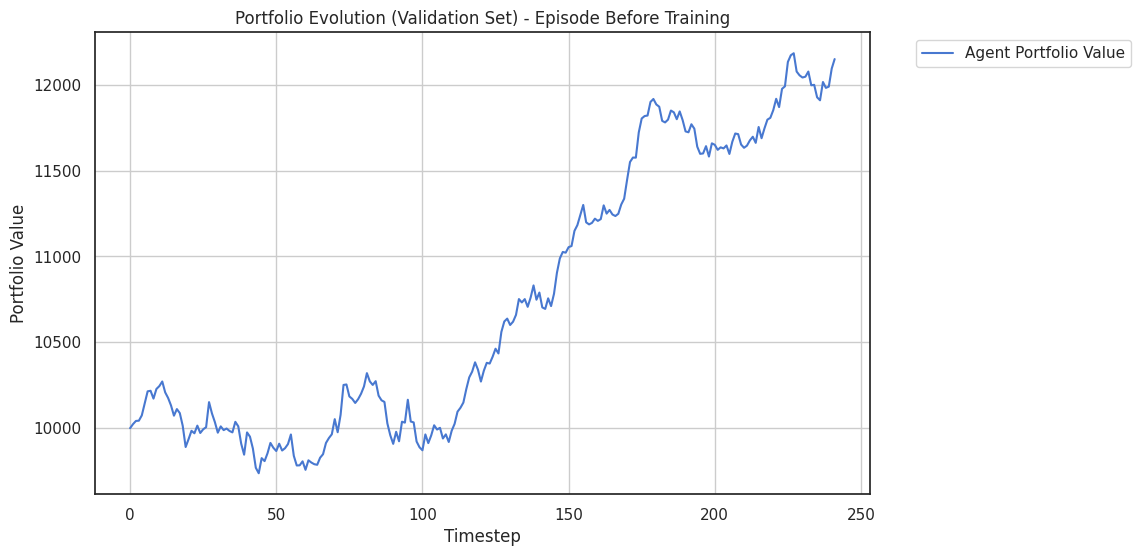

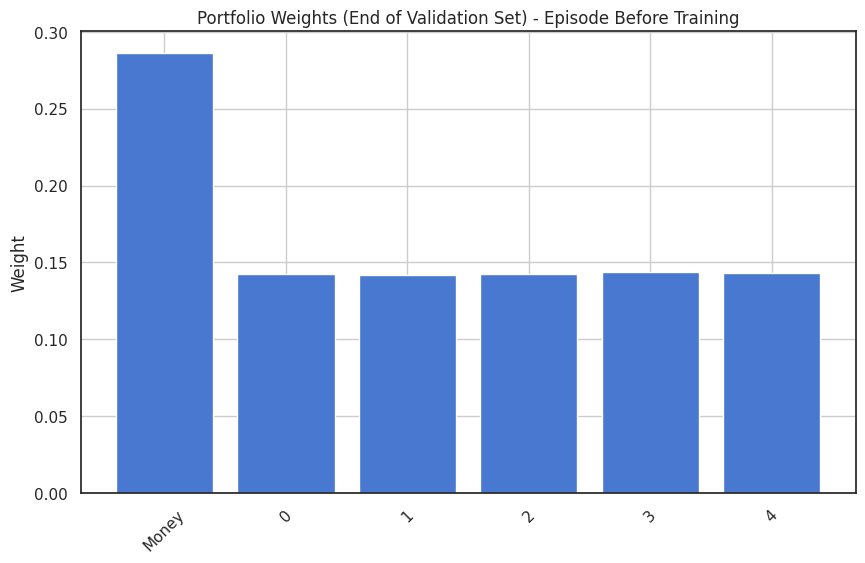

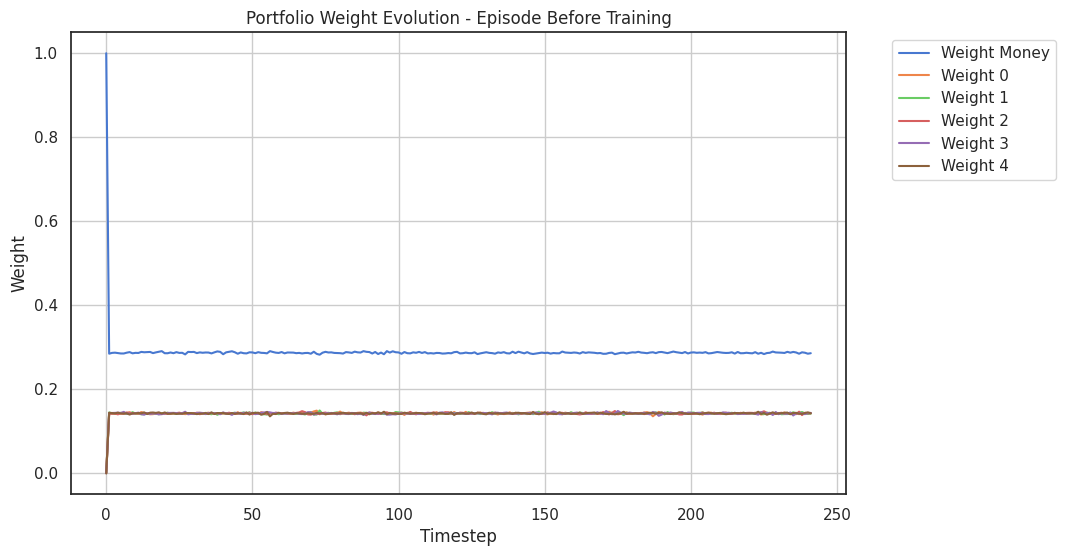

Episode: 0
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


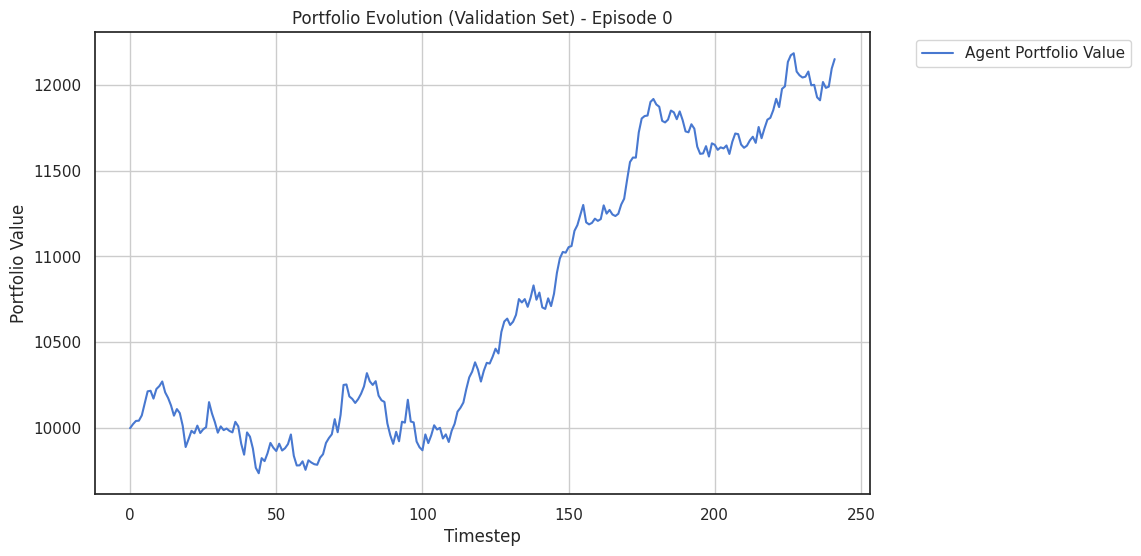

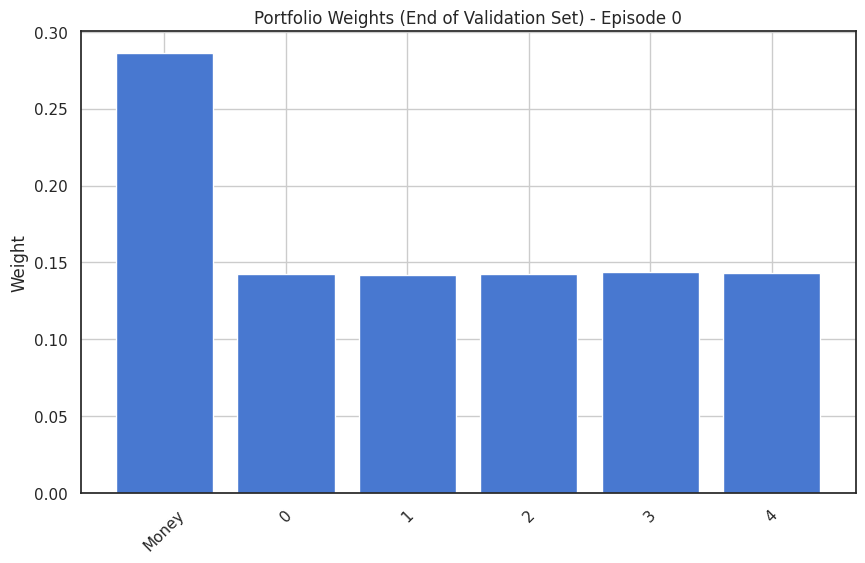

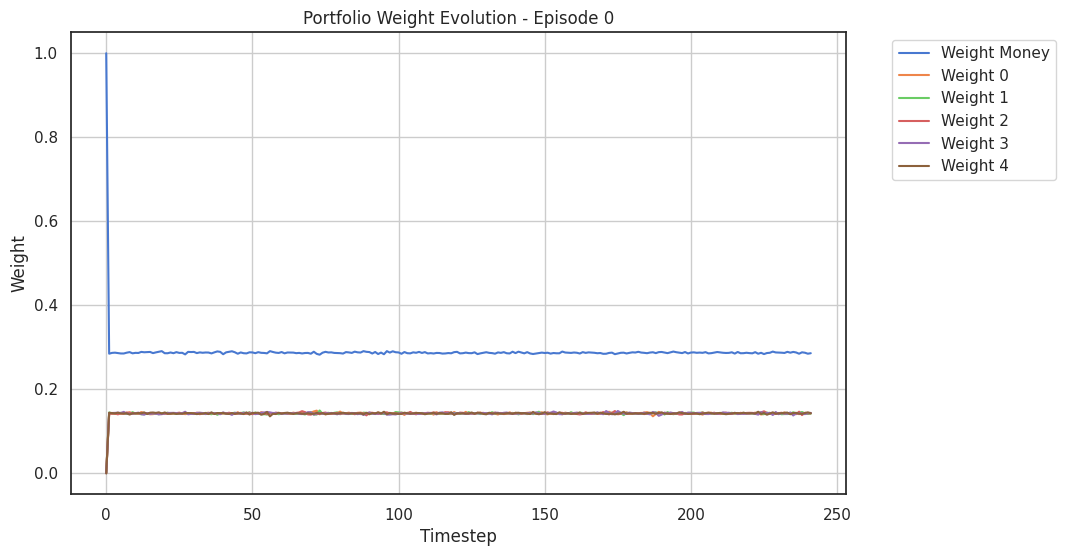

Start Episode 1
Episode: 1
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


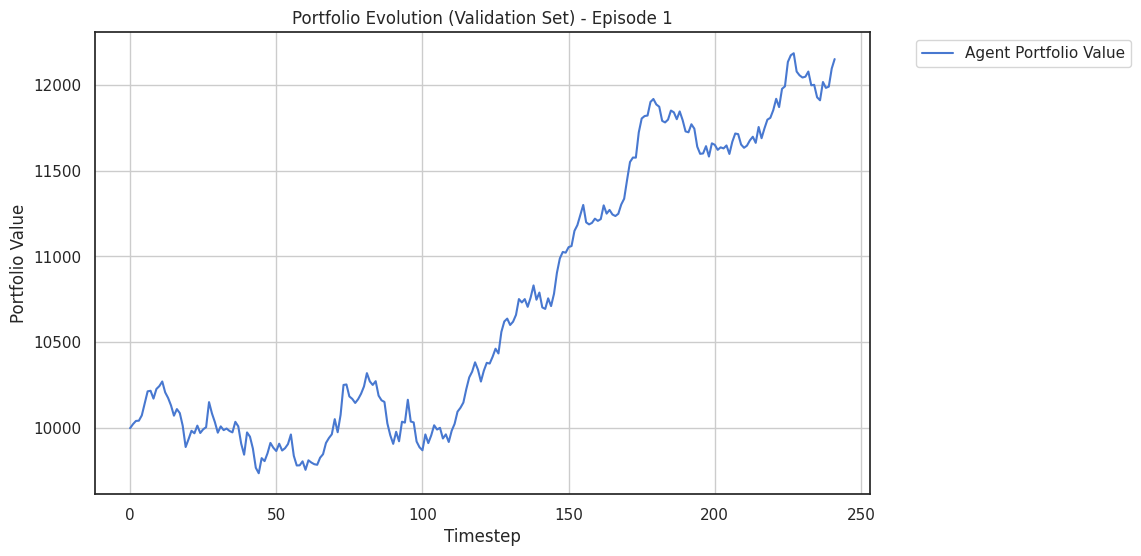

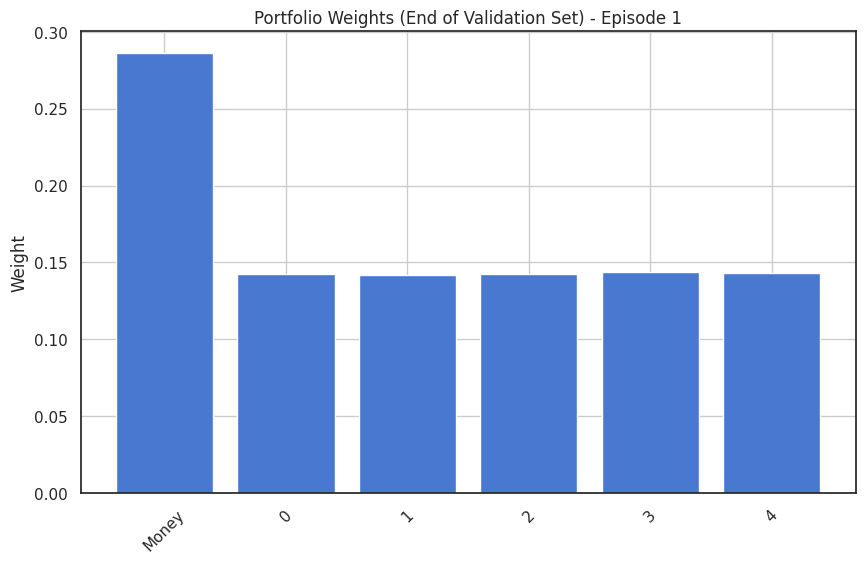

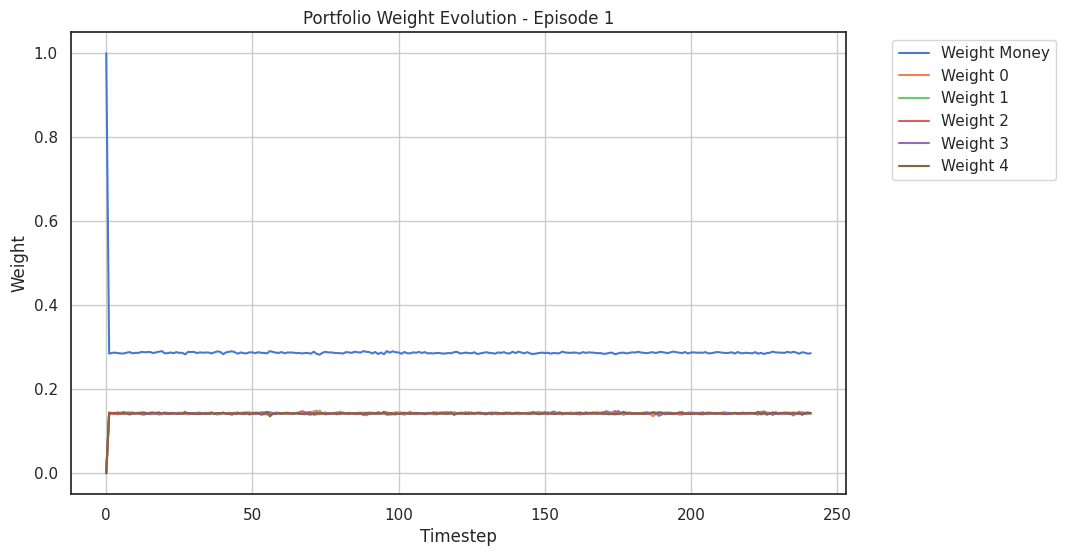

Start Episode 2
Episode: 2
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


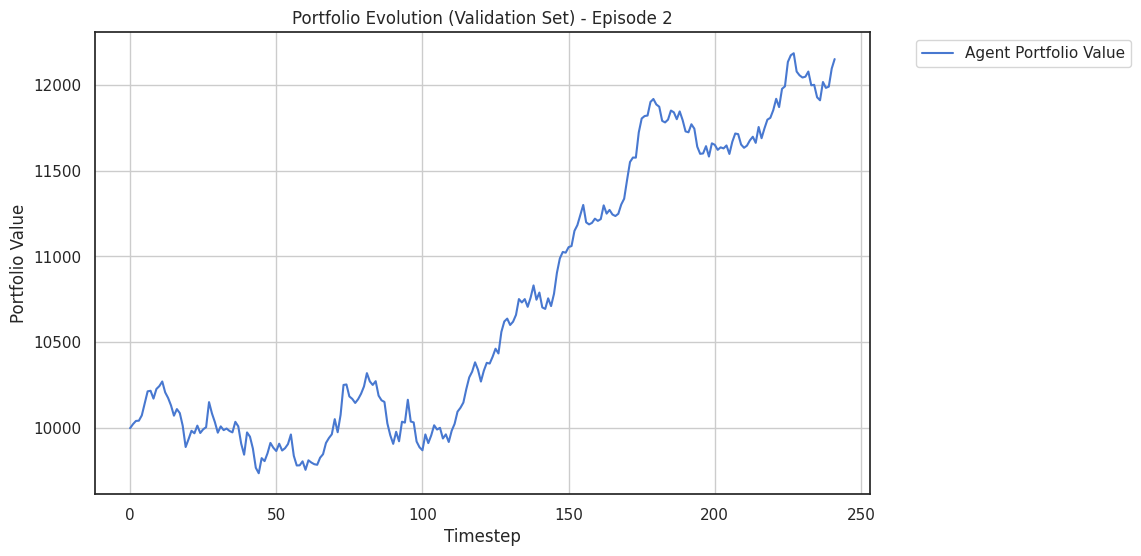

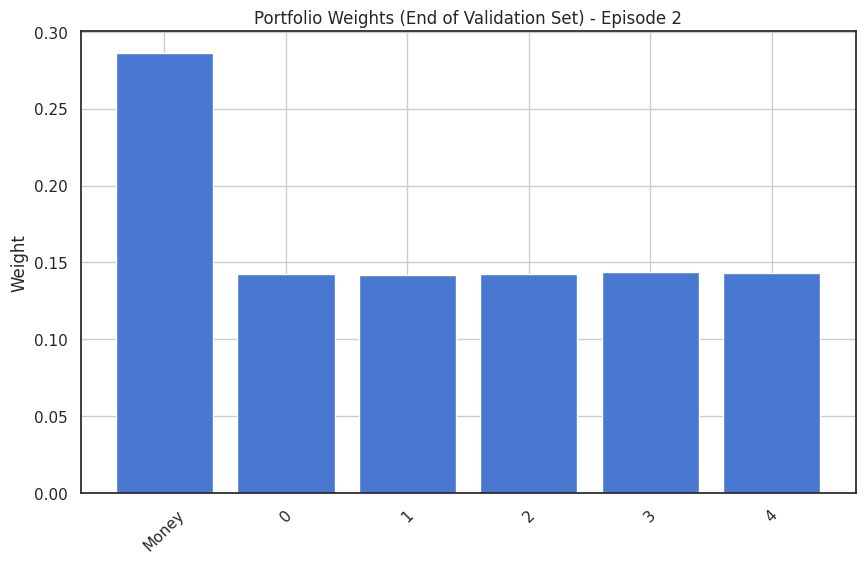

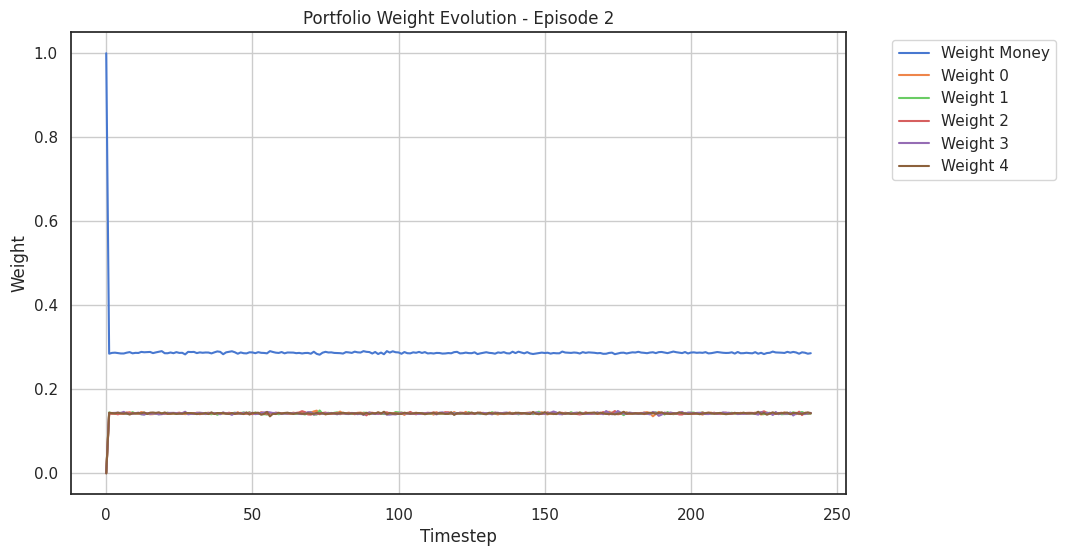

Start Episode 3
Episode: 3
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


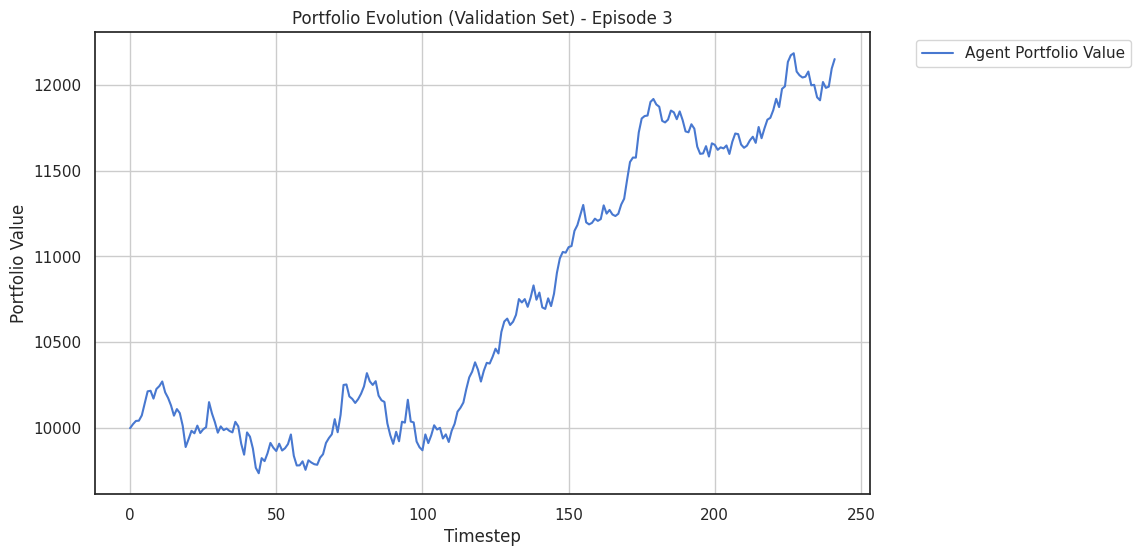

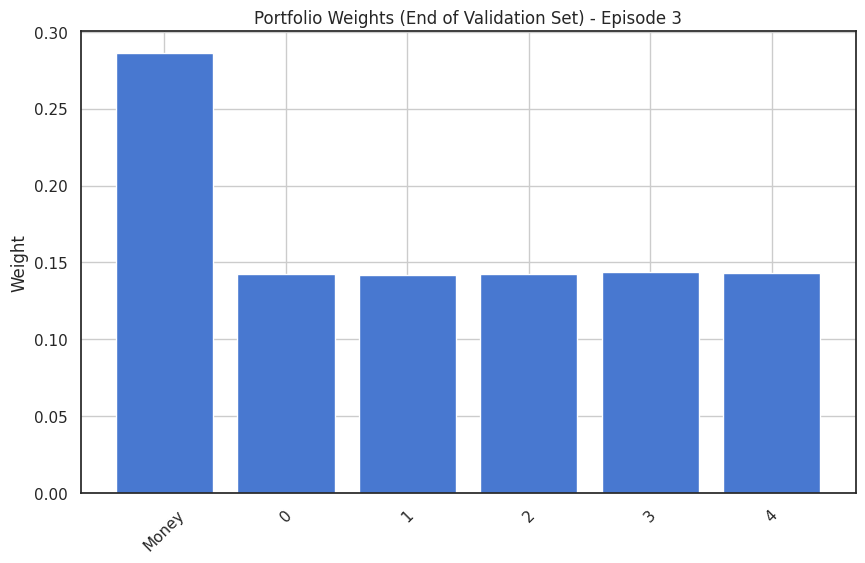

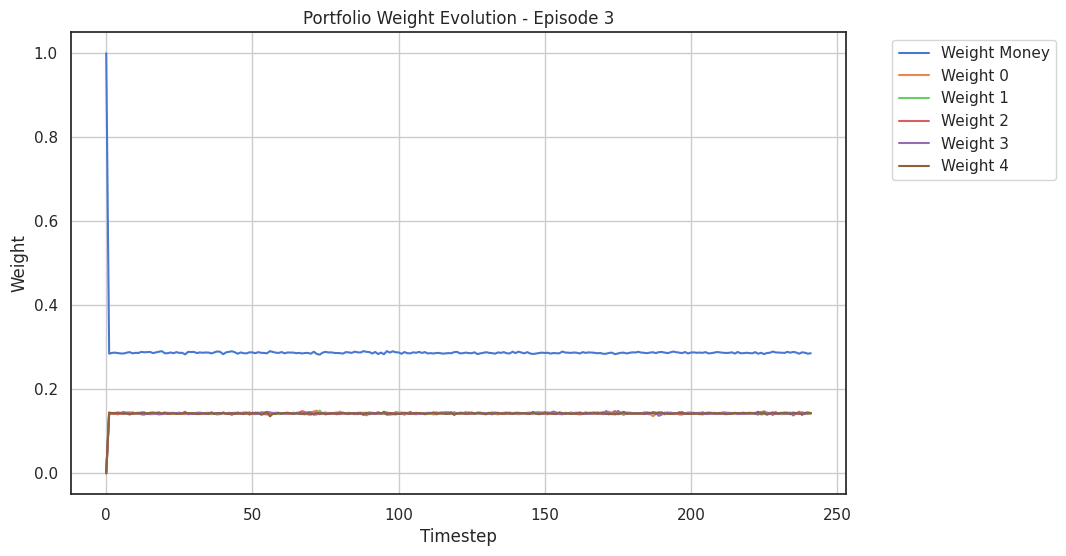

Start Episode 4
Episode: 4
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


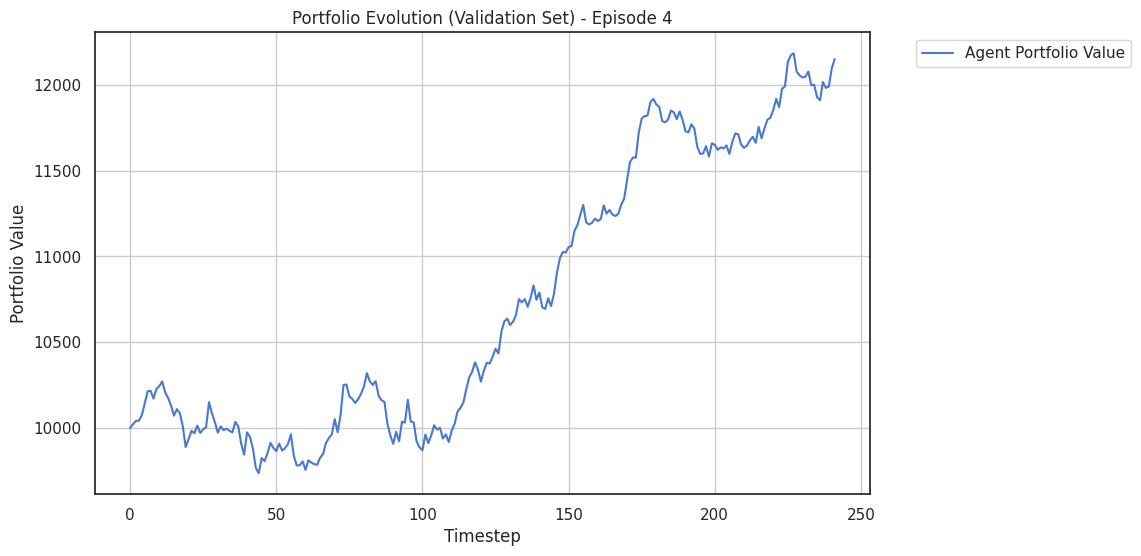

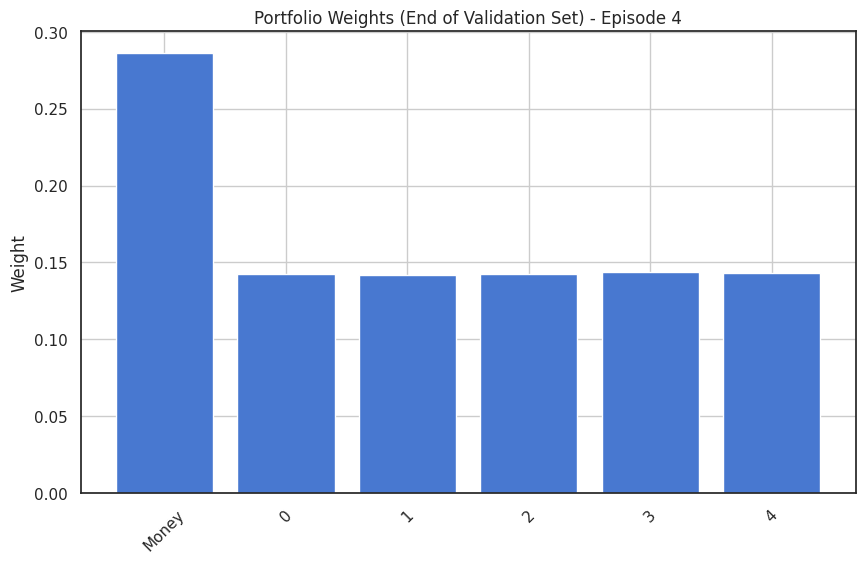

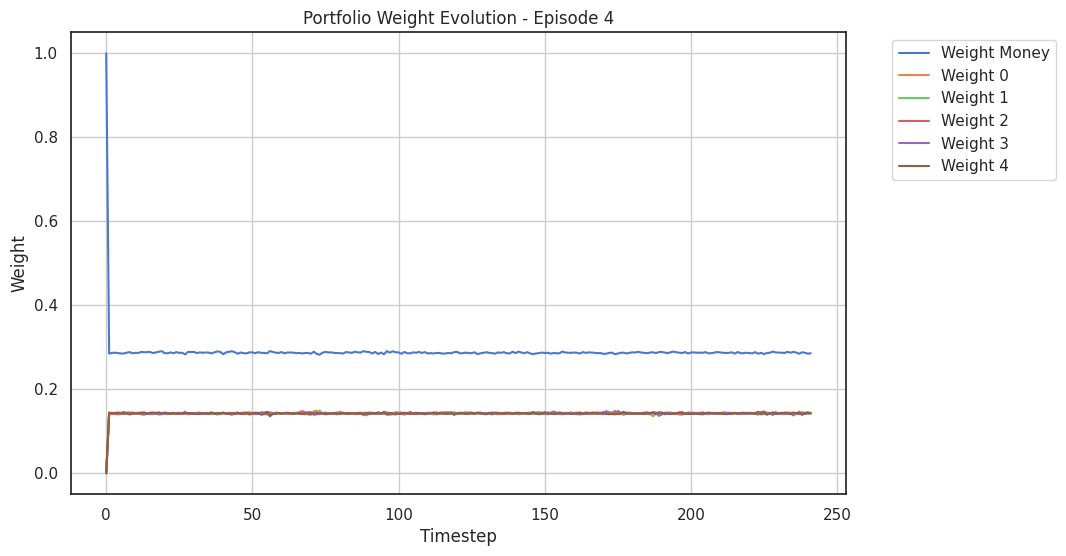

Start Episode 5
Episode: 5
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


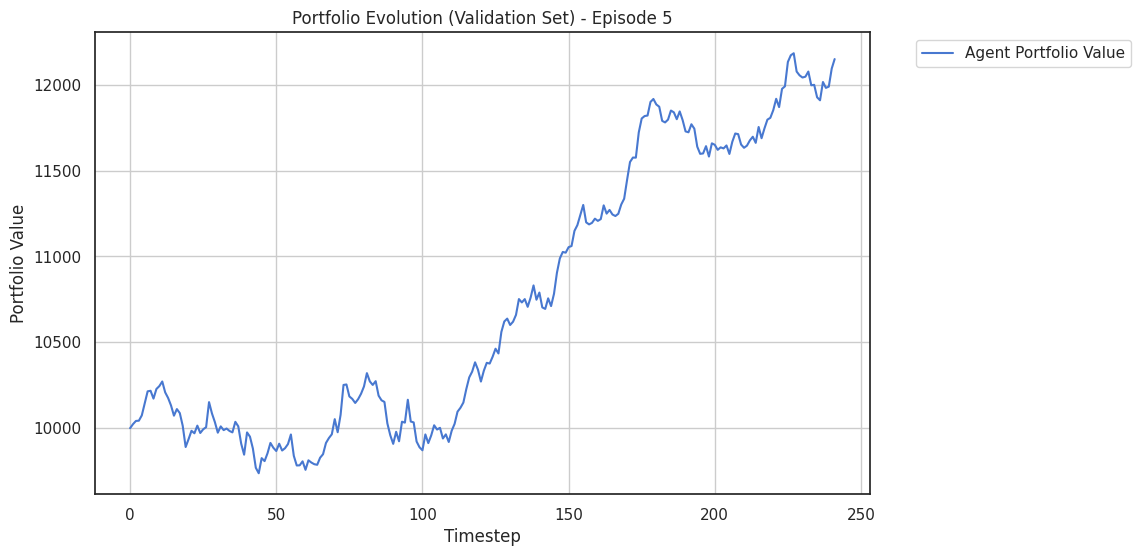

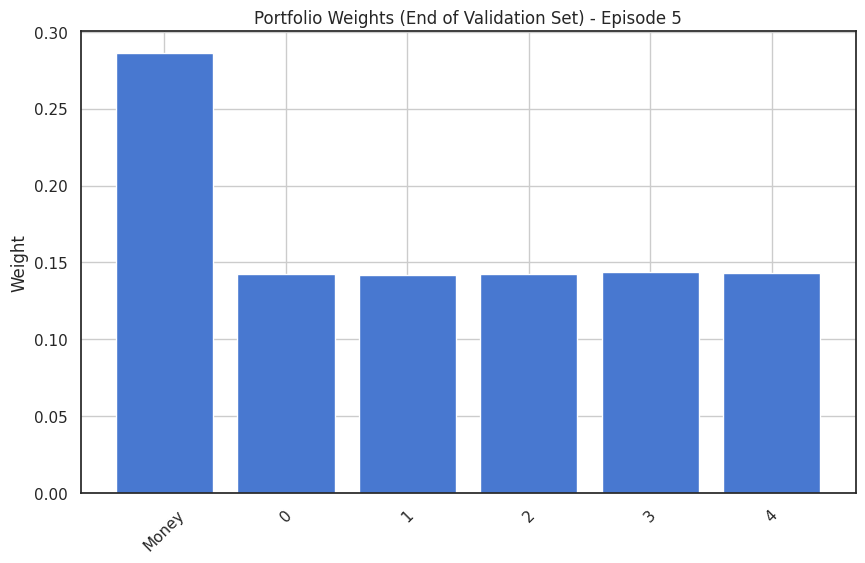

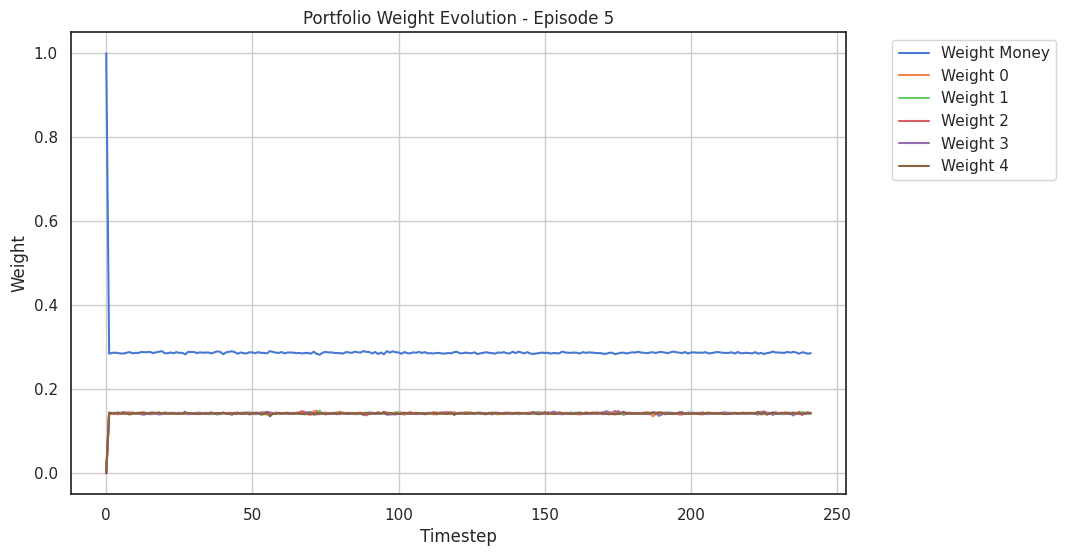

Start Episode 6
Episode: 6
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


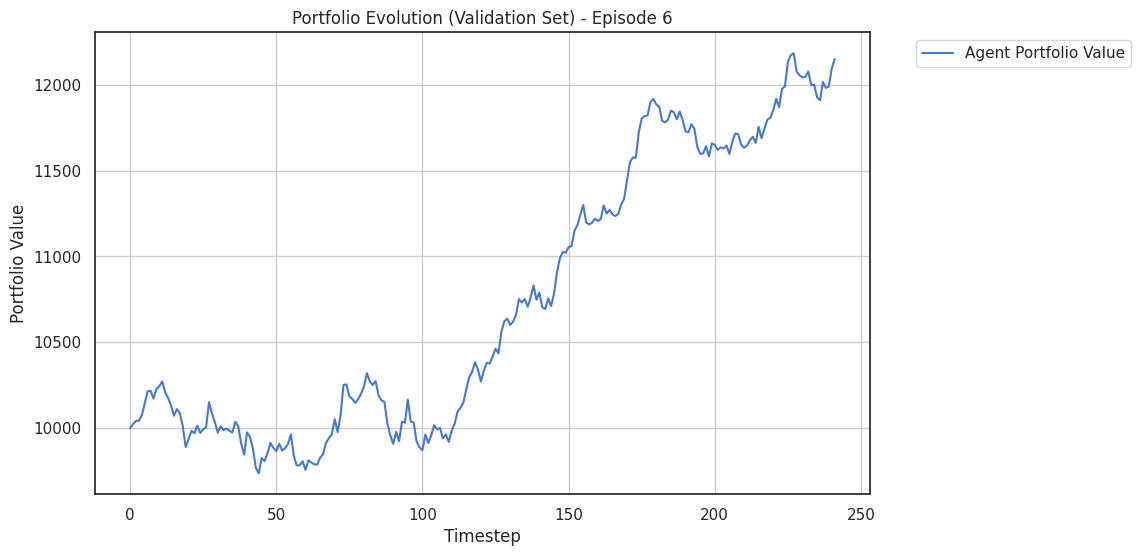

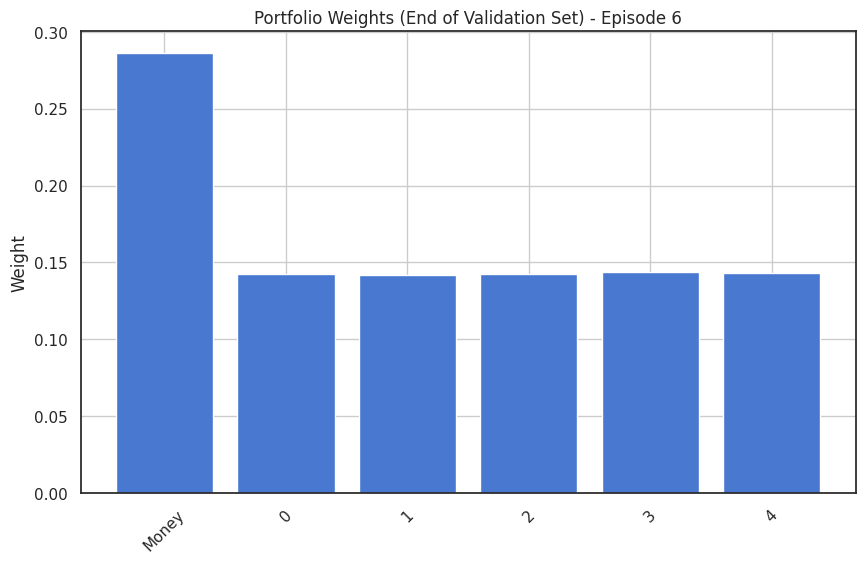

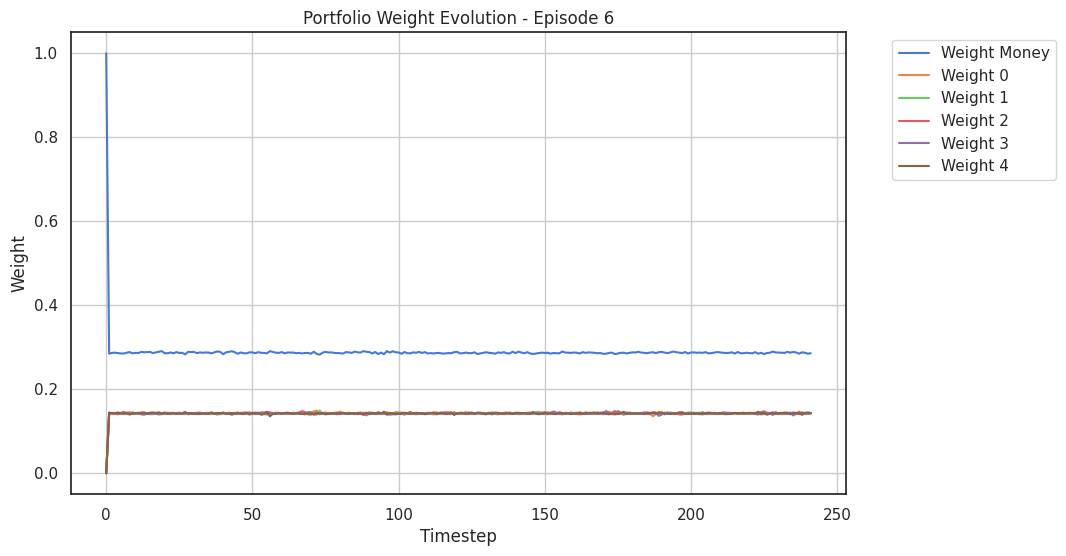

Start Episode 7
Episode: 7
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


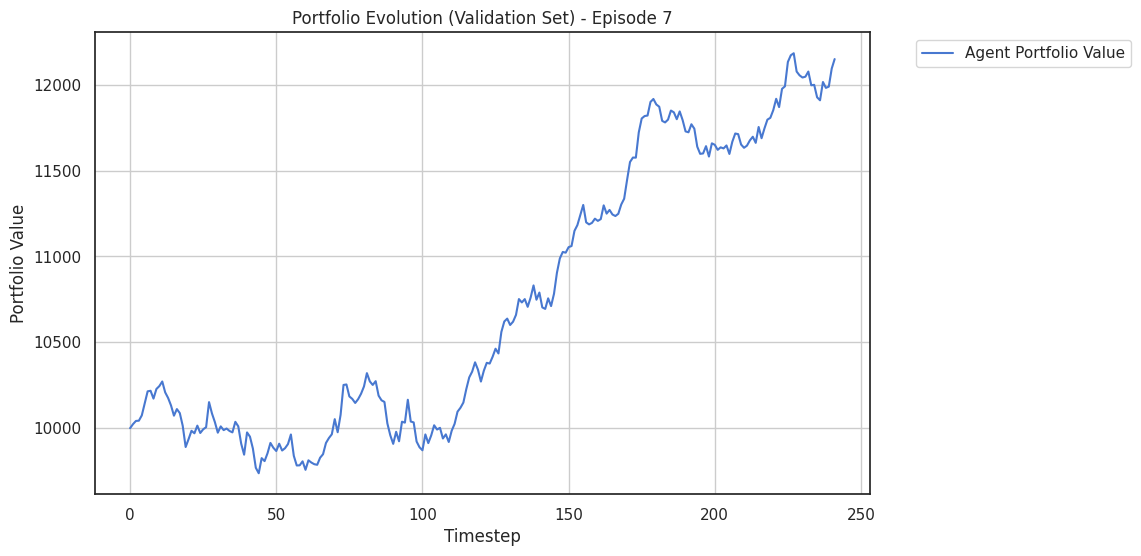

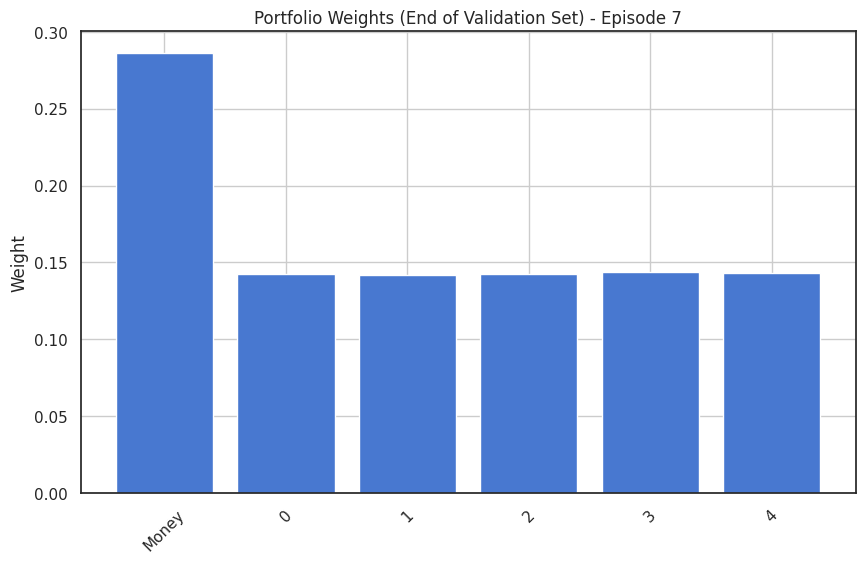

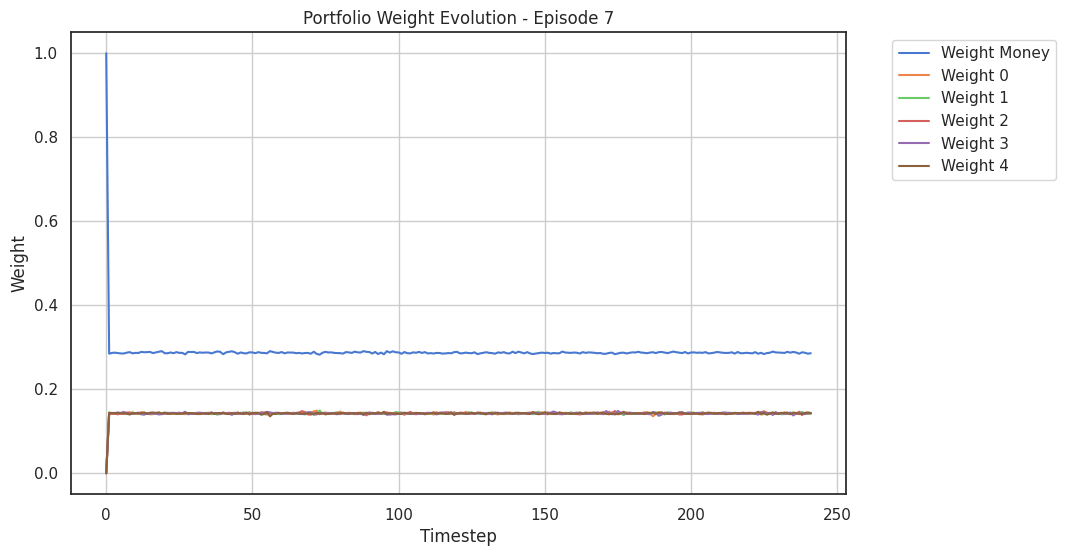

Start Episode 8
Episode: 8
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


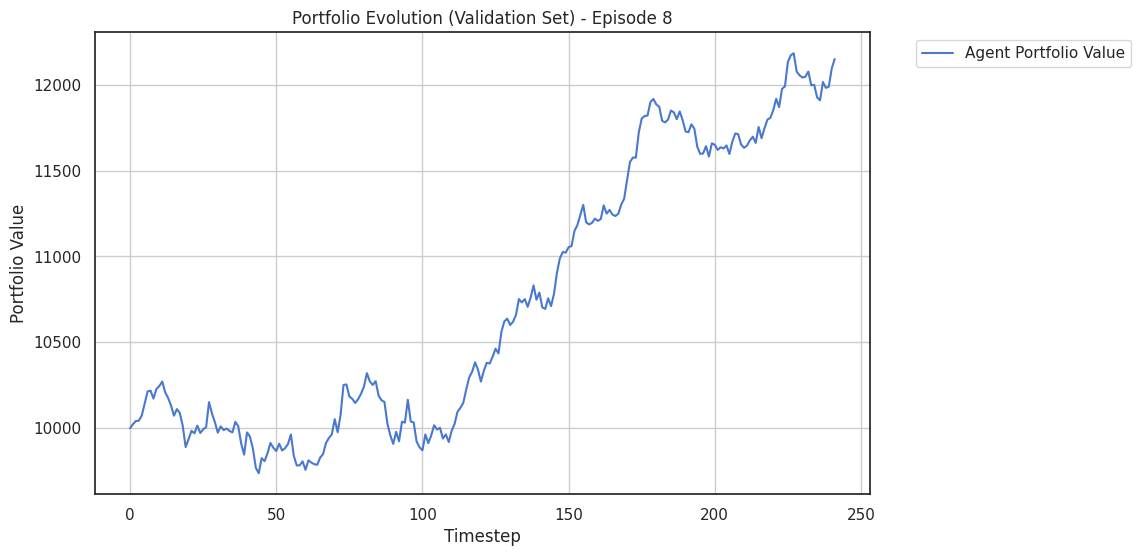

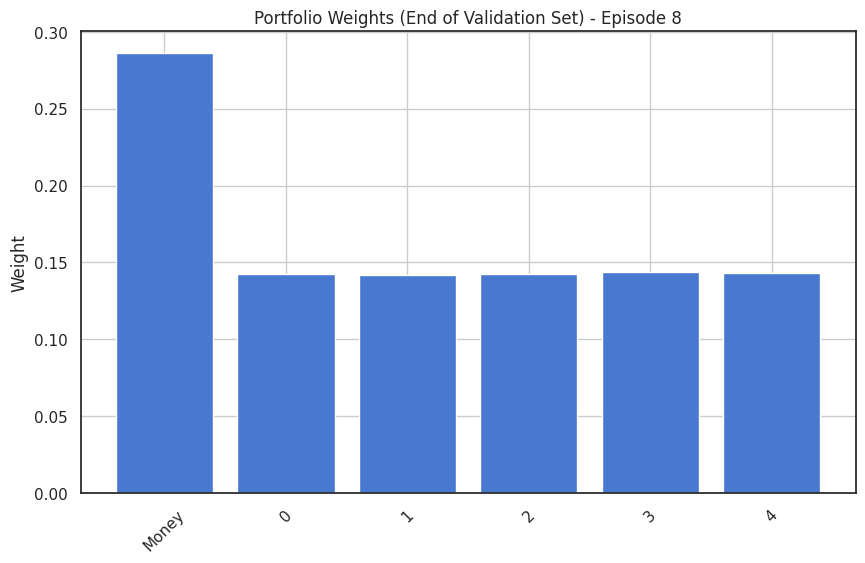

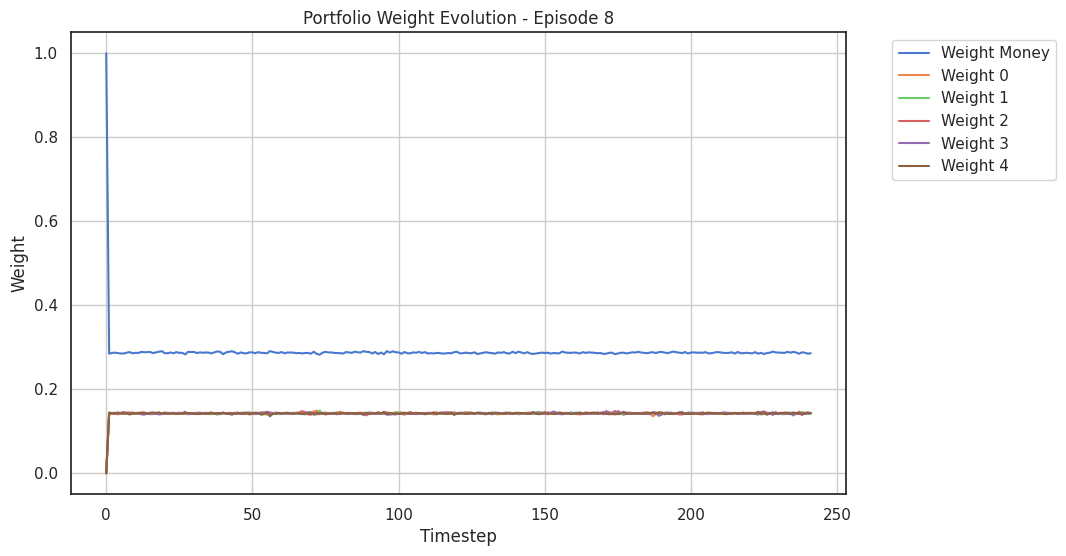

Start Episode 9
Episode: 9
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


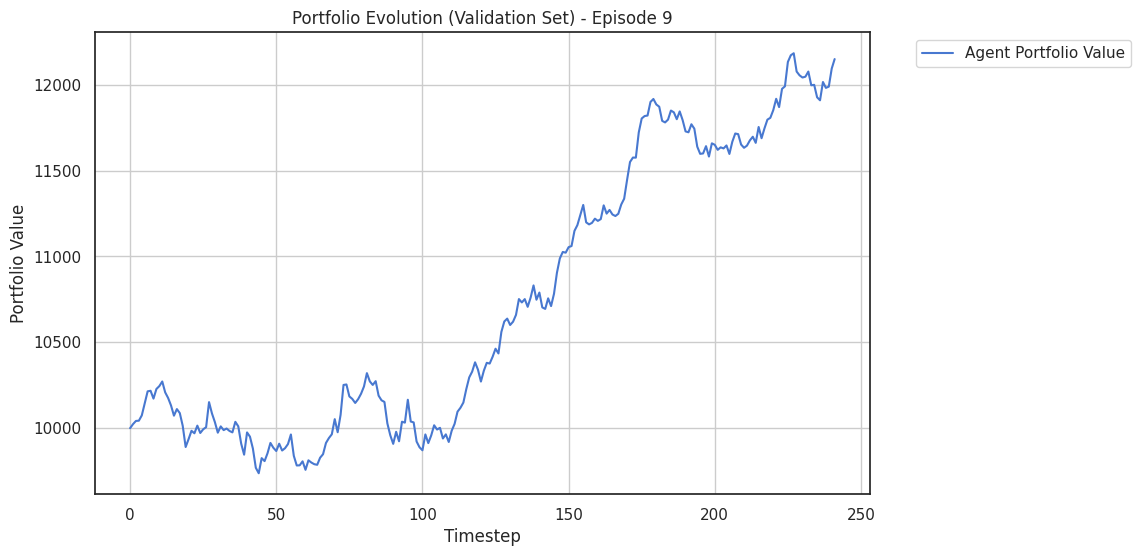

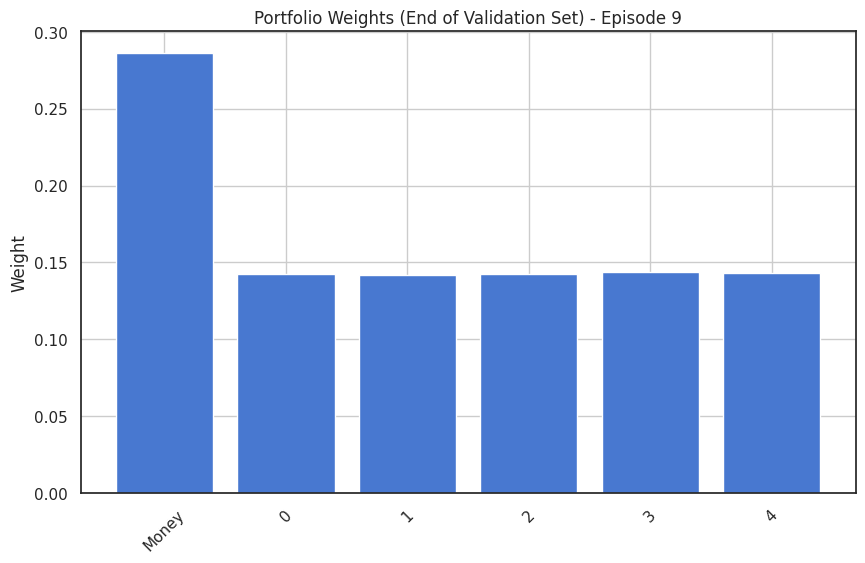

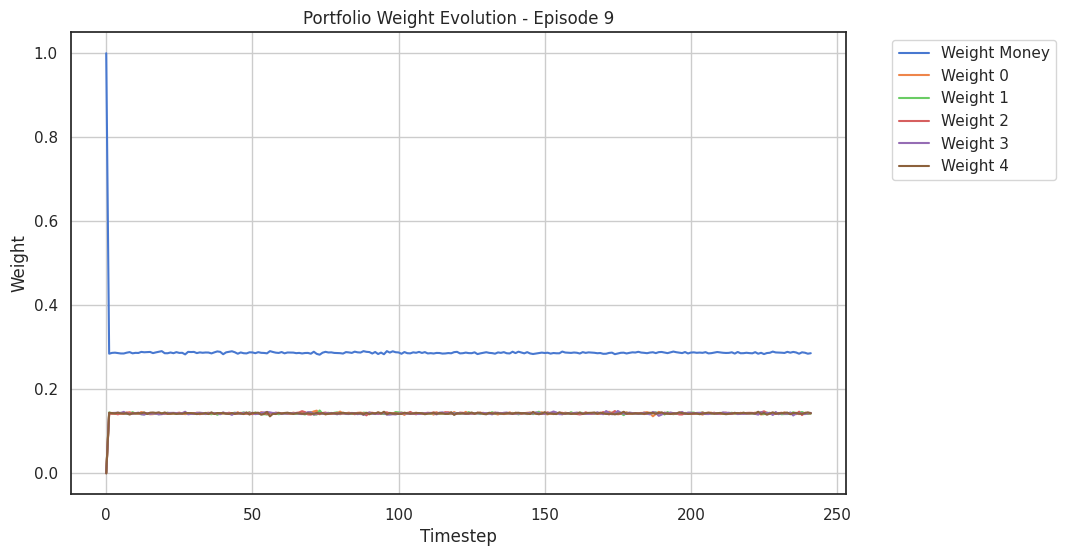

Start Episode 10
Episode: 10
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


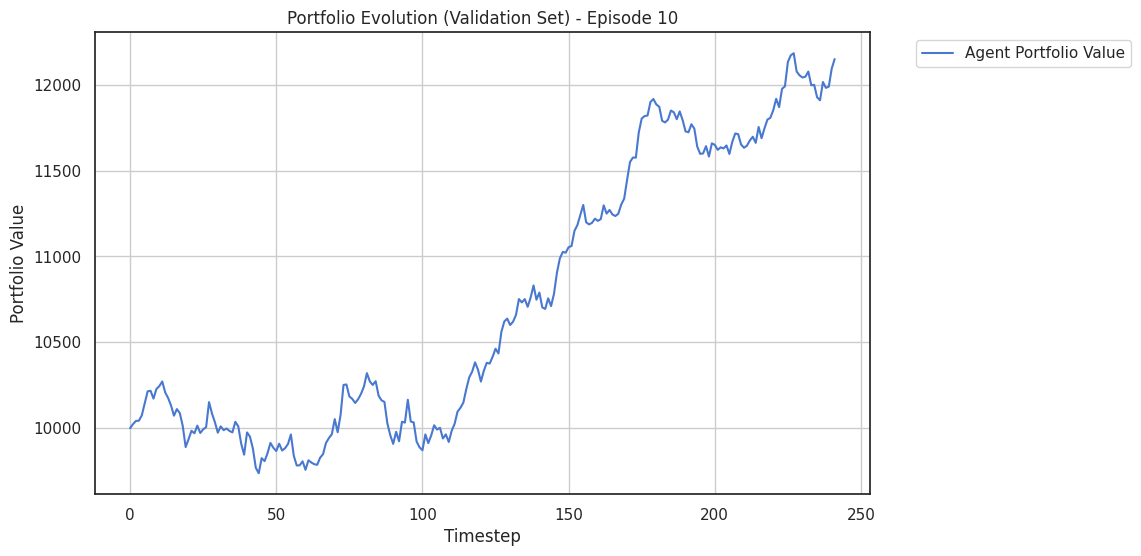

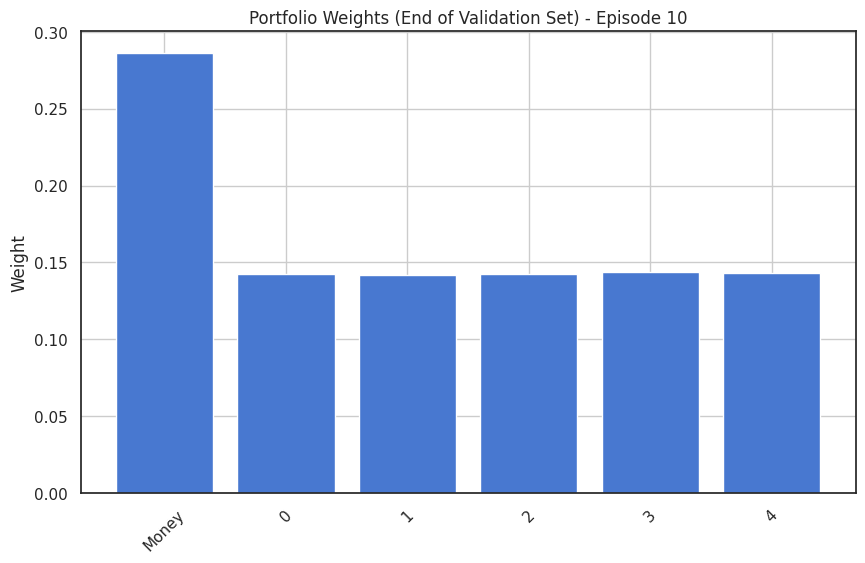

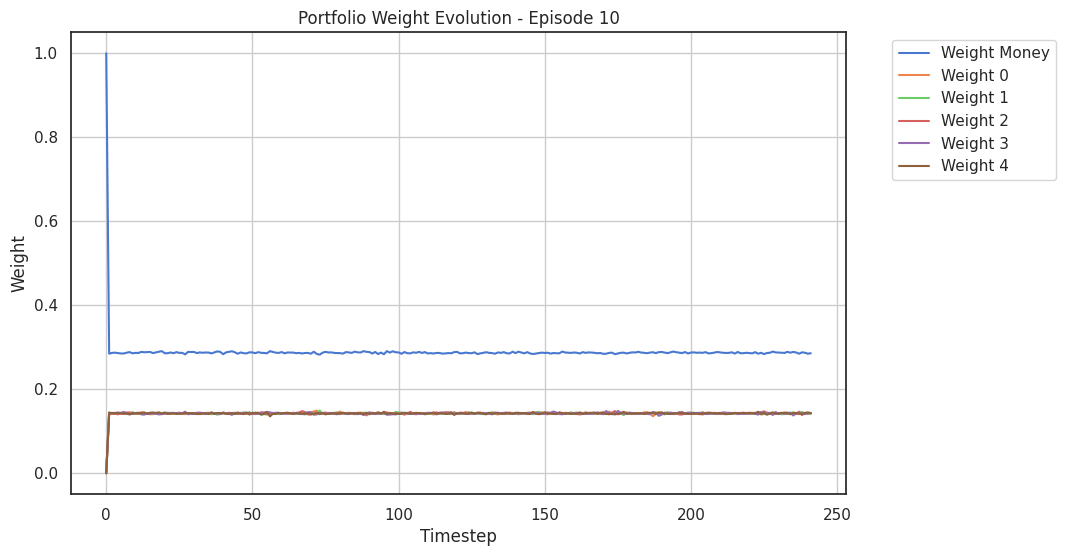

Start Episode 11
Episode: 11
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


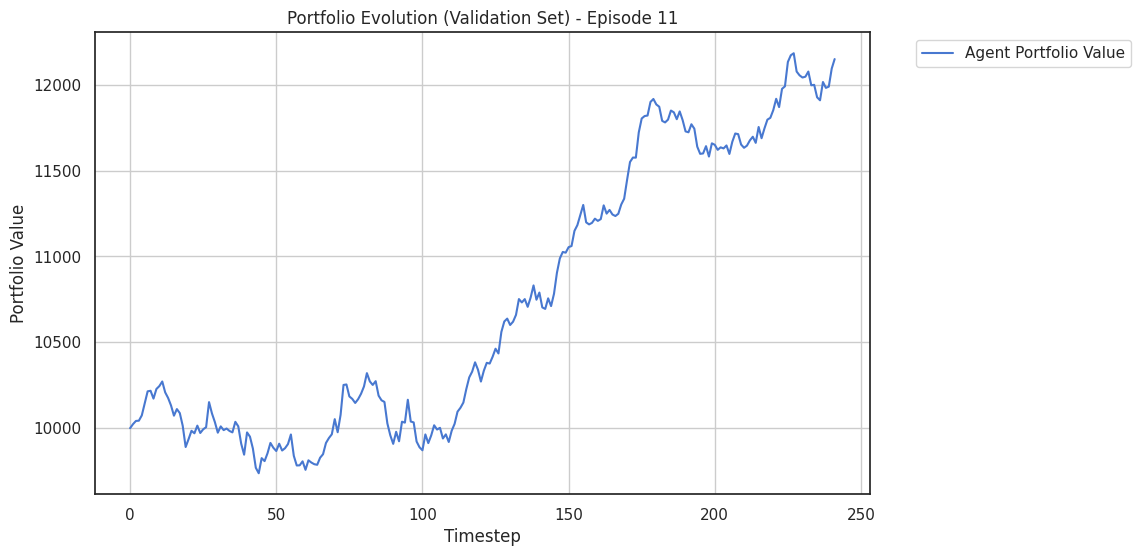

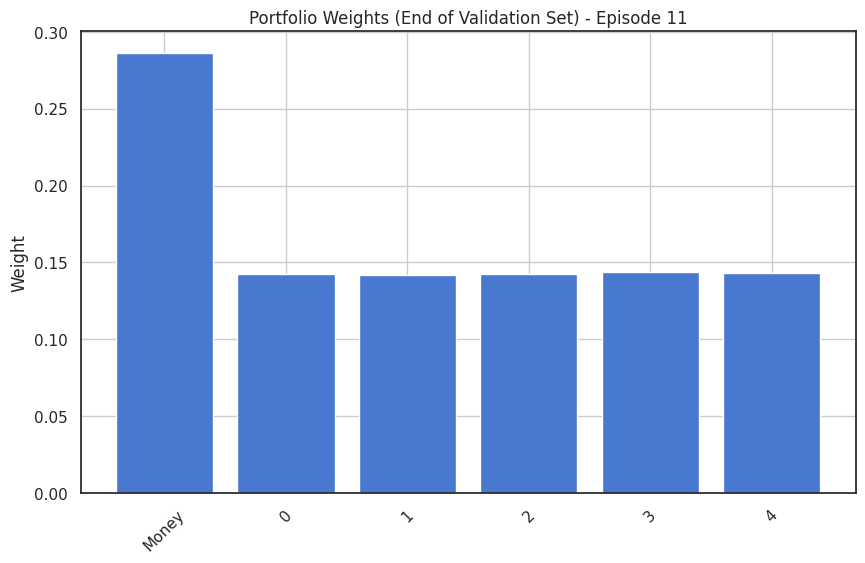

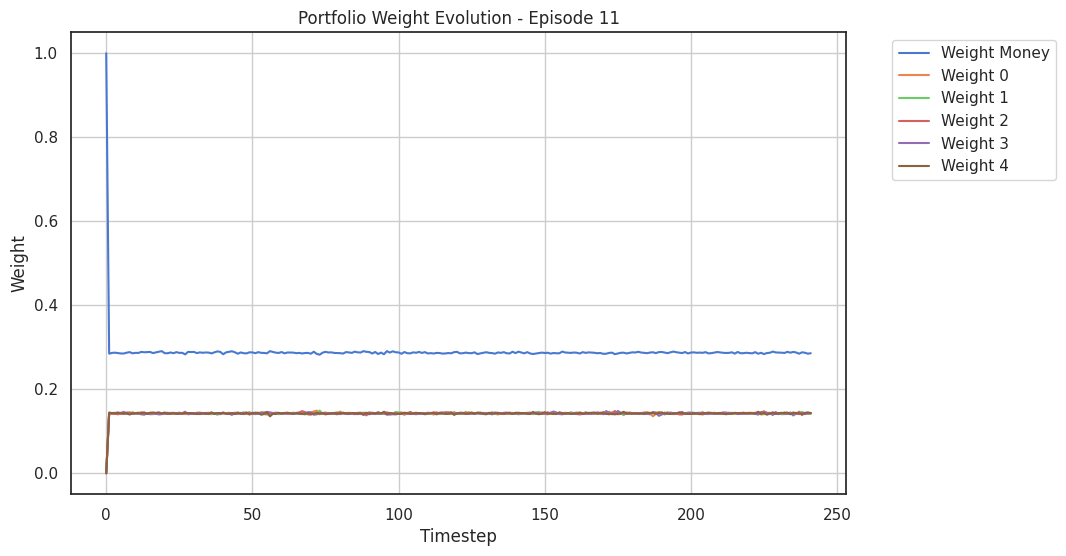

Start Episode 12
Episode: 12
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


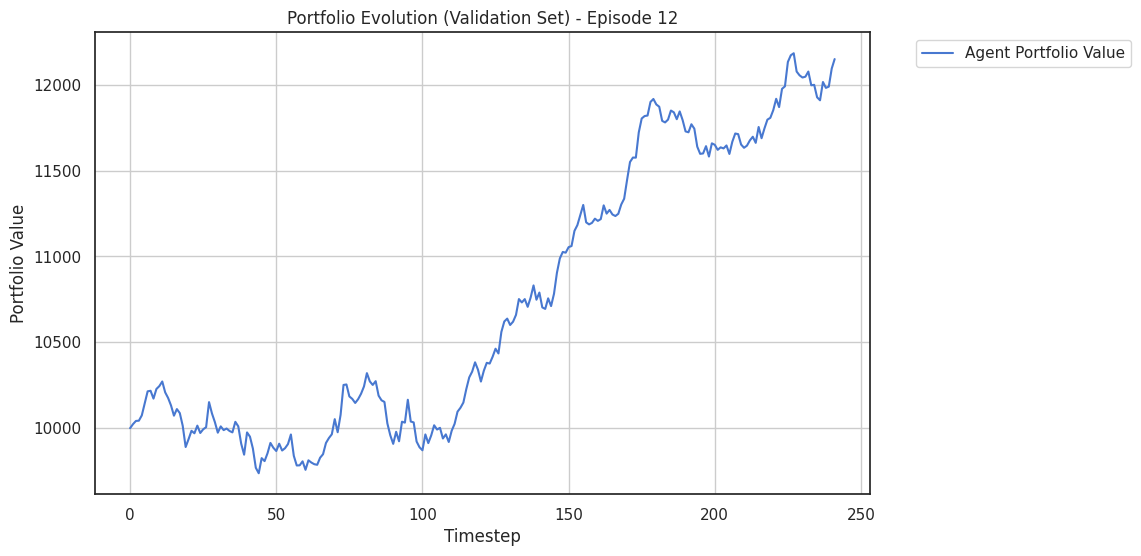

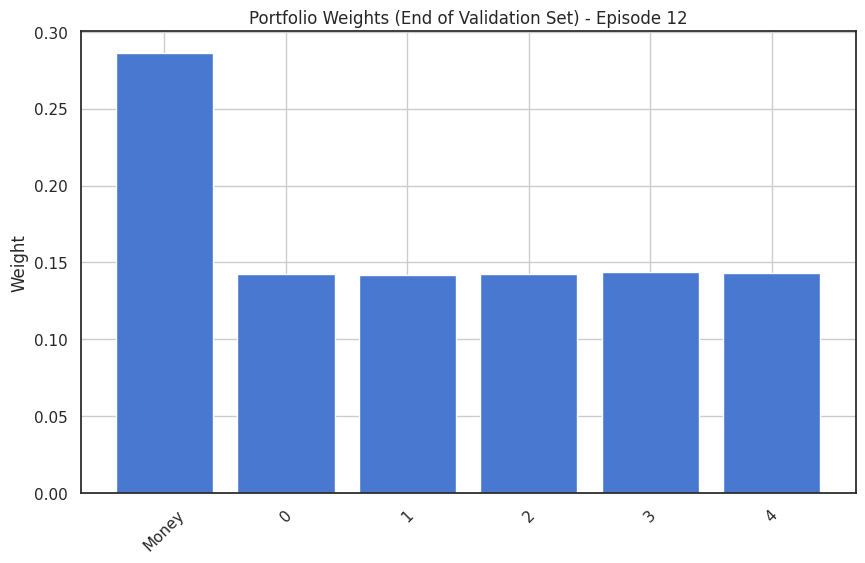

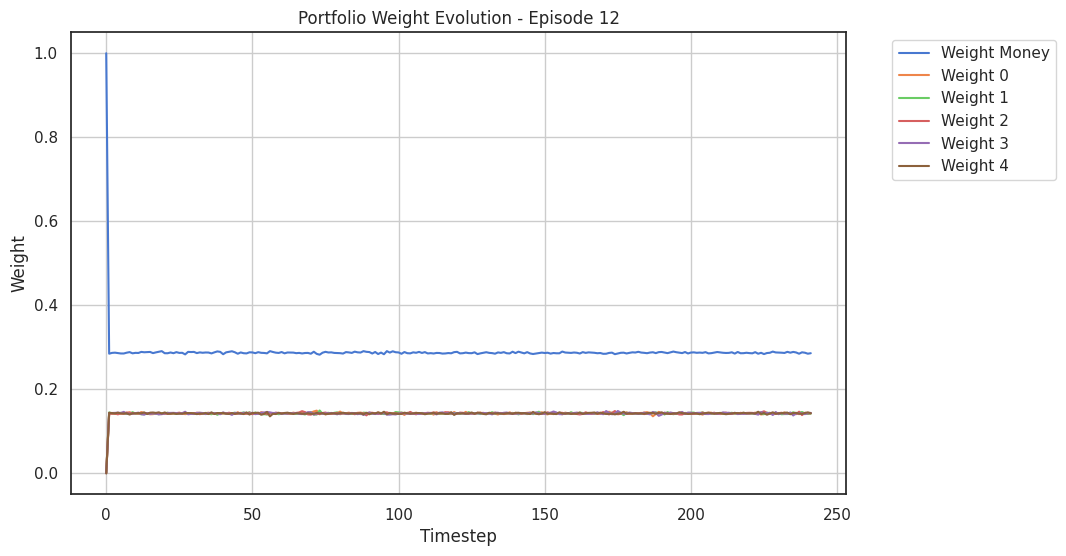

Start Episode 13
Episode: 13
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


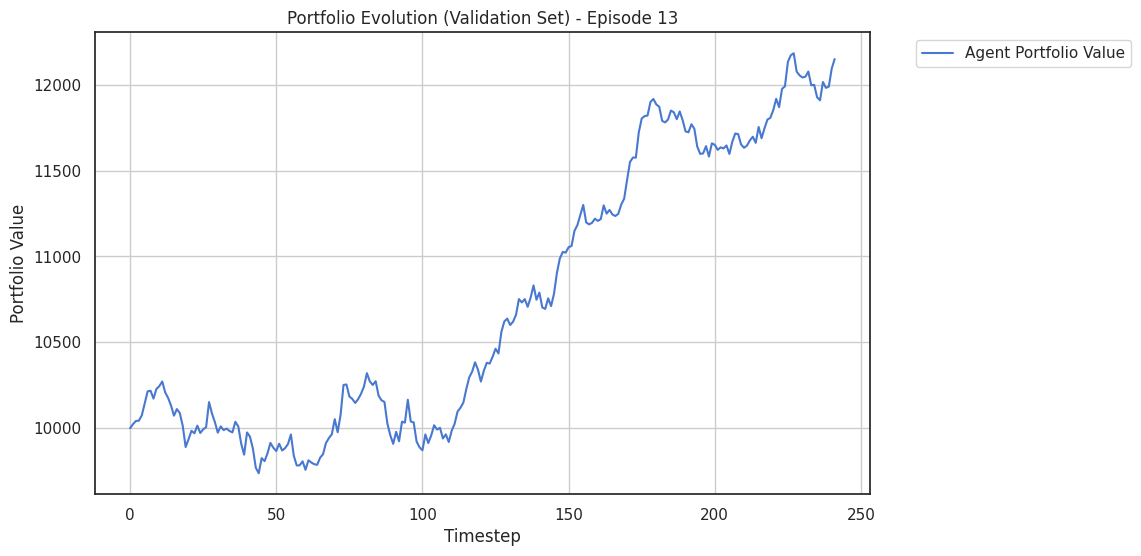

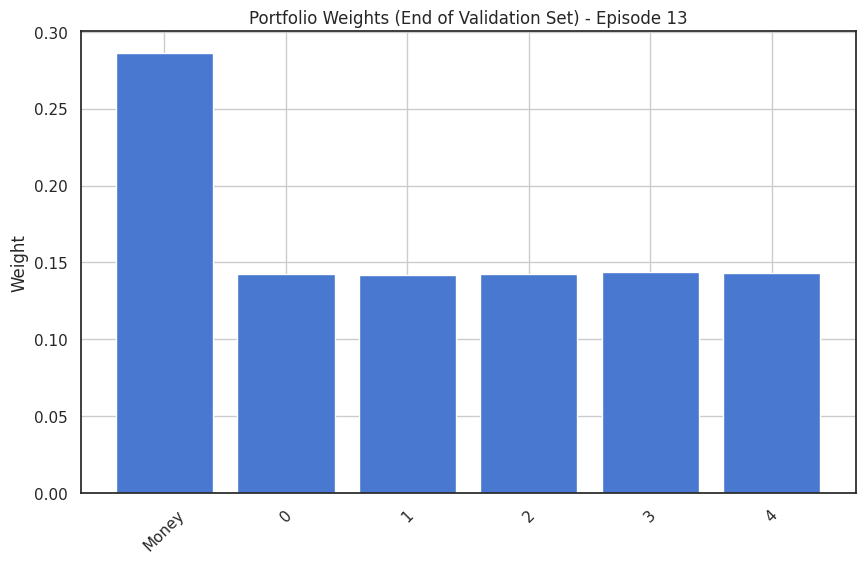

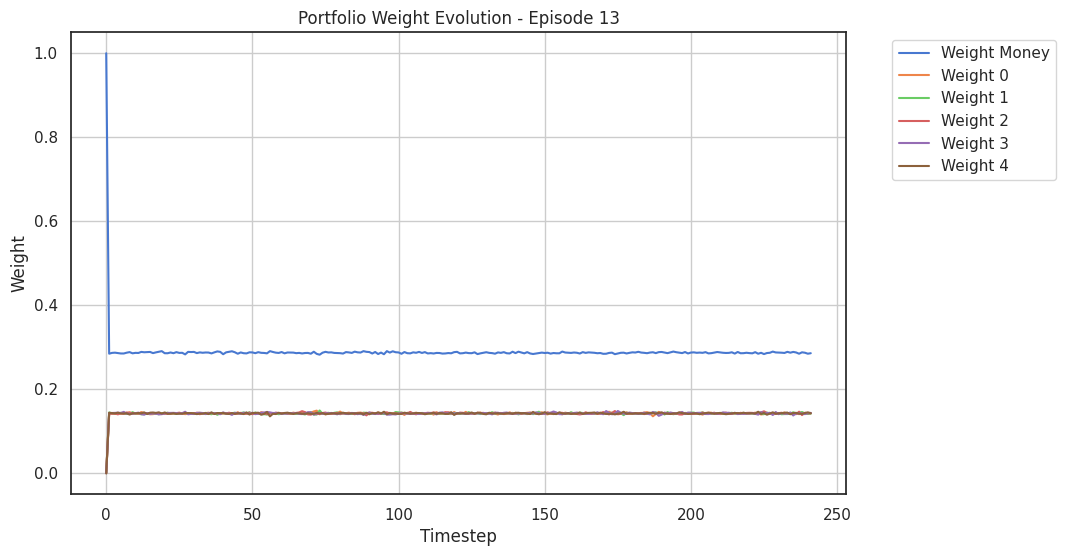

Start Episode 14
Episode: 14
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


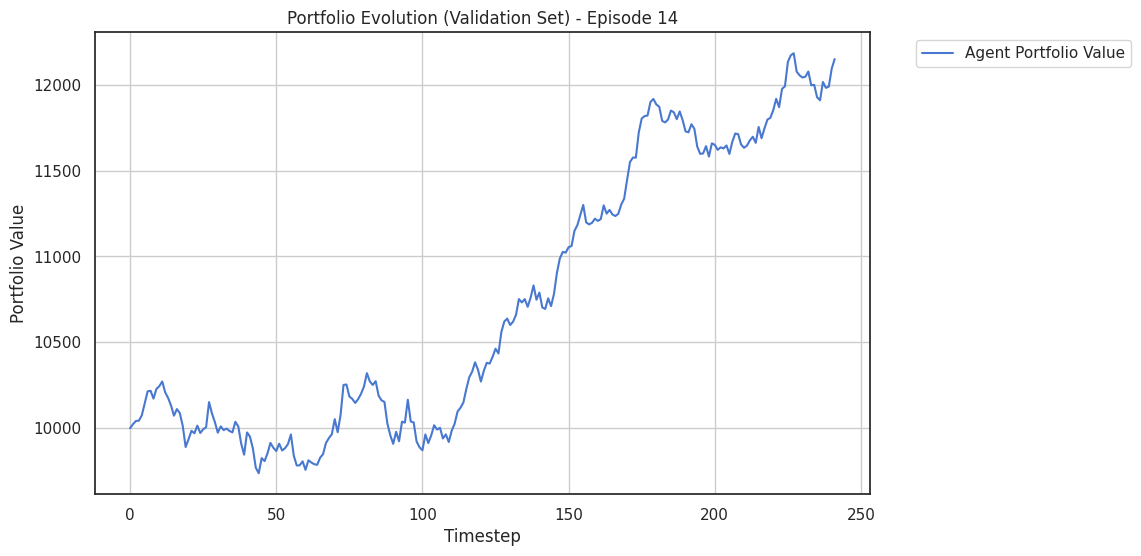

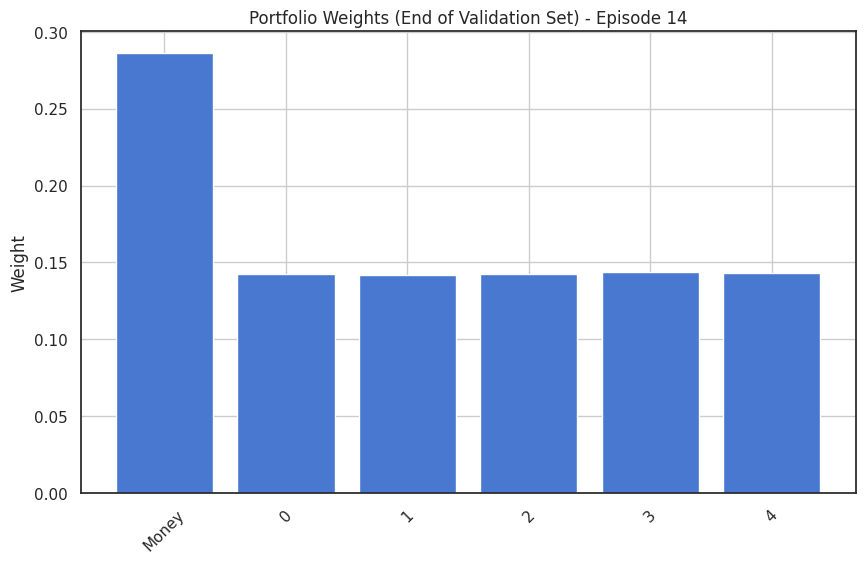

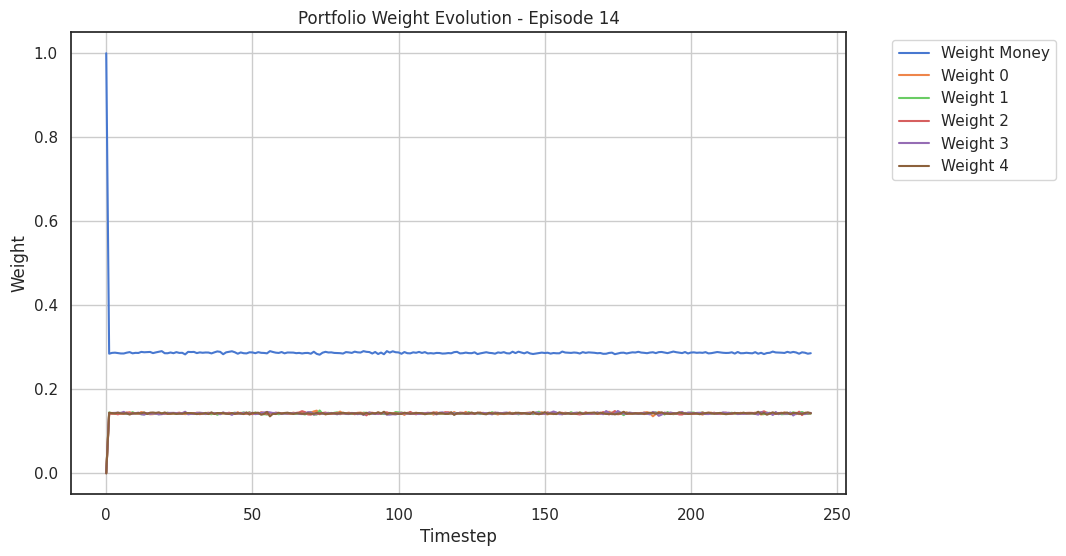

Start Episode 15
Episode: 15
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


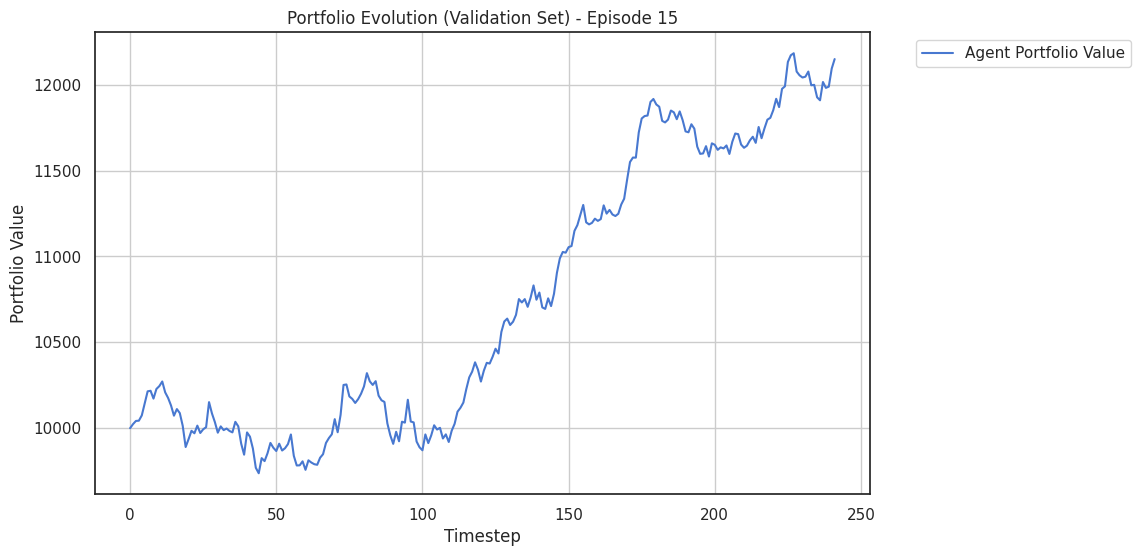

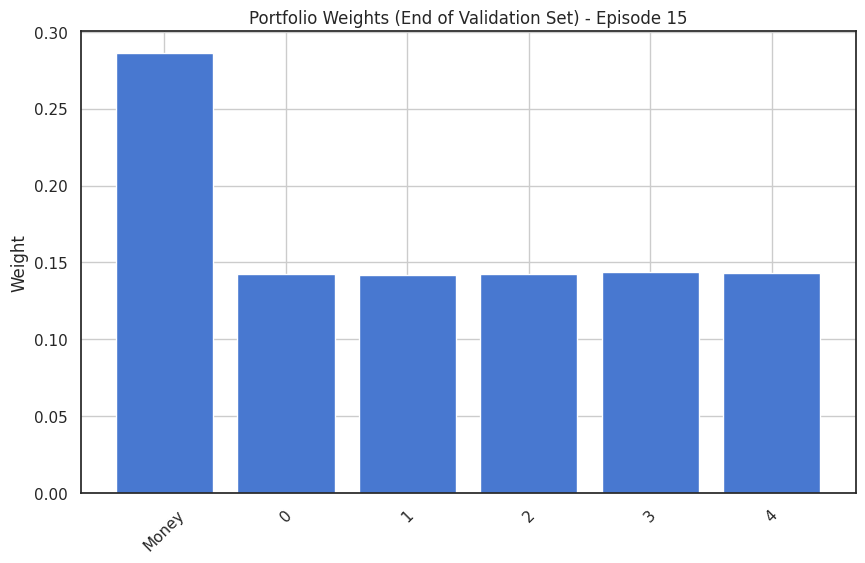

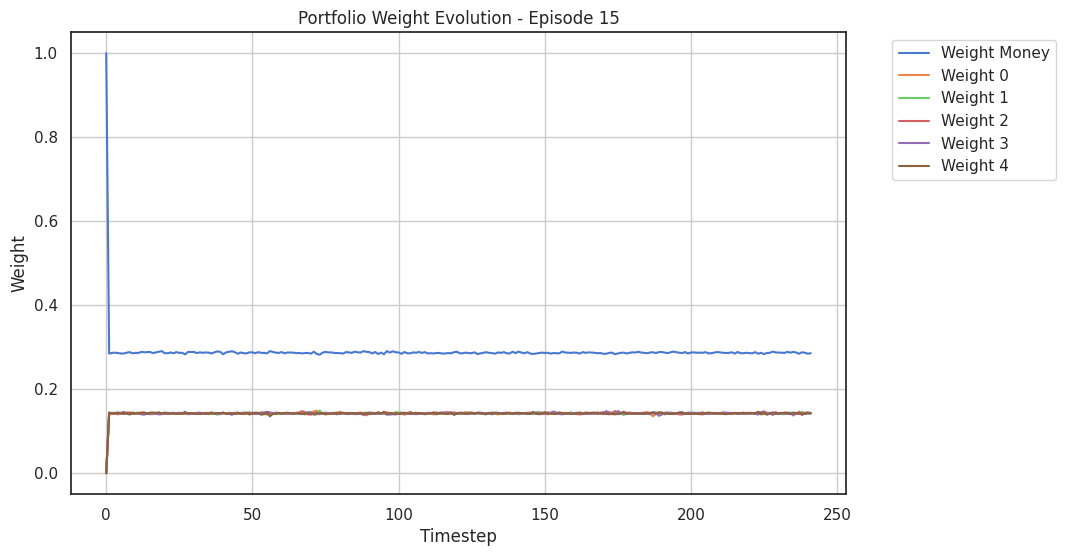

Start Episode 16
Episode: 16
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


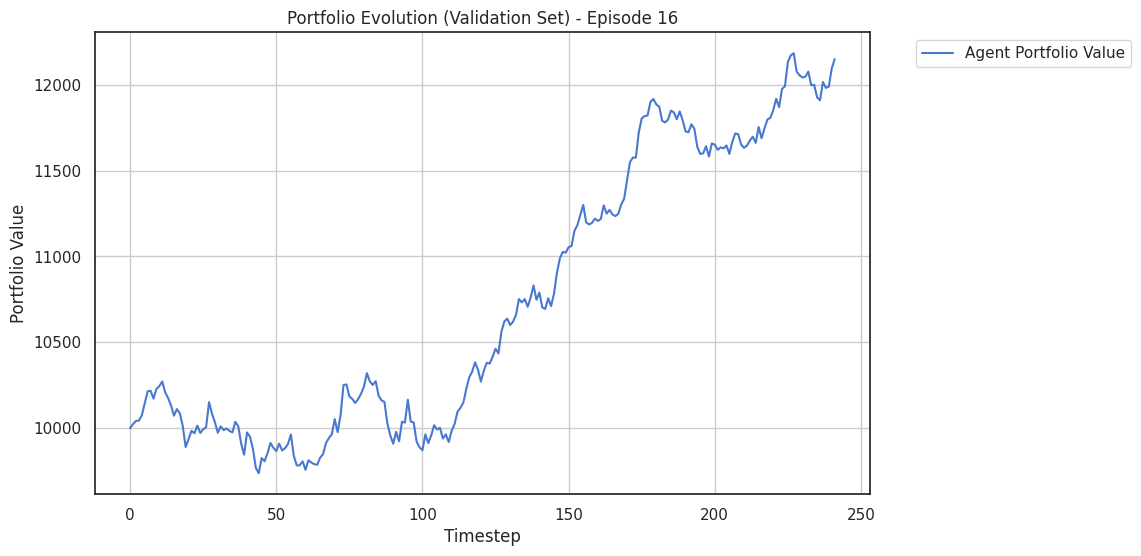

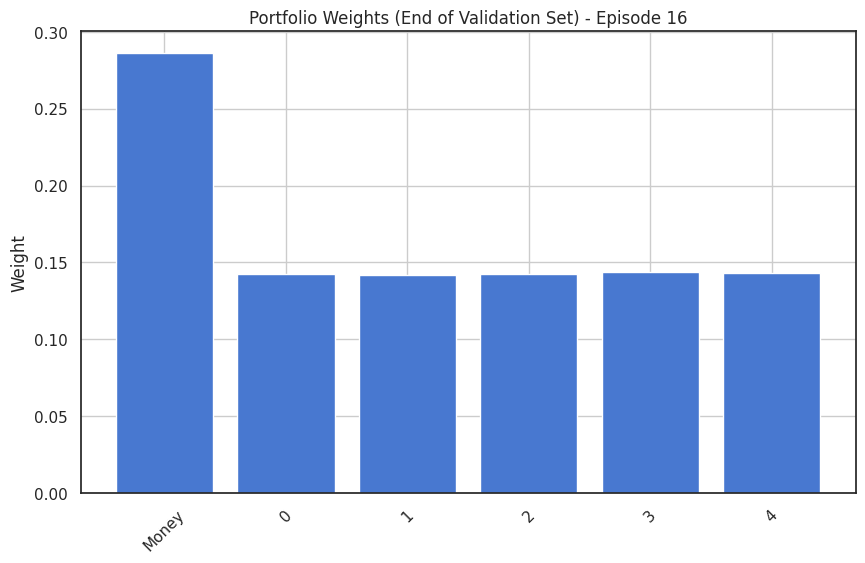

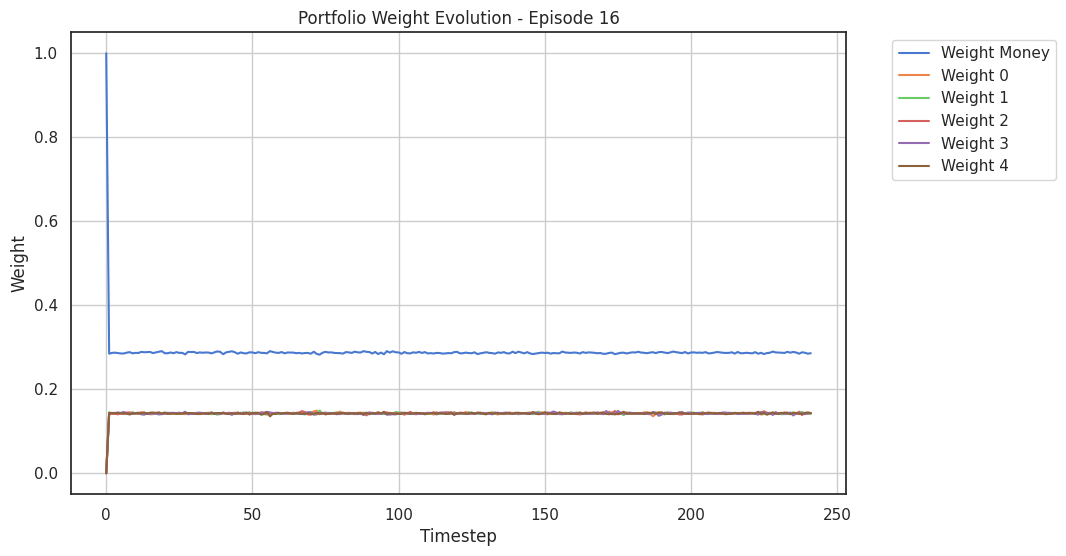

Start Episode 17
Episode: 17
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


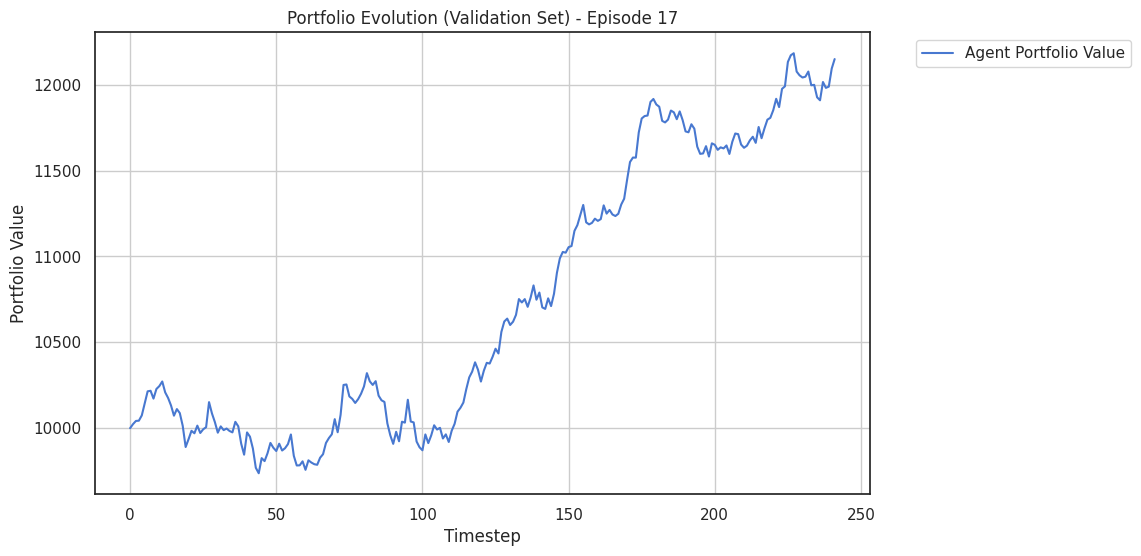

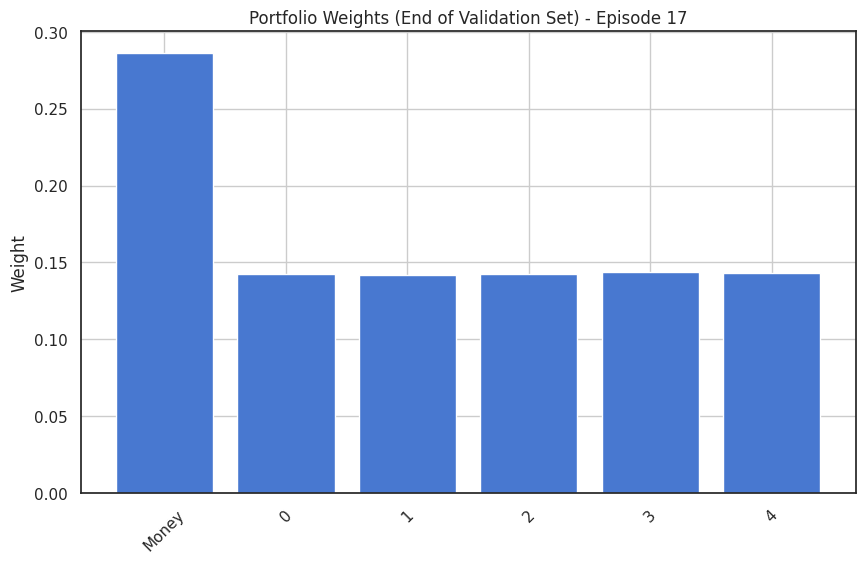

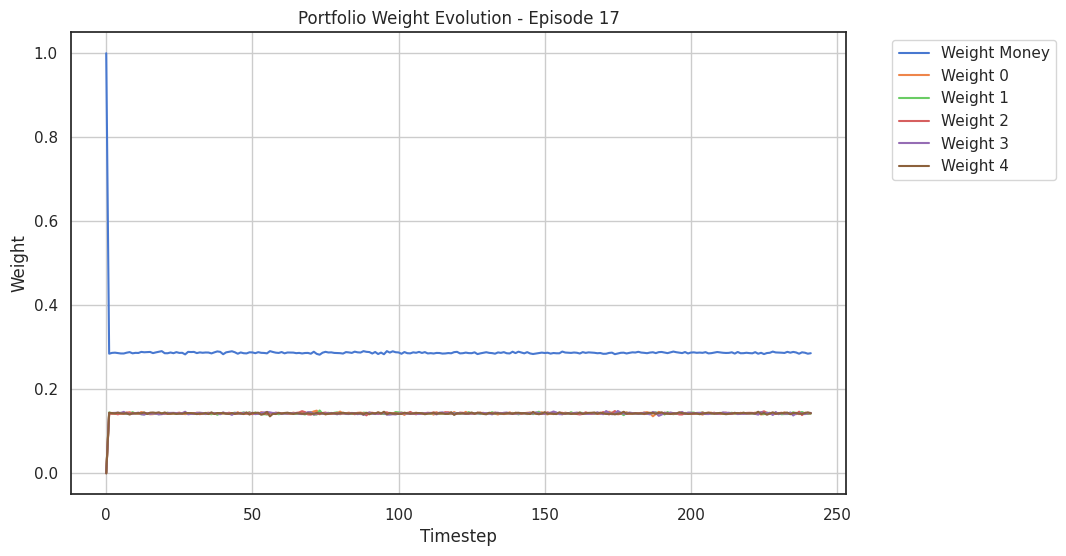

Start Episode 18
Episode: 18
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


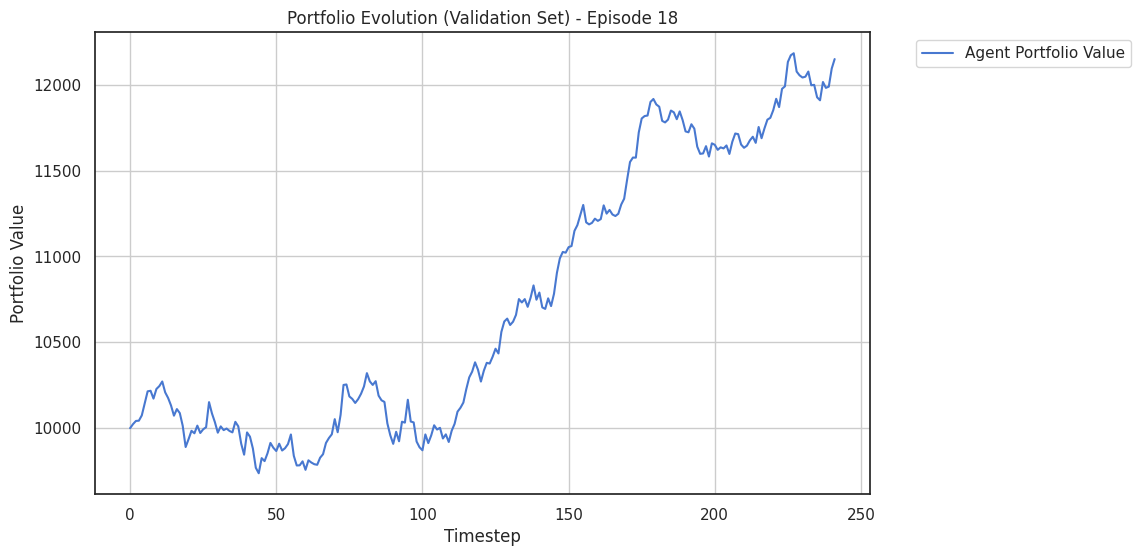

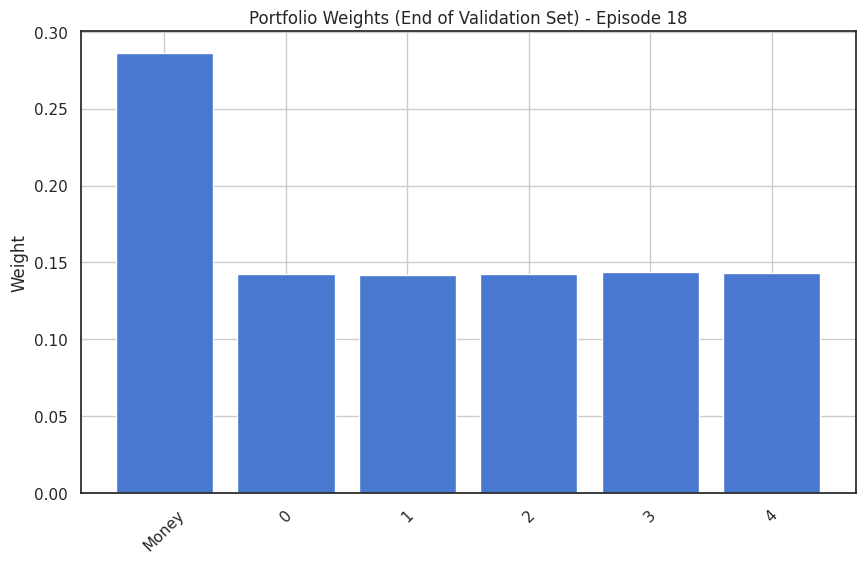

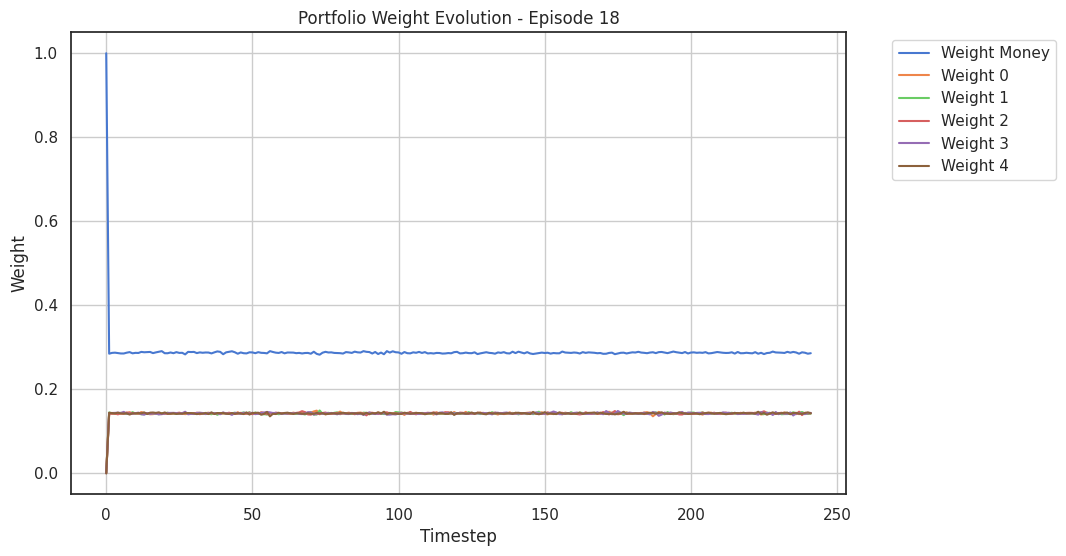

Start Episode 19
Episode: 19
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


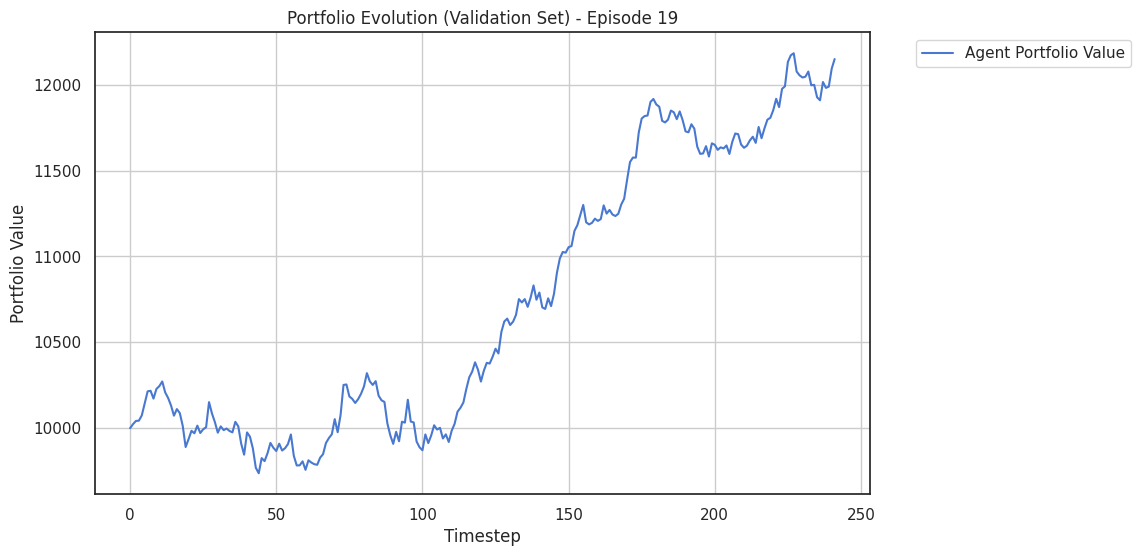

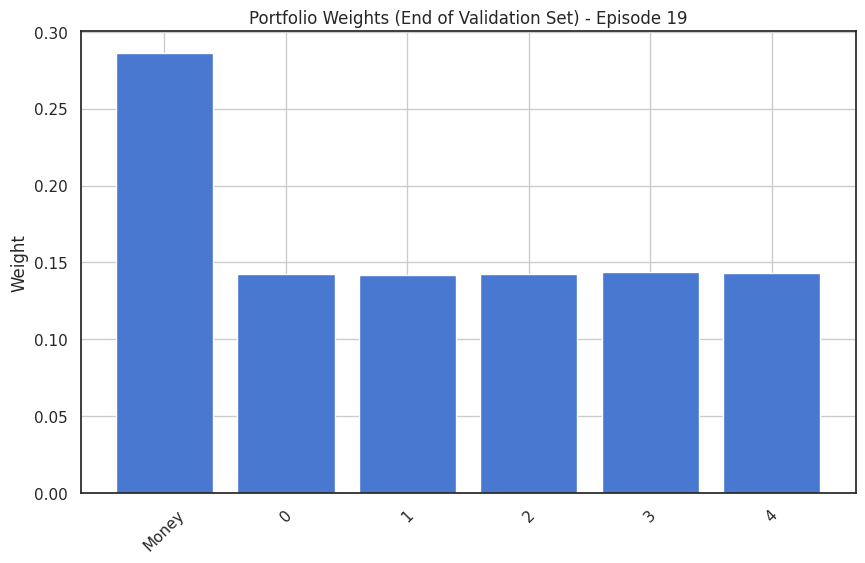

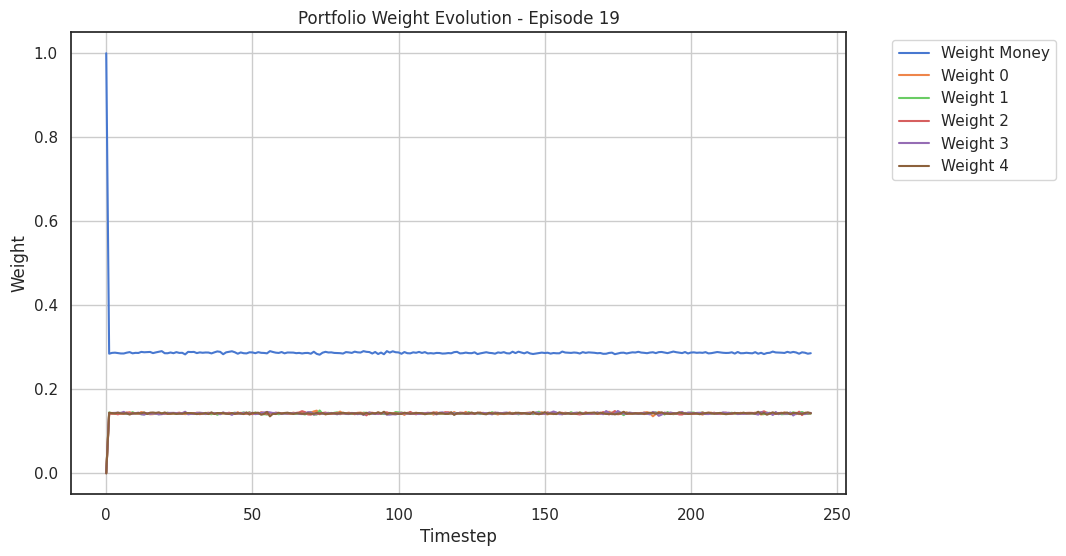

Start Episode 20
Episode: 20
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


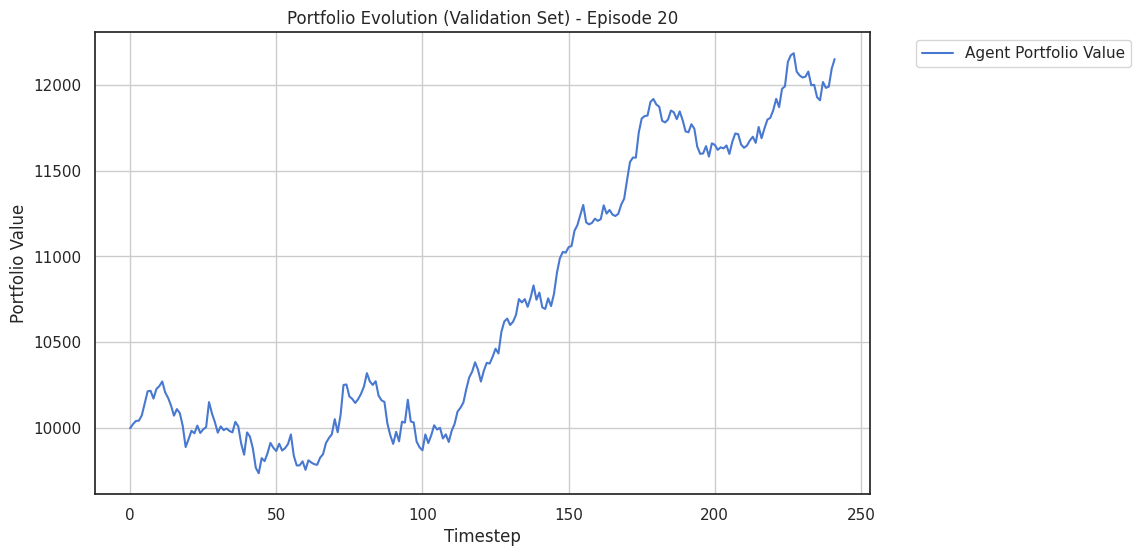

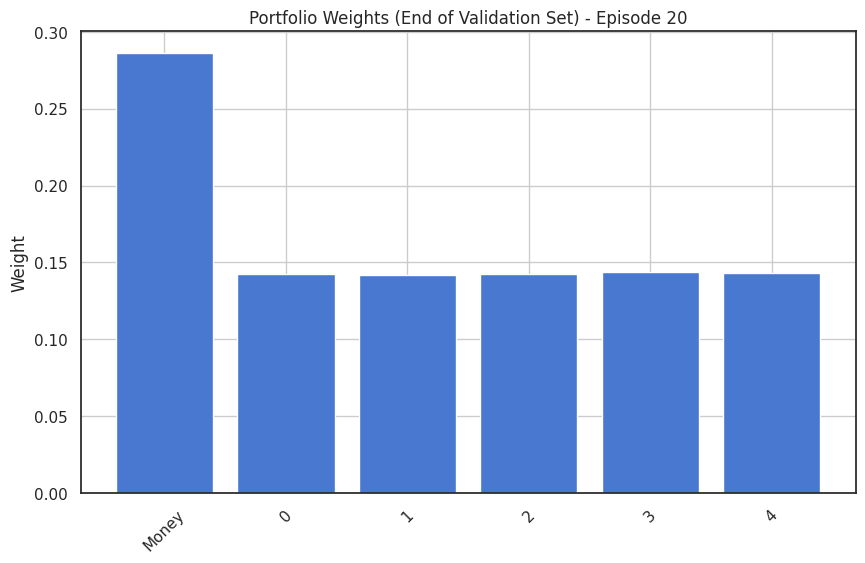

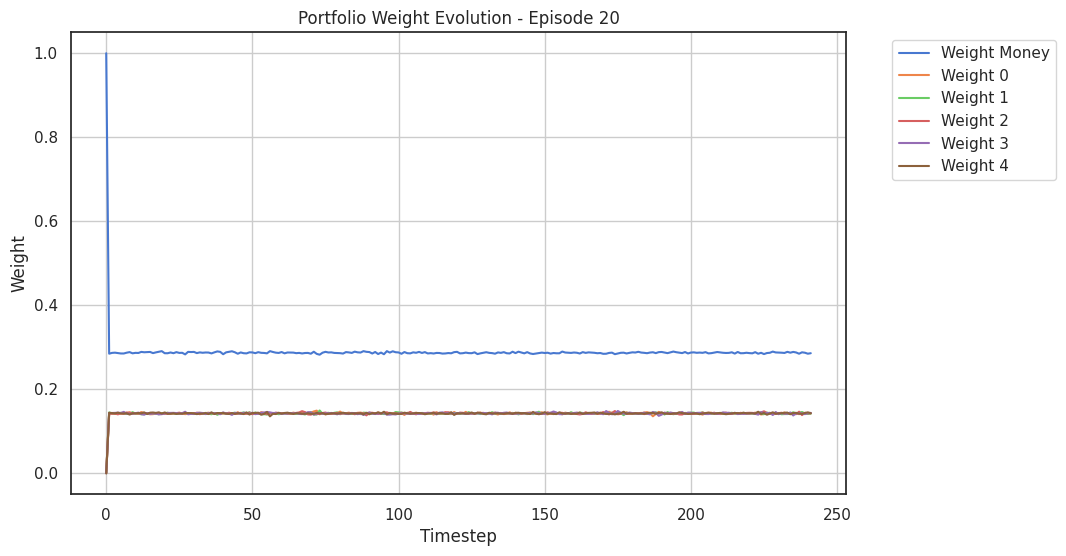

Start Episode 21
Episode: 21
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


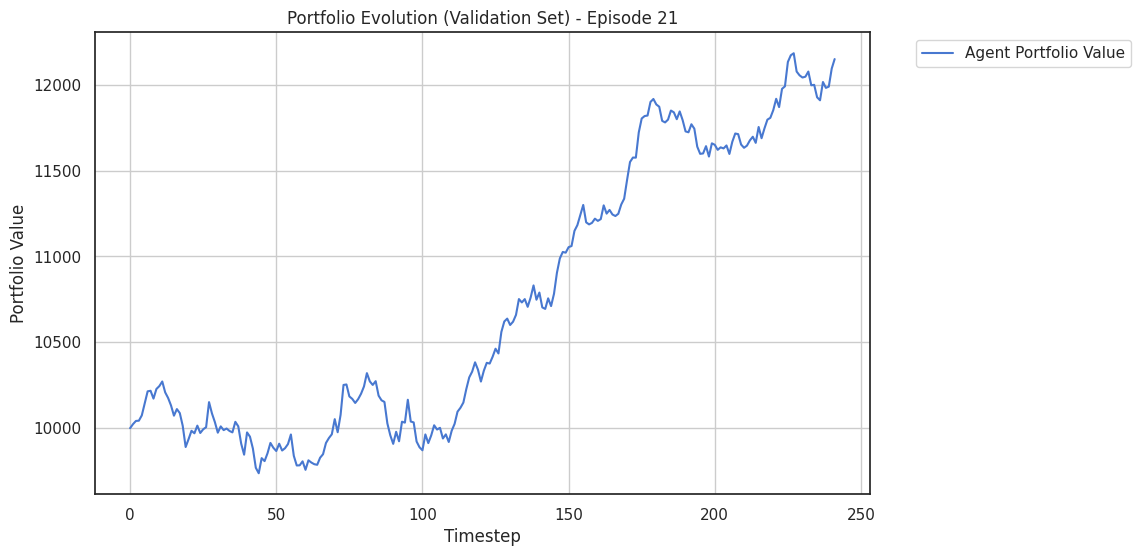

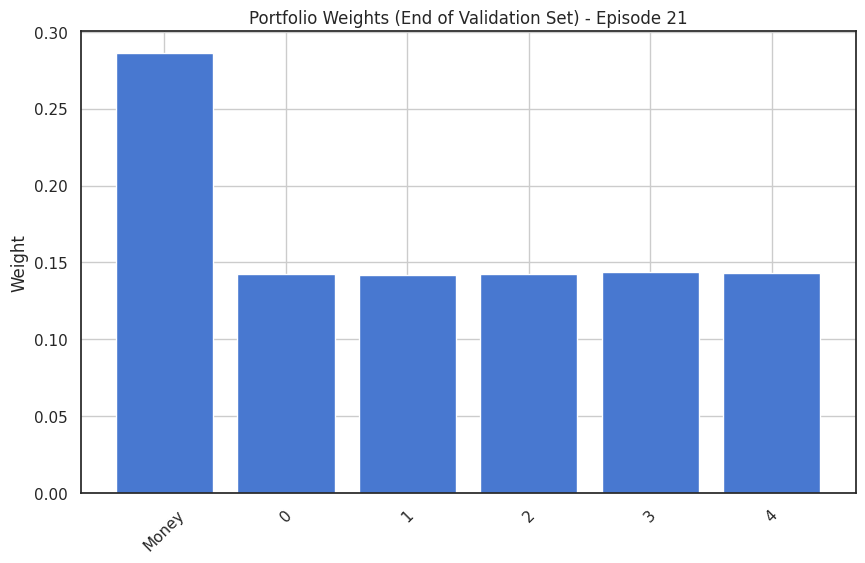

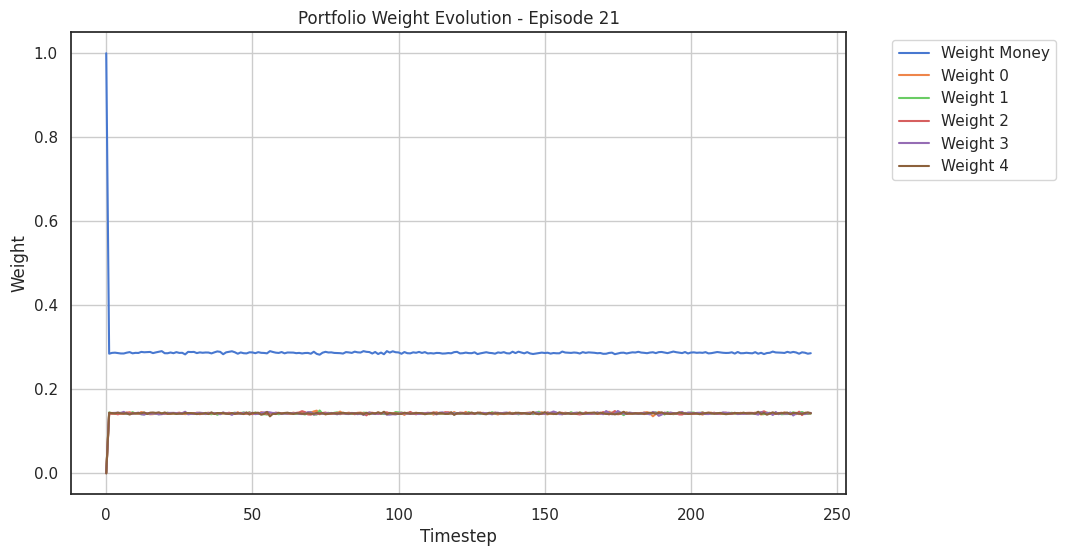

Start Episode 22
Episode: 22
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


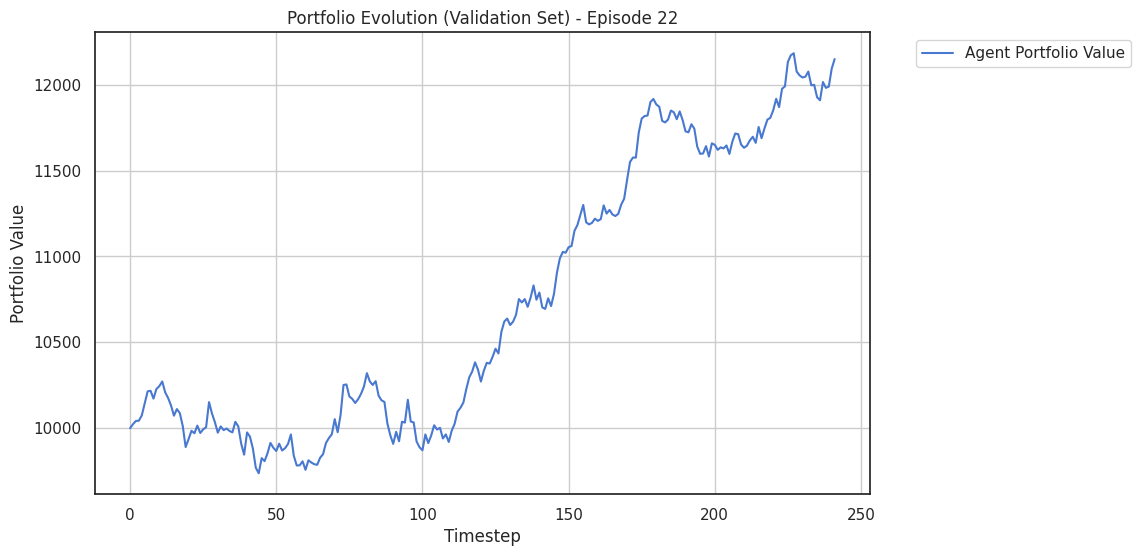

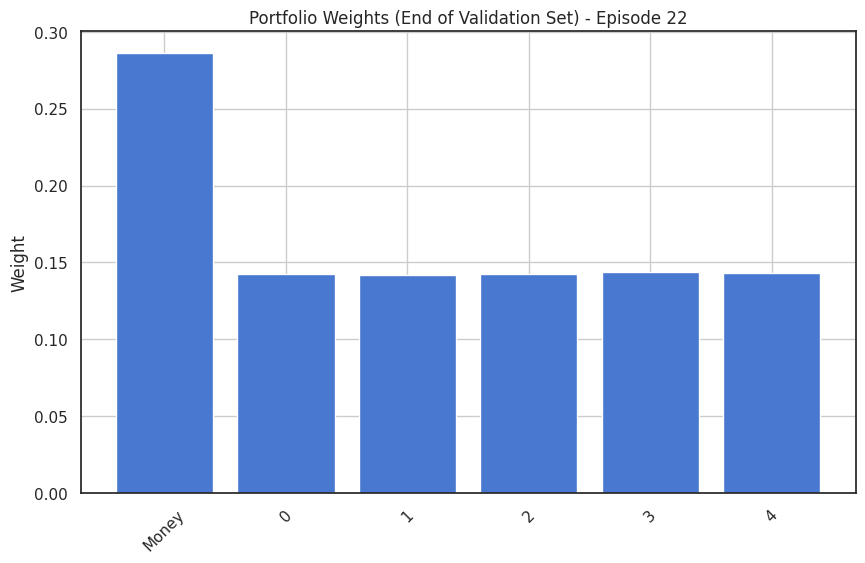

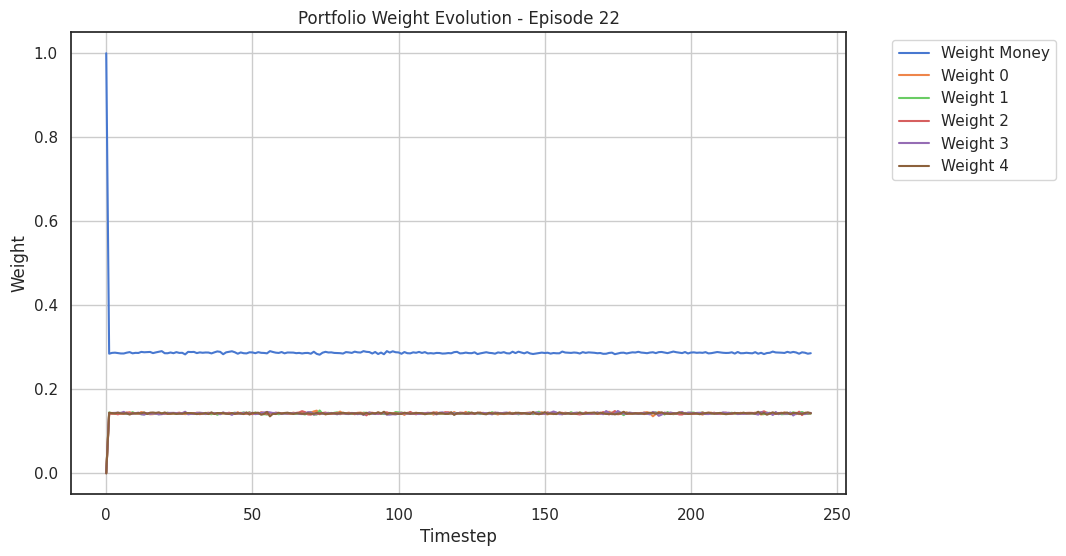

Start Episode 23
Episode: 23
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


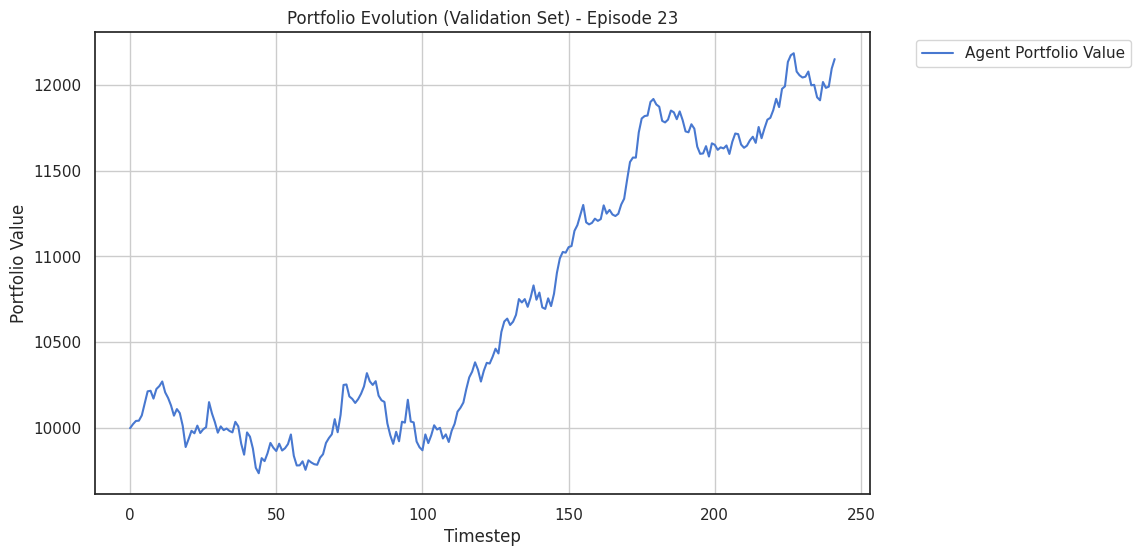

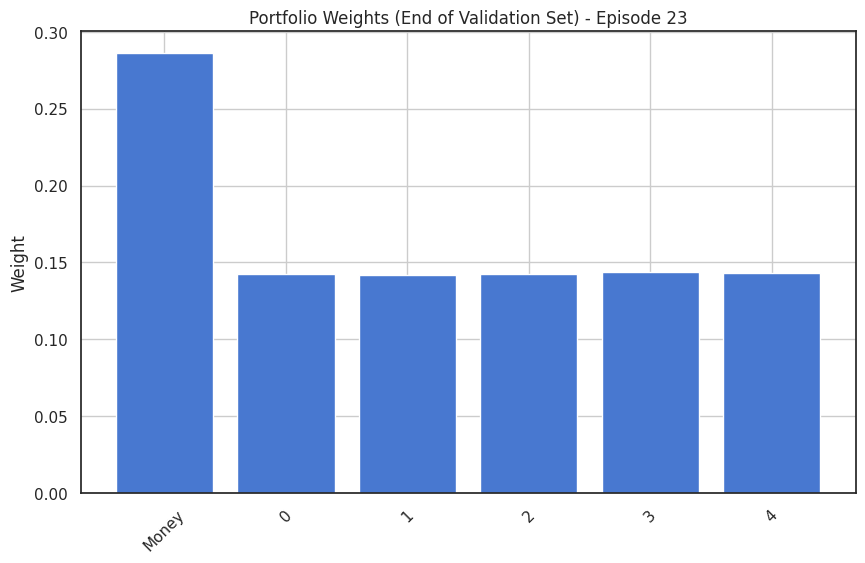

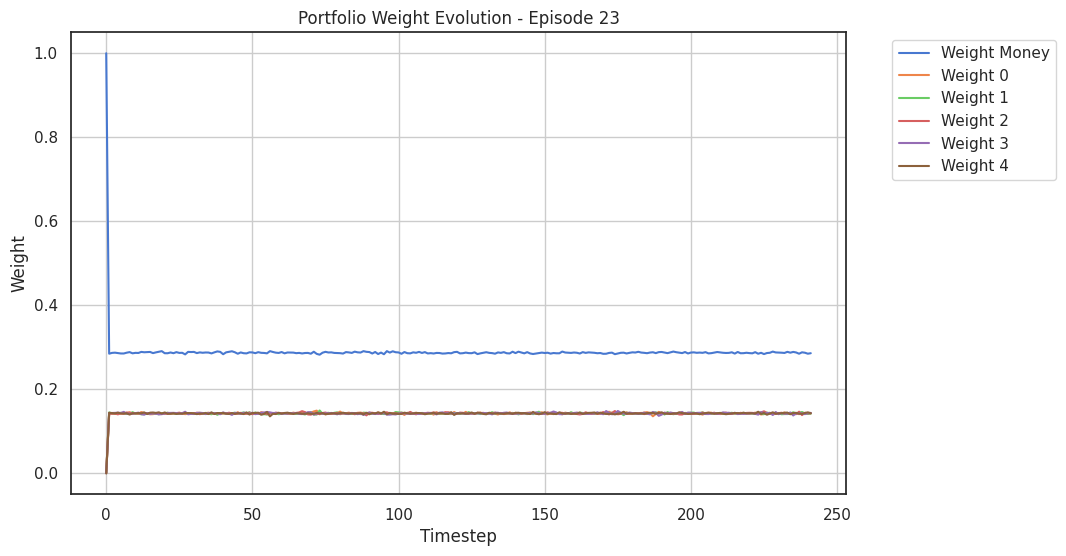

Start Episode 24
Episode: 24
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


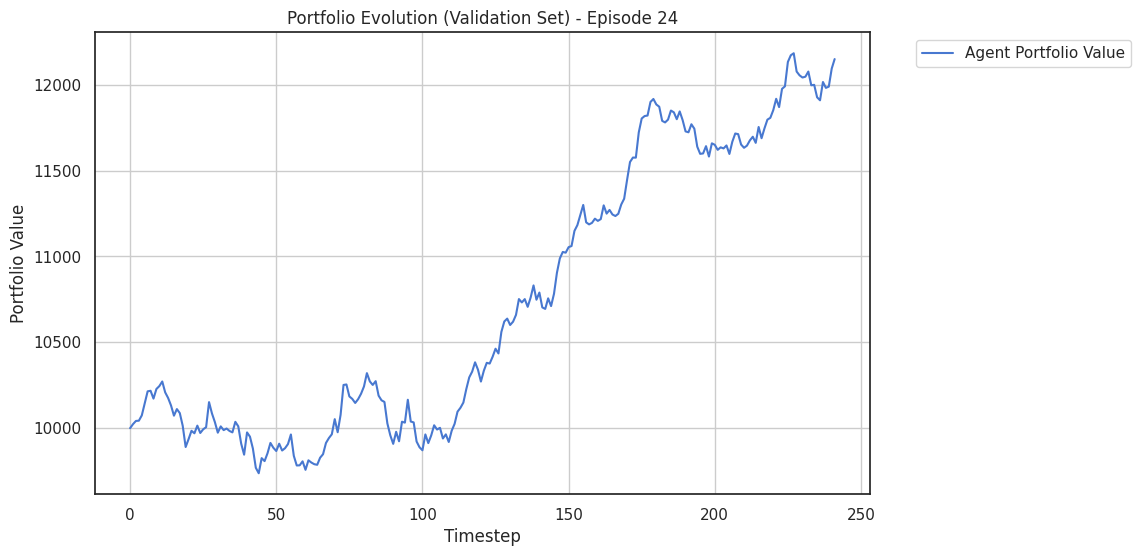

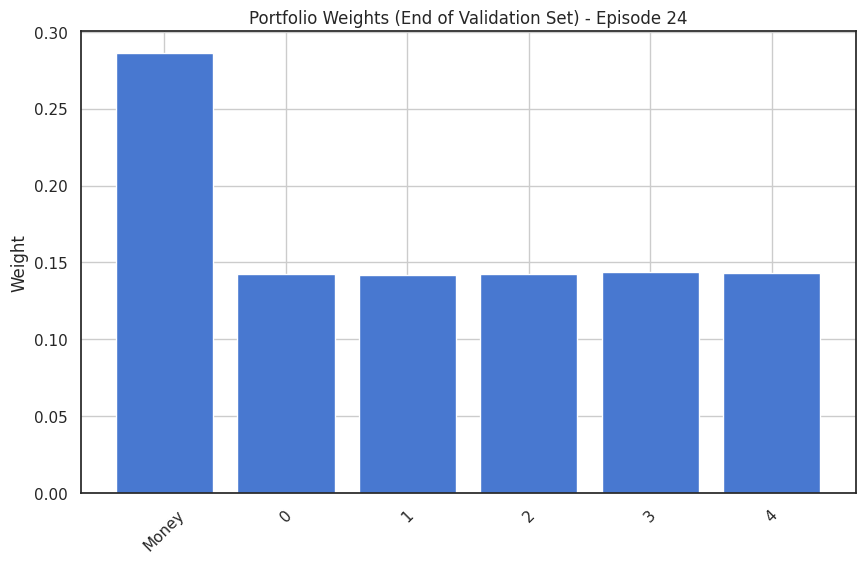

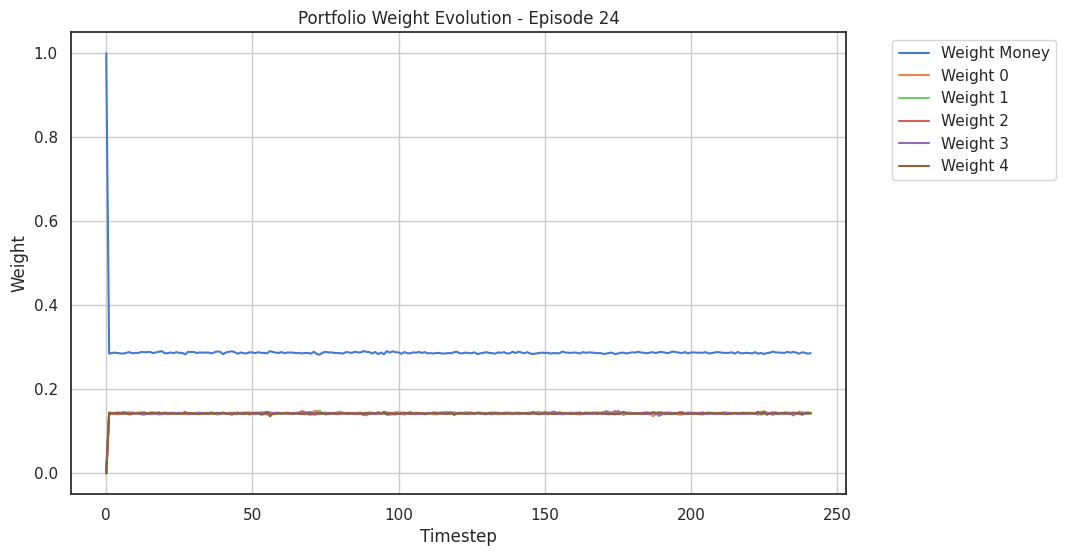

Start Episode 25
Episode: 25
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


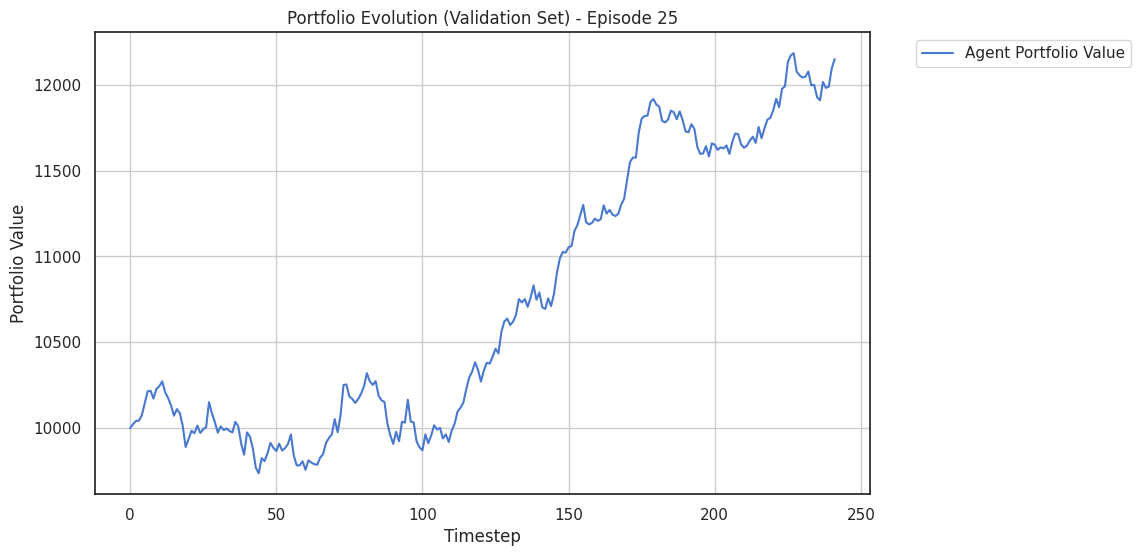

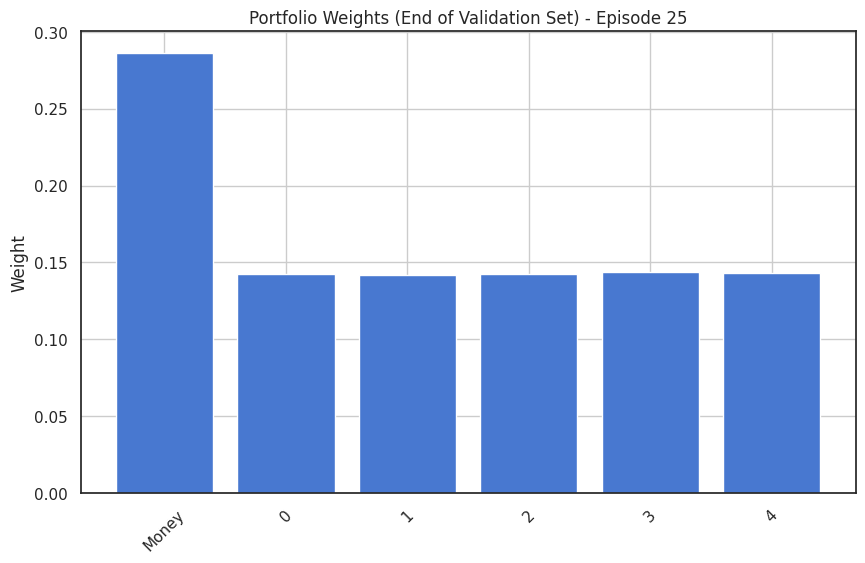

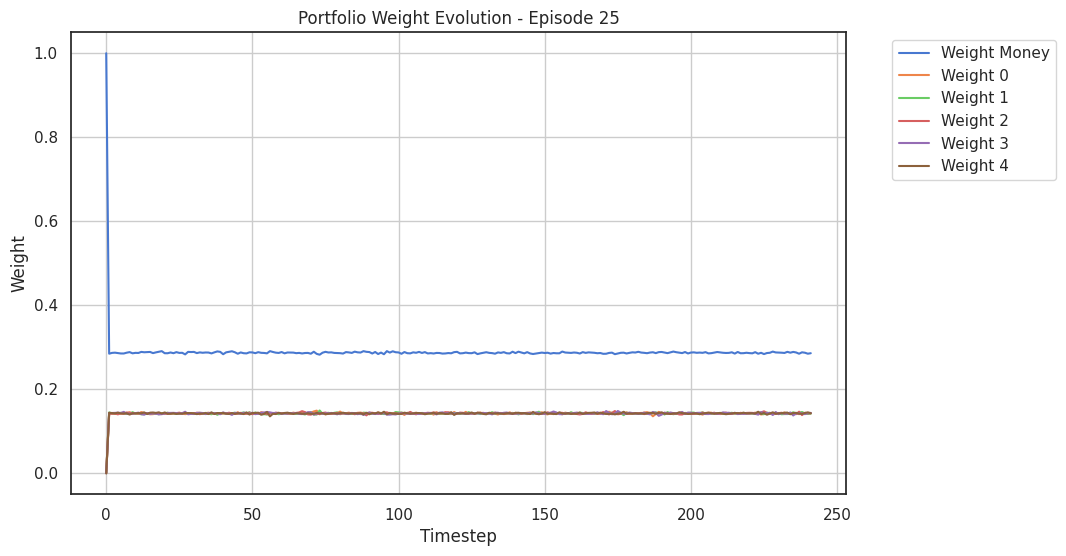

Start Episode 26
Episode: 26
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


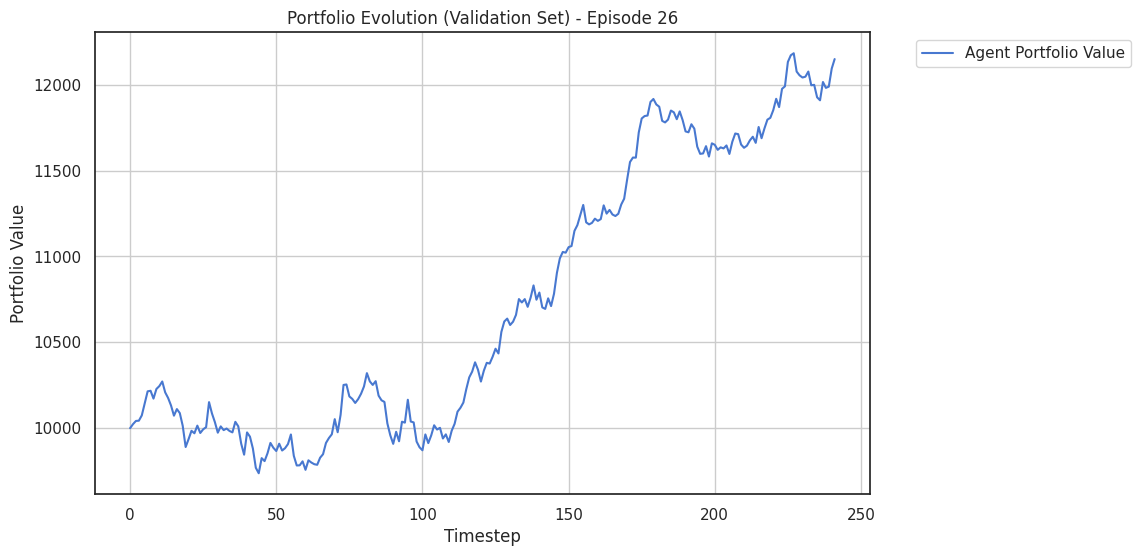

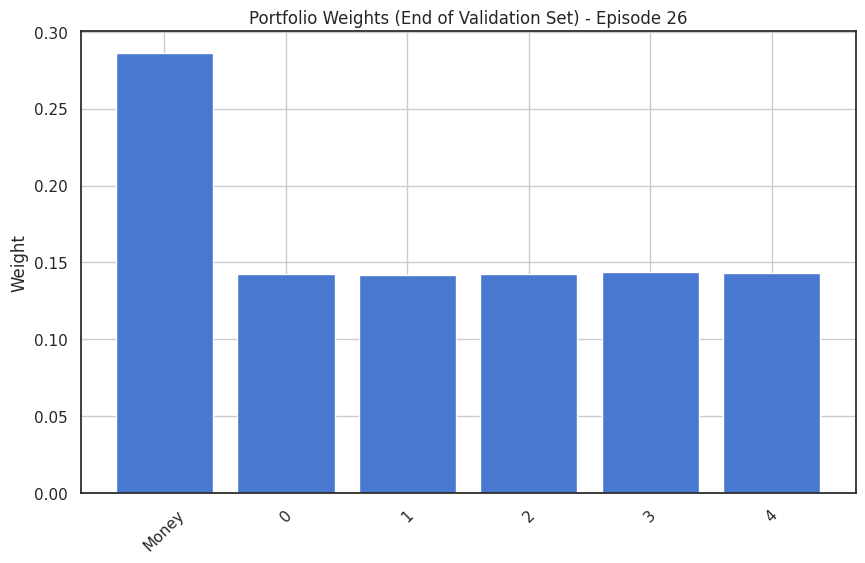

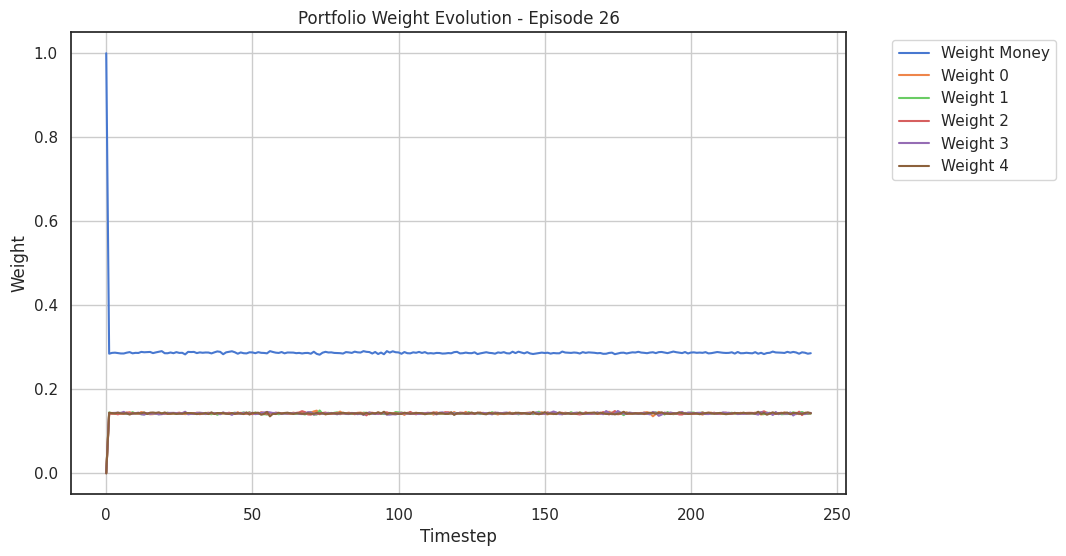

Start Episode 27
Episode: 27
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


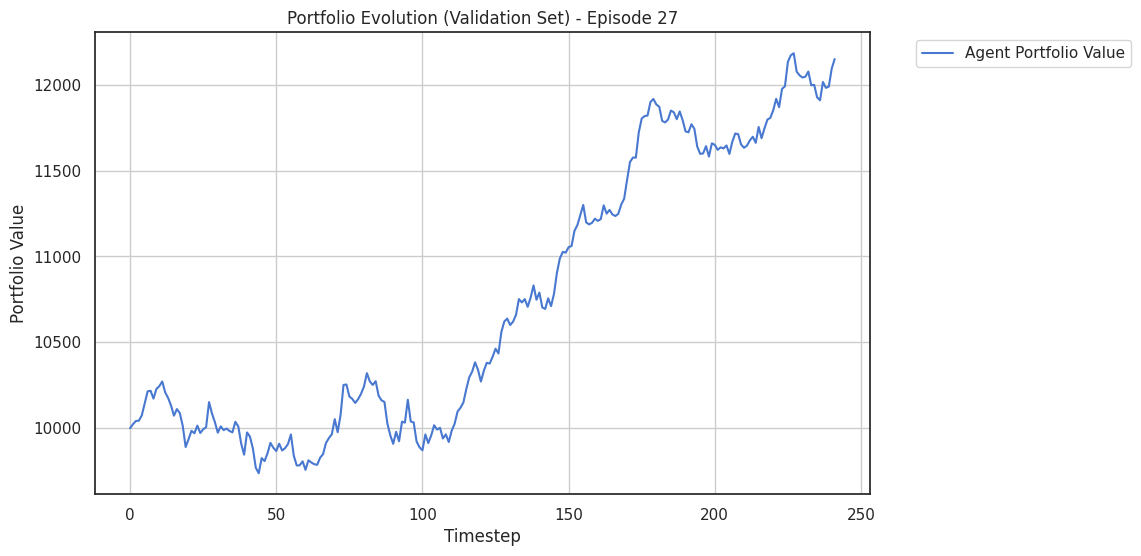

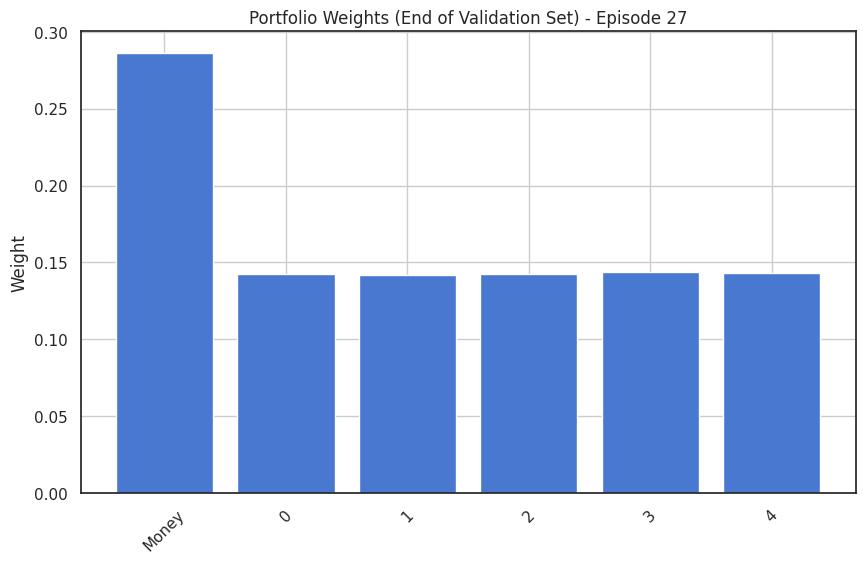

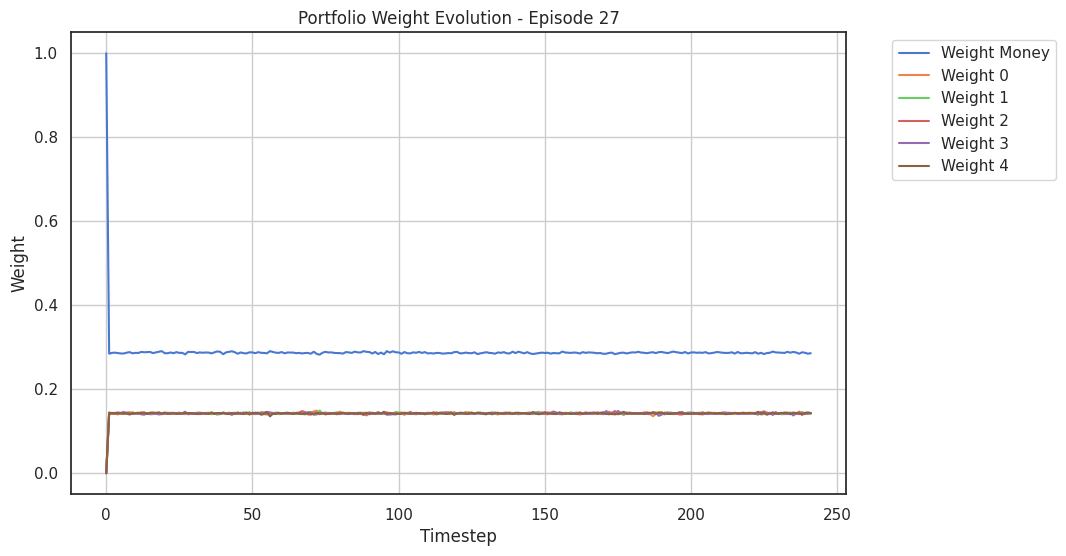

Start Episode 28
Episode: 28
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


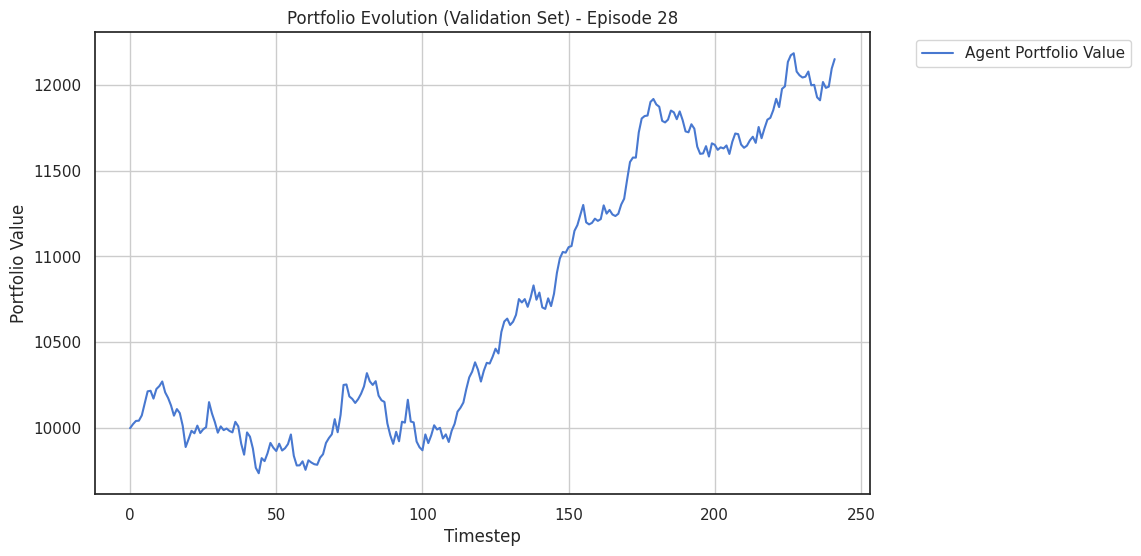

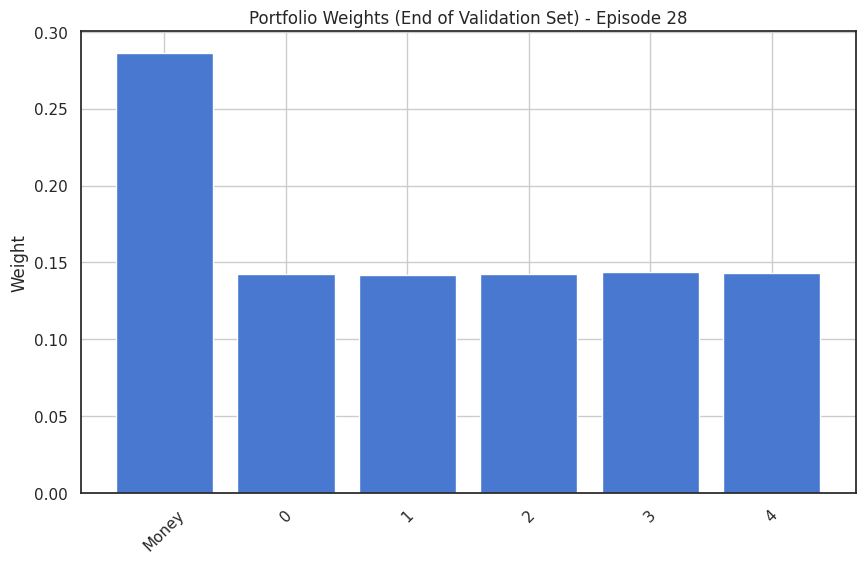

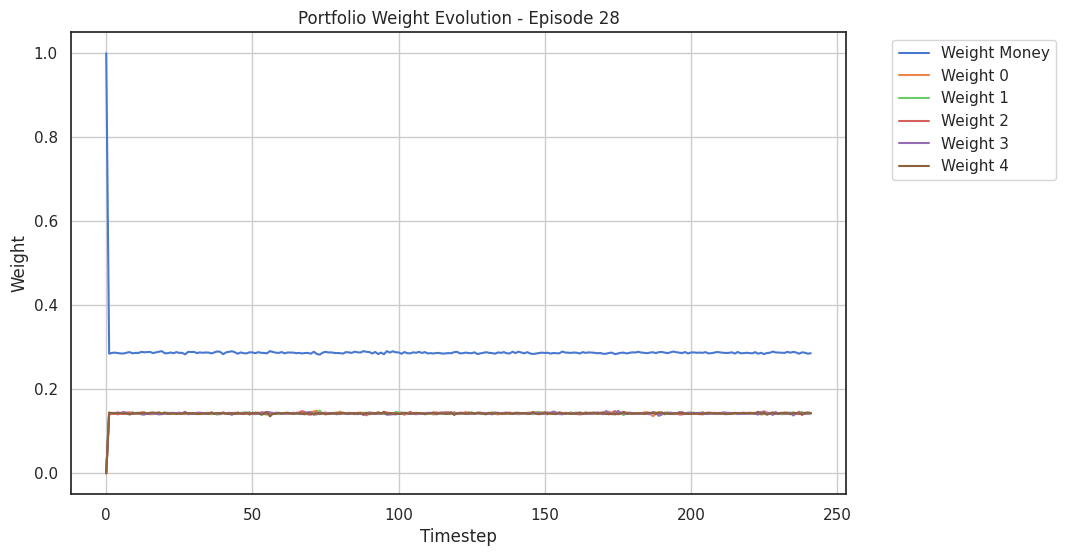

Start Episode 29
Episode: 29
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


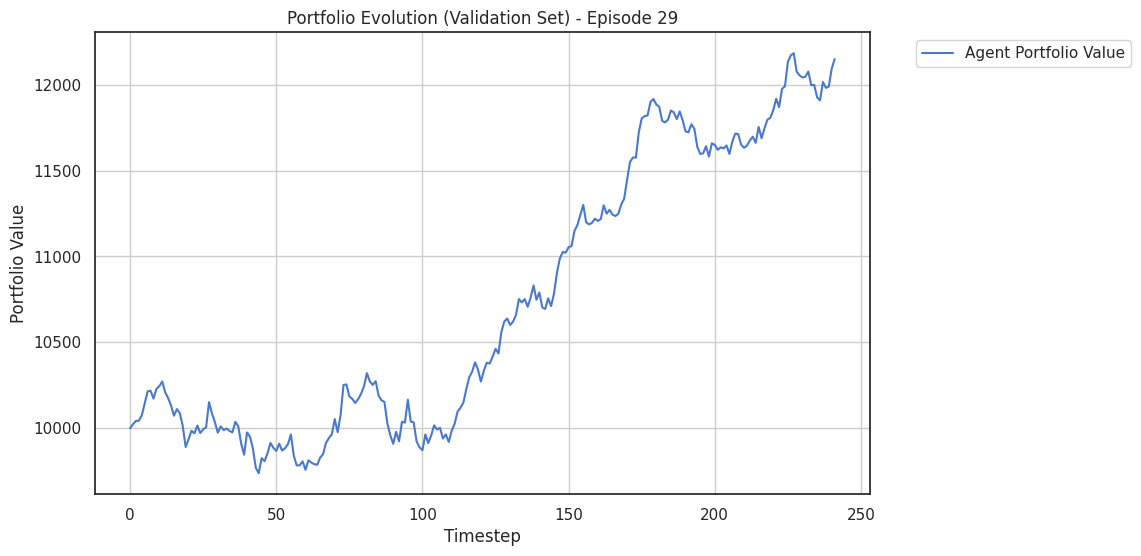

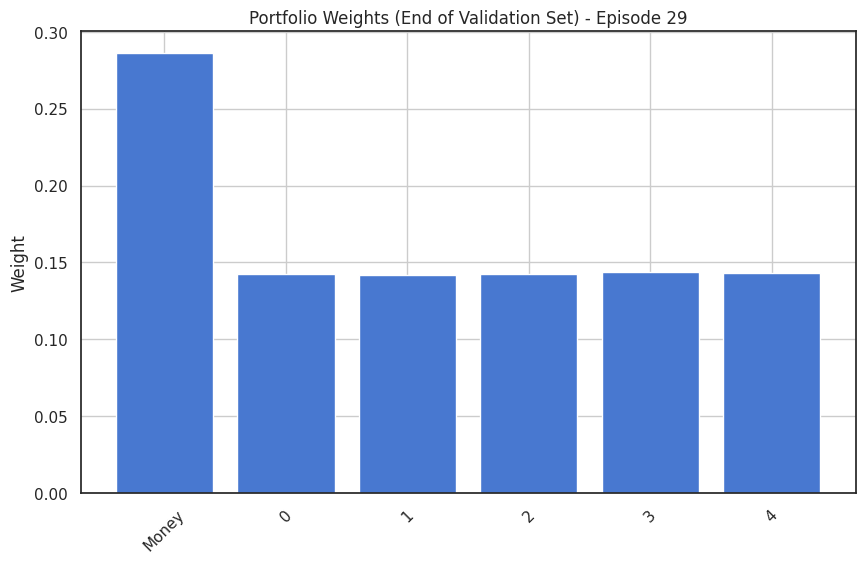

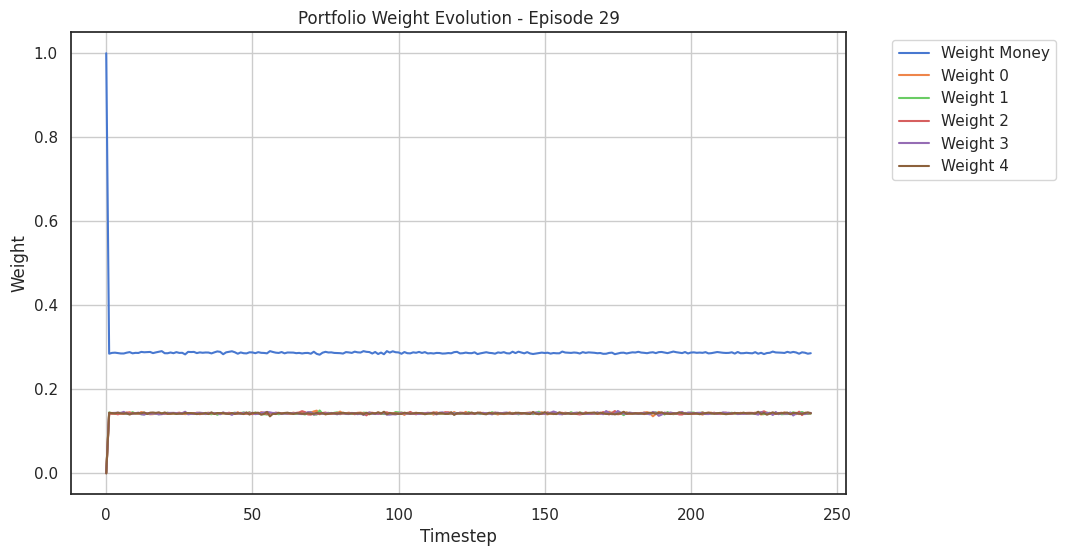

Start Episode 30
Episode: 30
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


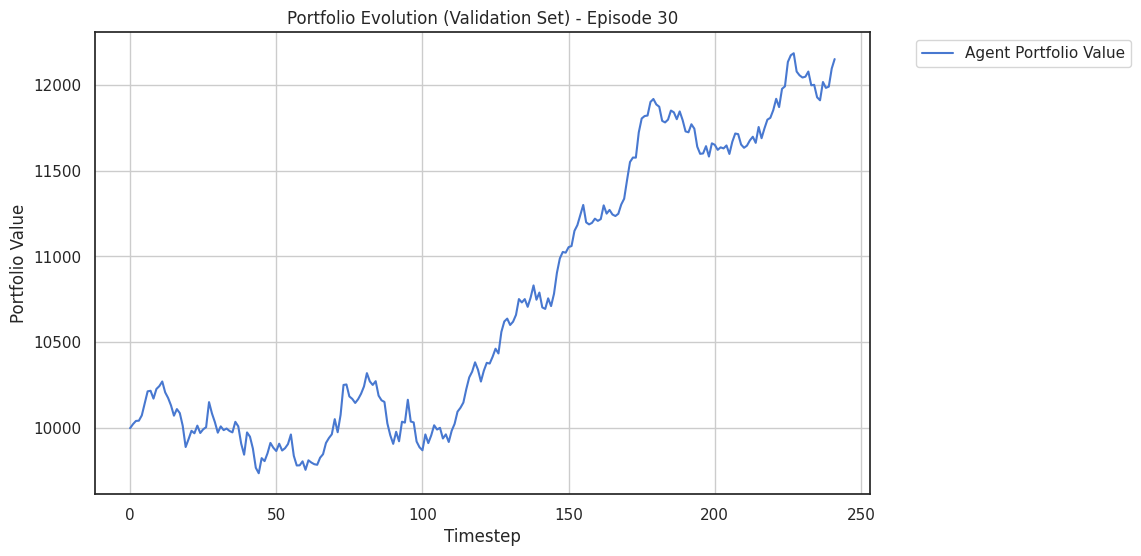

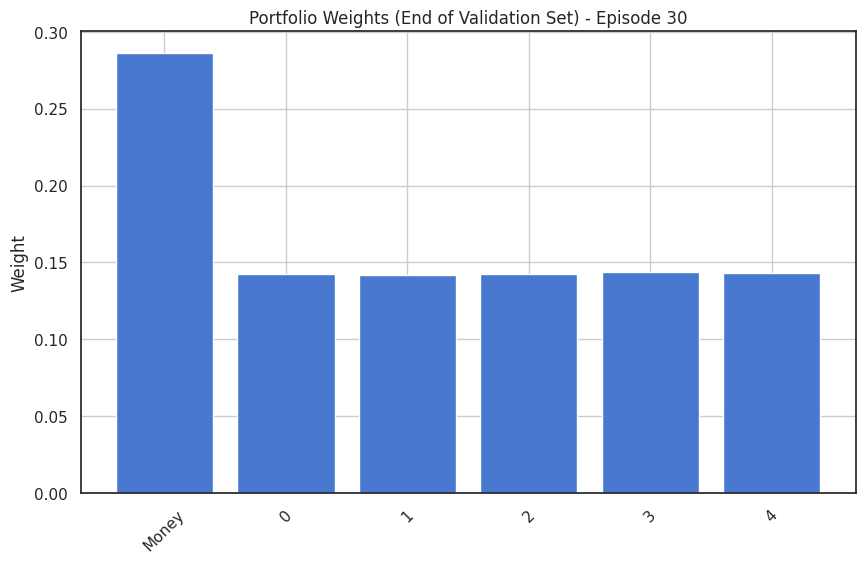

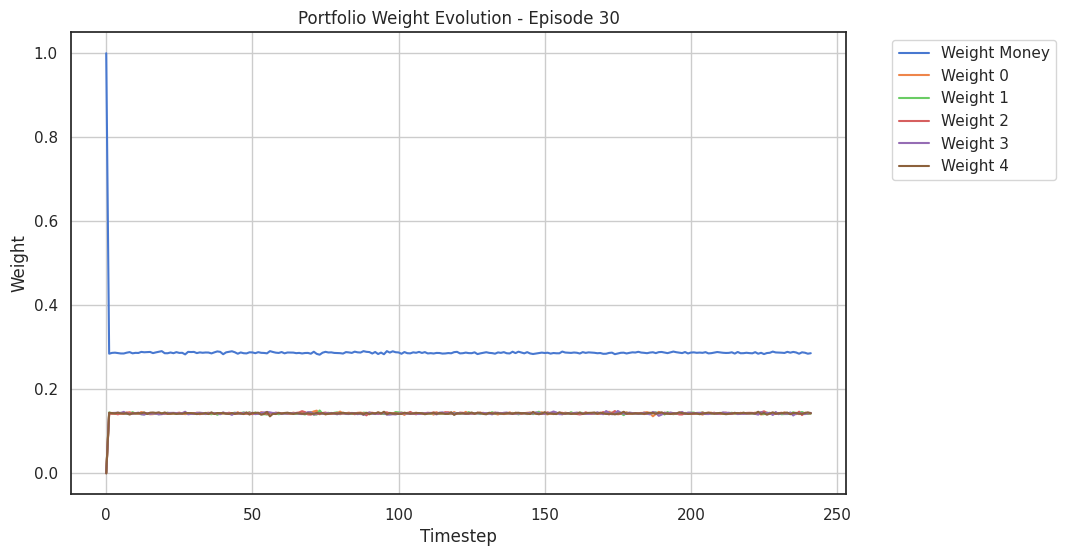

Start Episode 31
Episode: 31
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


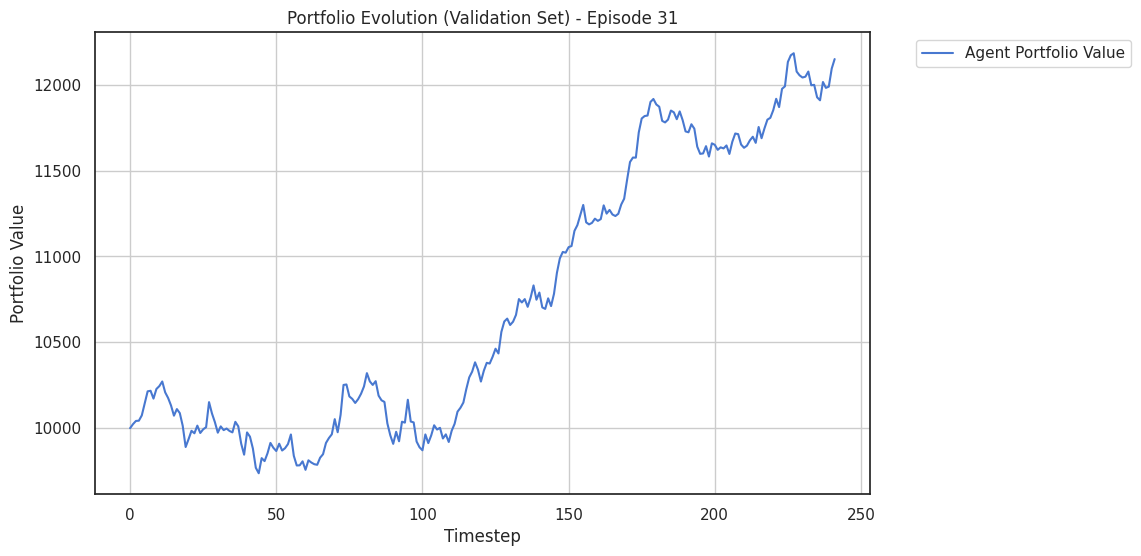

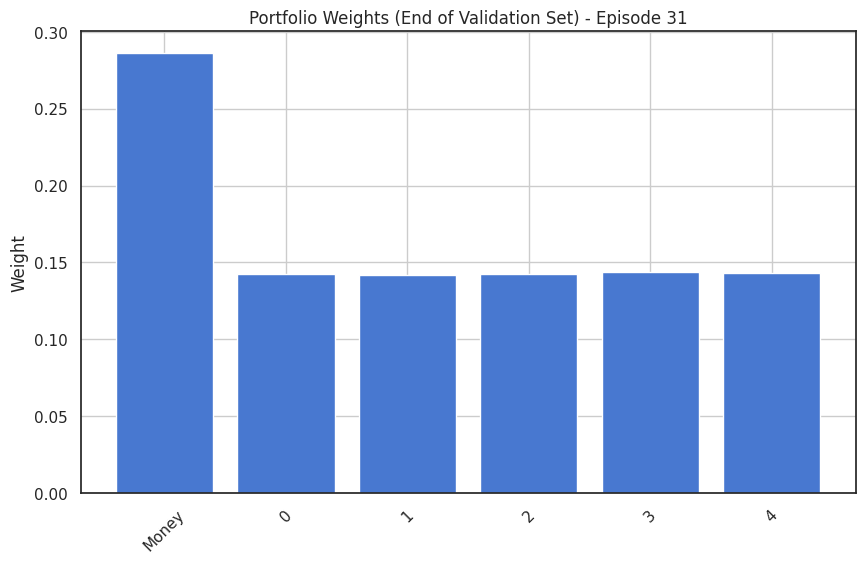

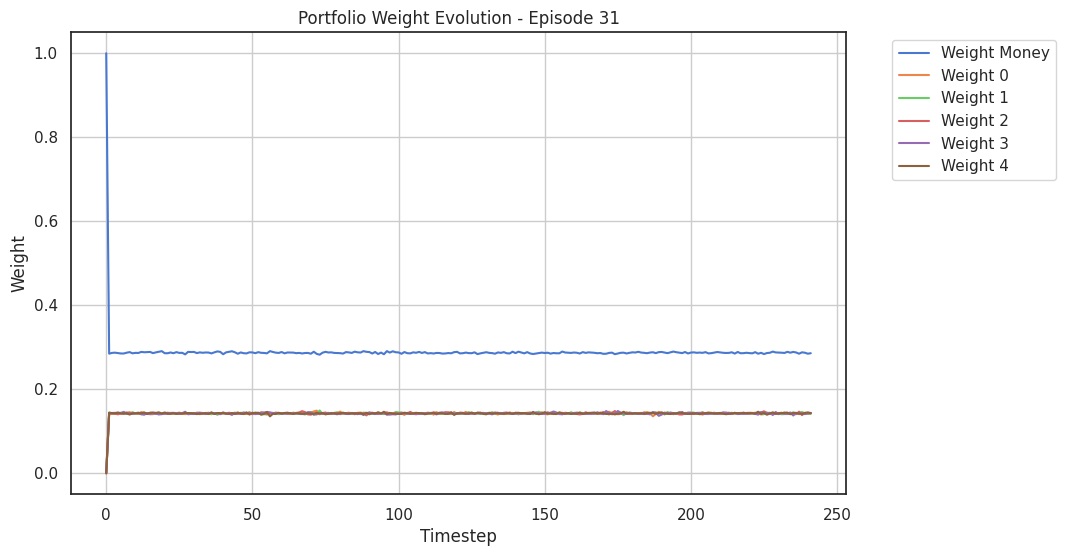

Start Episode 32
Episode: 32
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


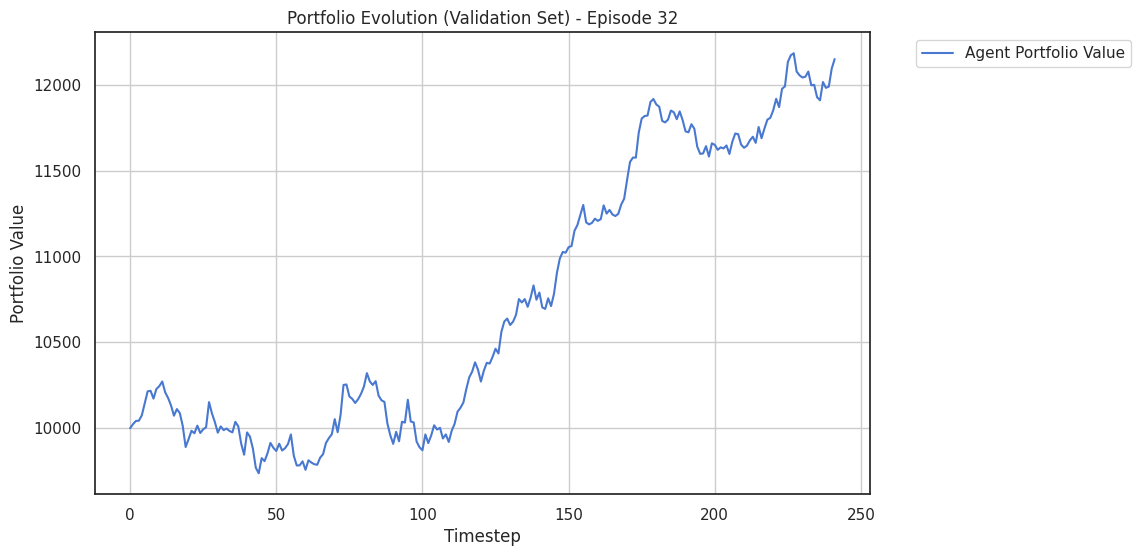

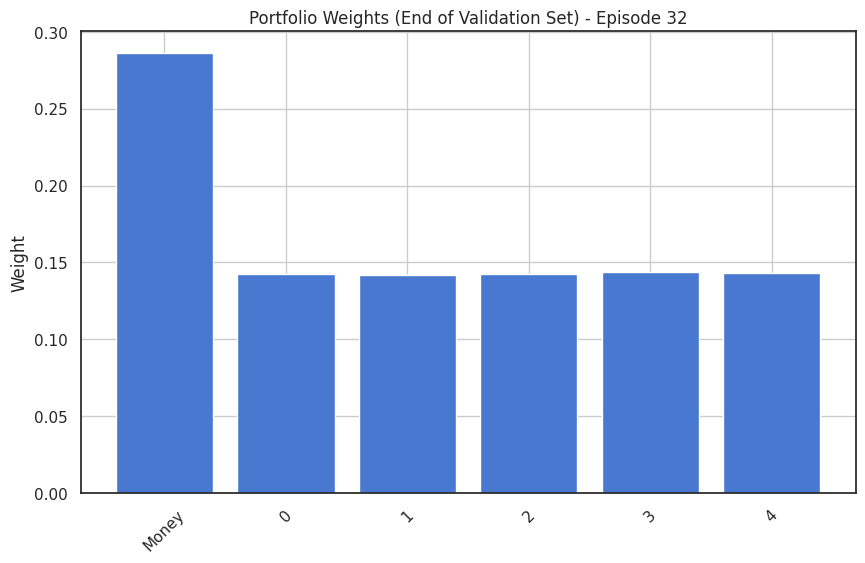

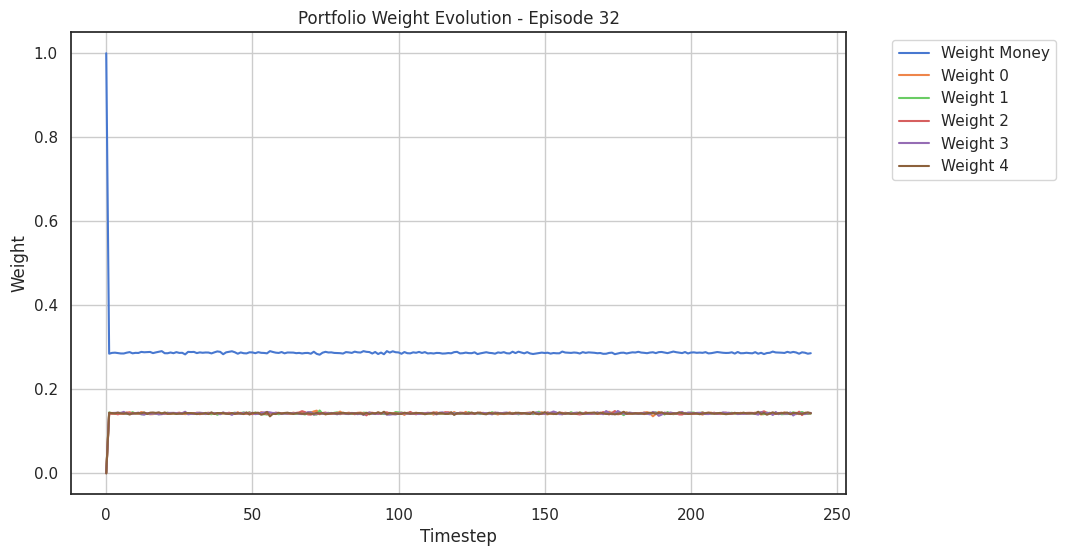

Start Episode 33
Episode: 33
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


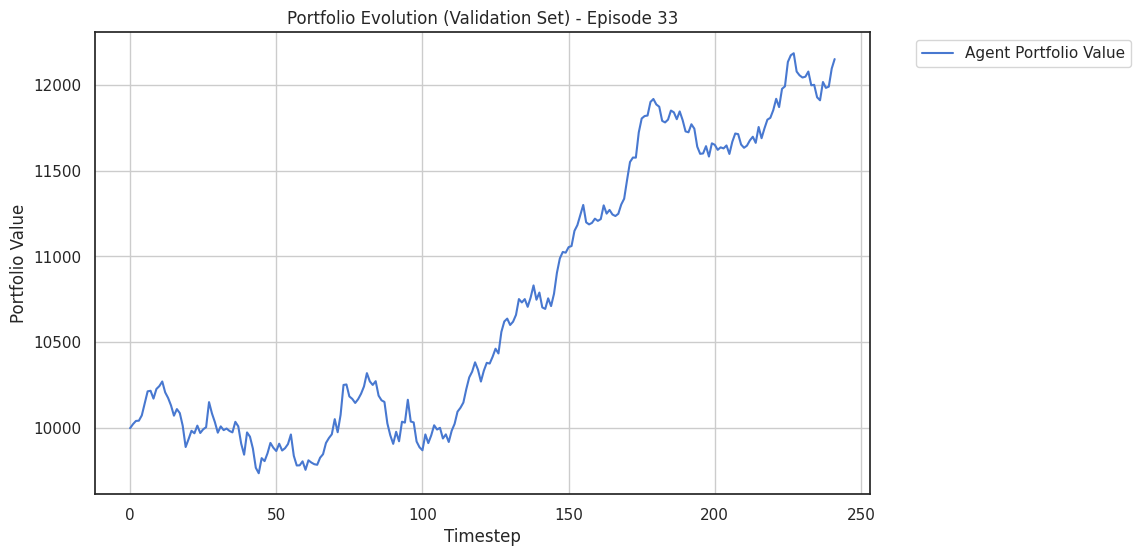

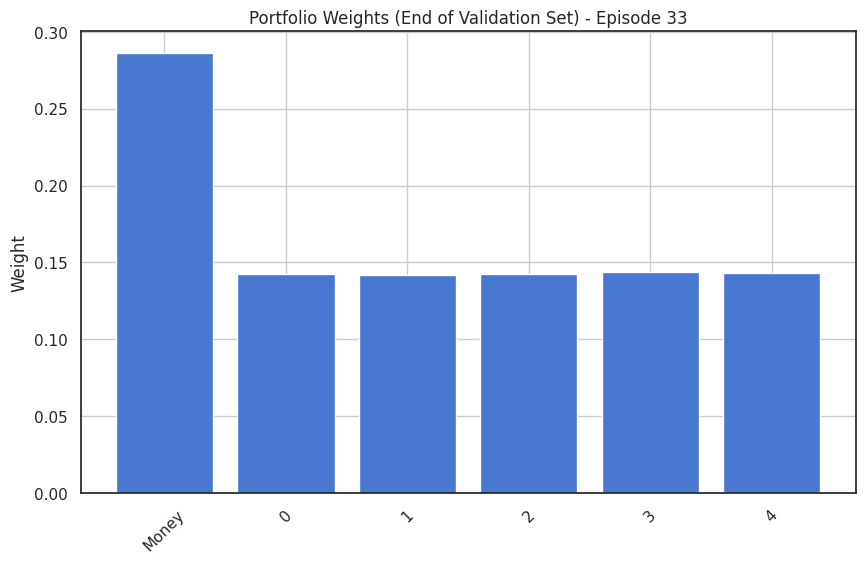

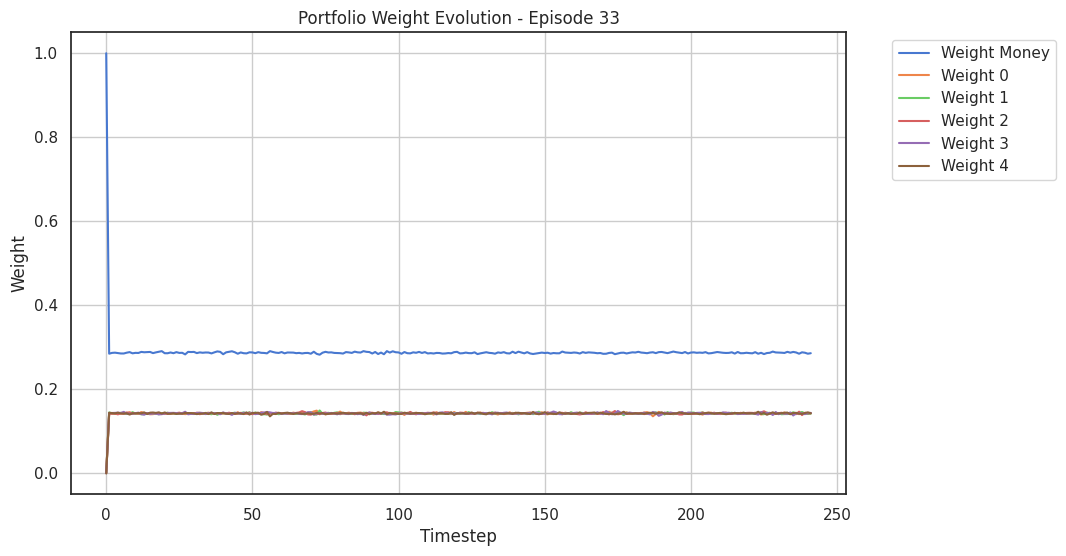

Start Episode 34
Episode: 34
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


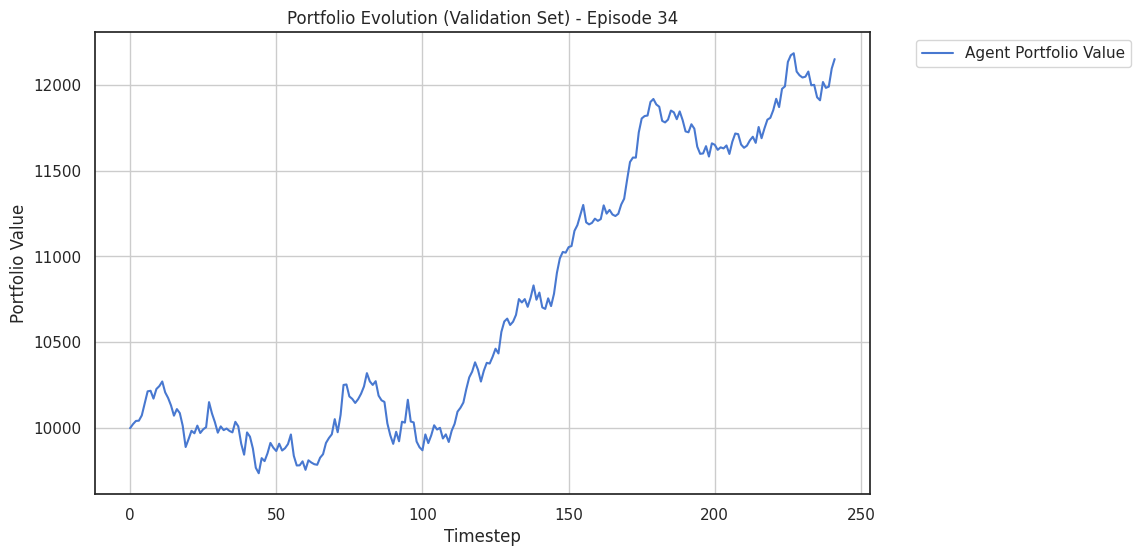

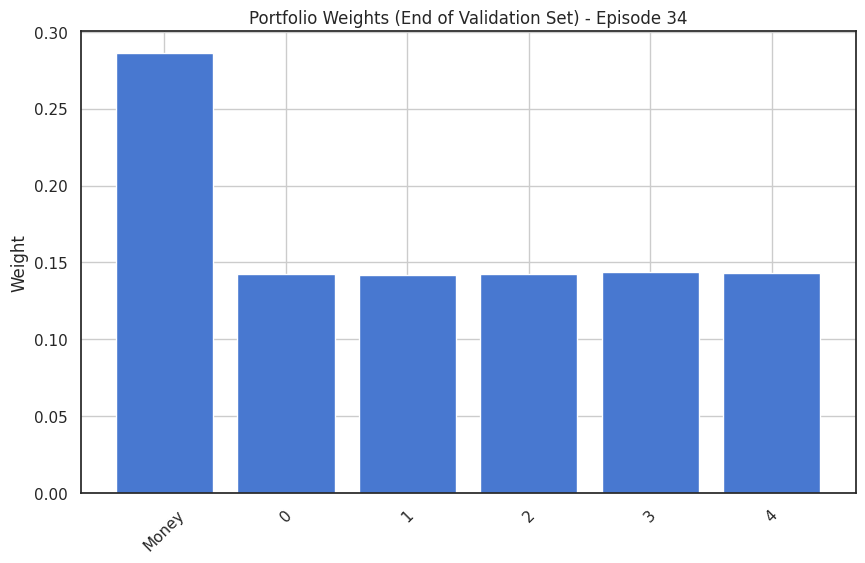

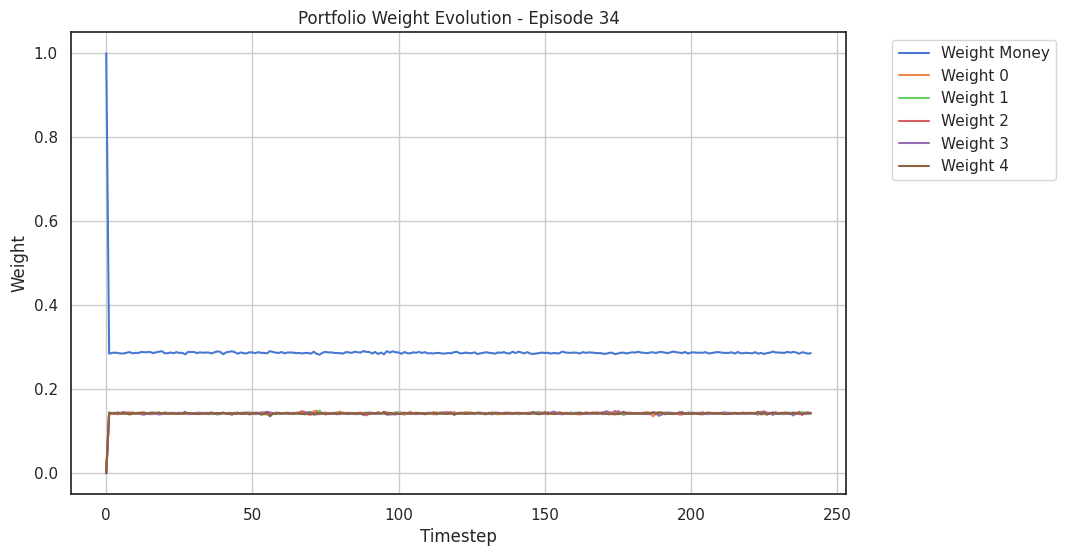

Start Episode 35
Episode: 35
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


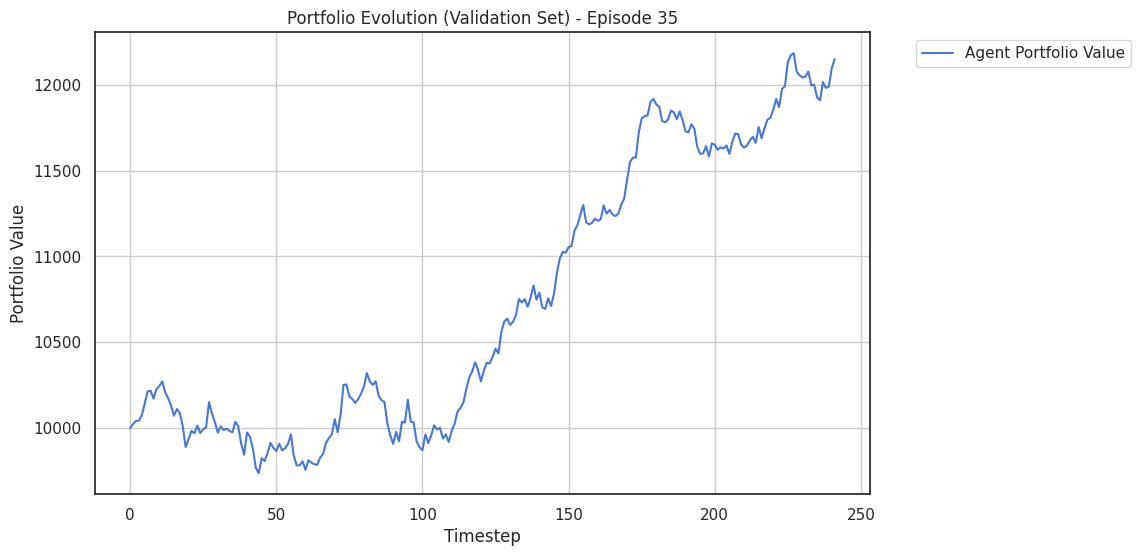

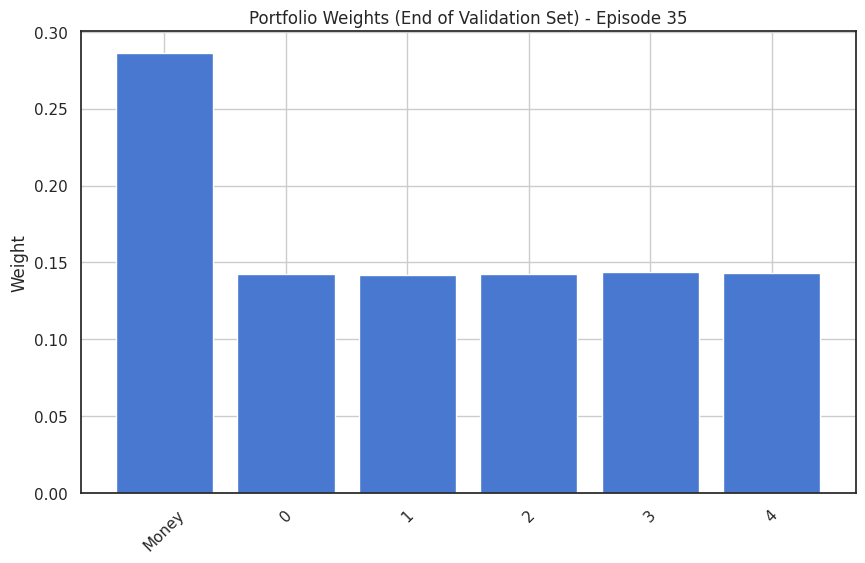

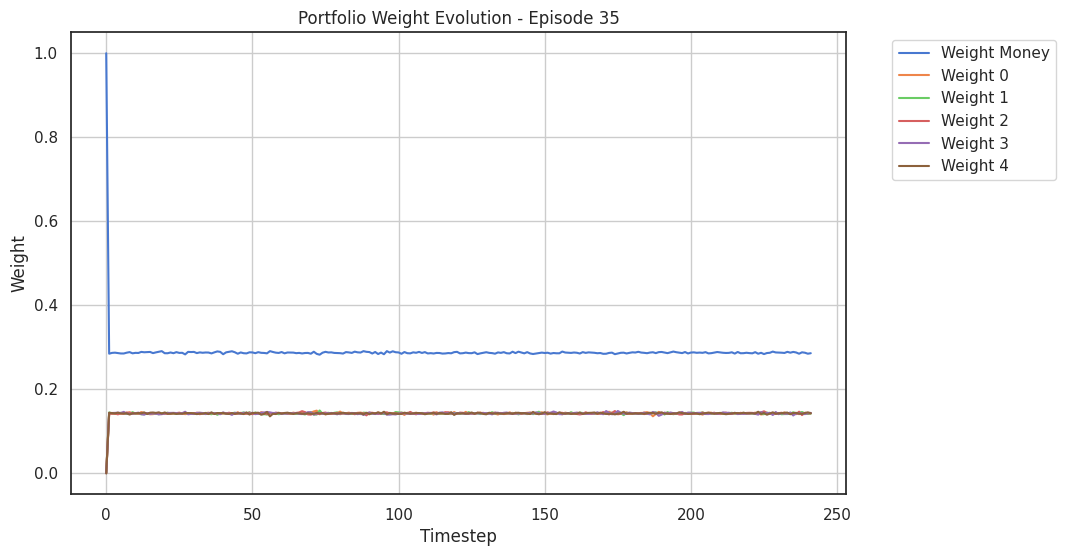

Start Episode 36
Episode: 36
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


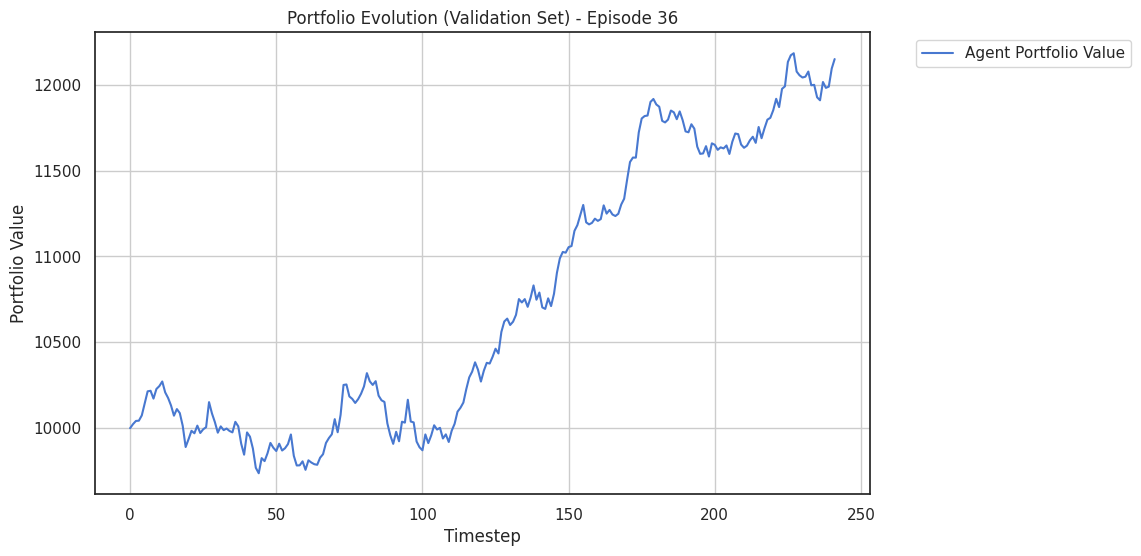

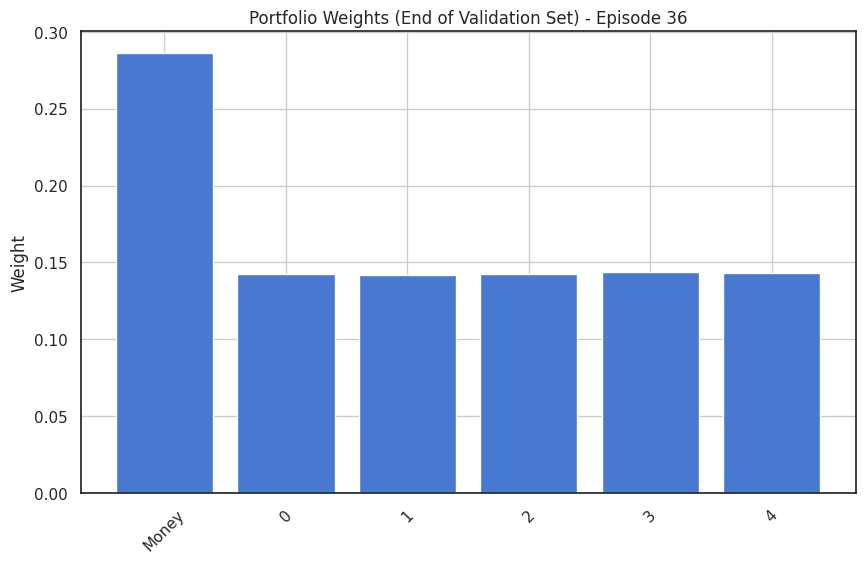

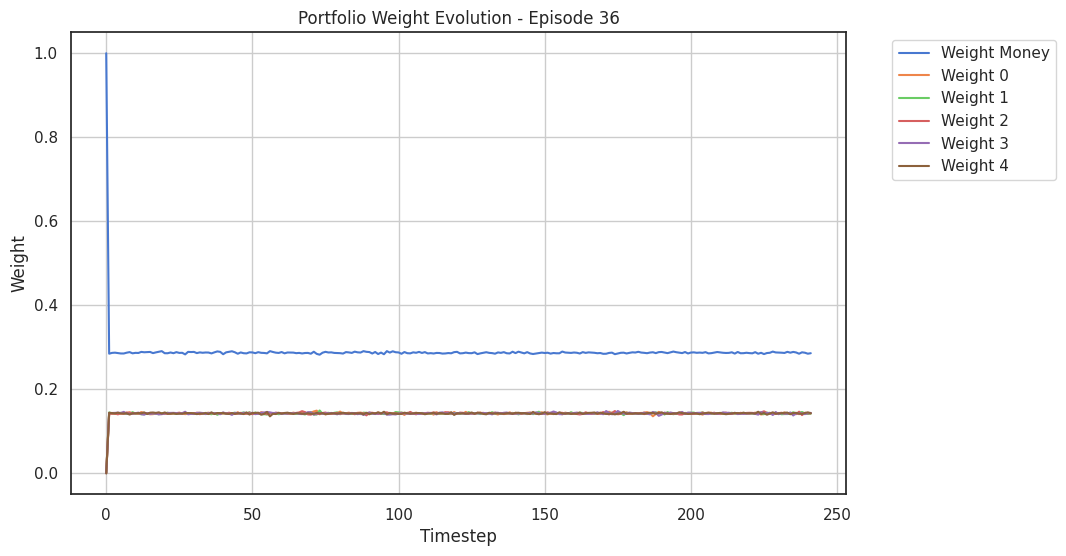

Start Episode 37
Episode: 37
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


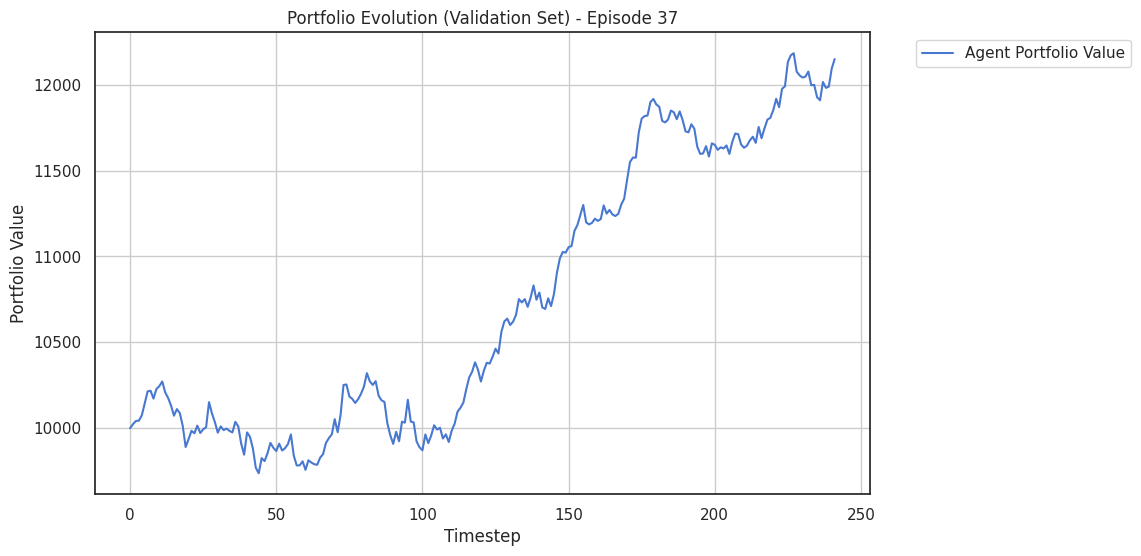

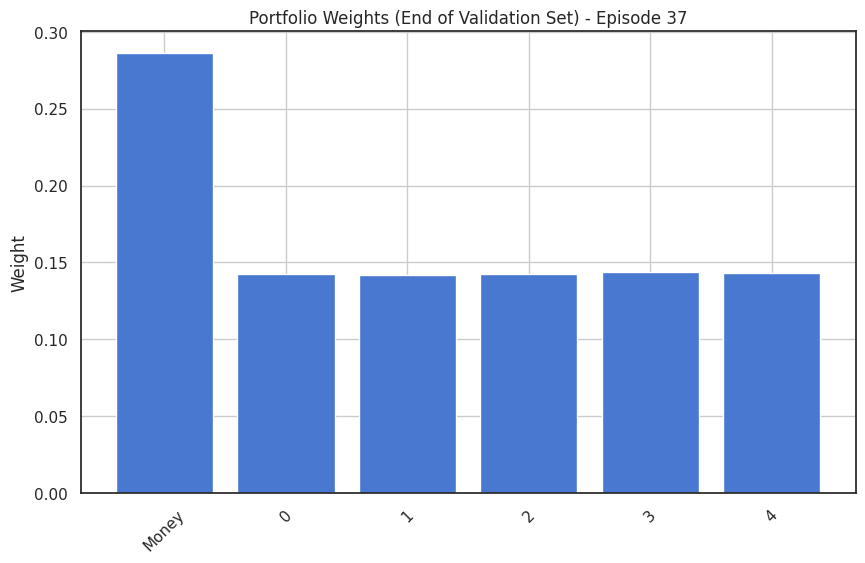

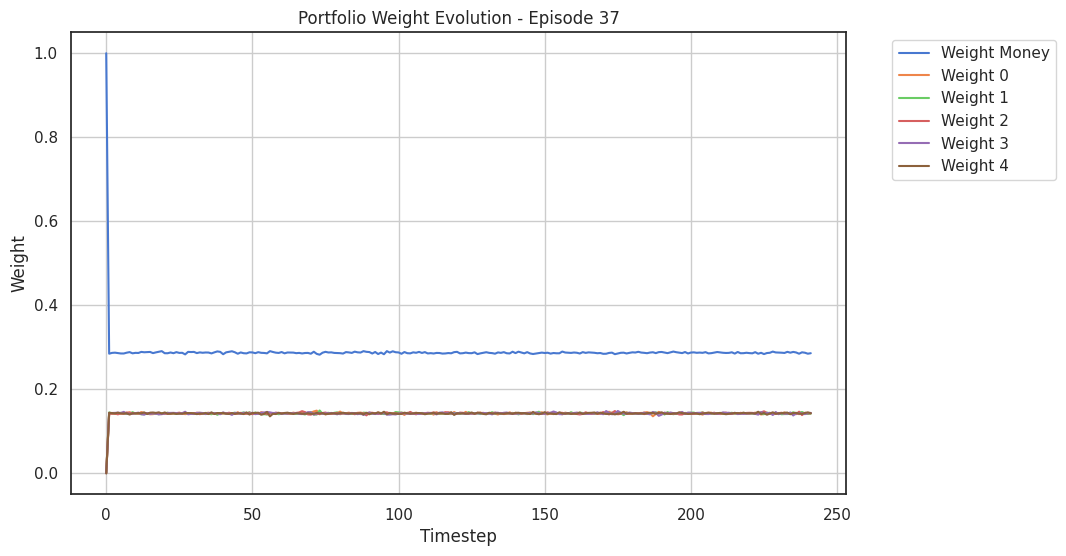

Start Episode 38
Episode: 38
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


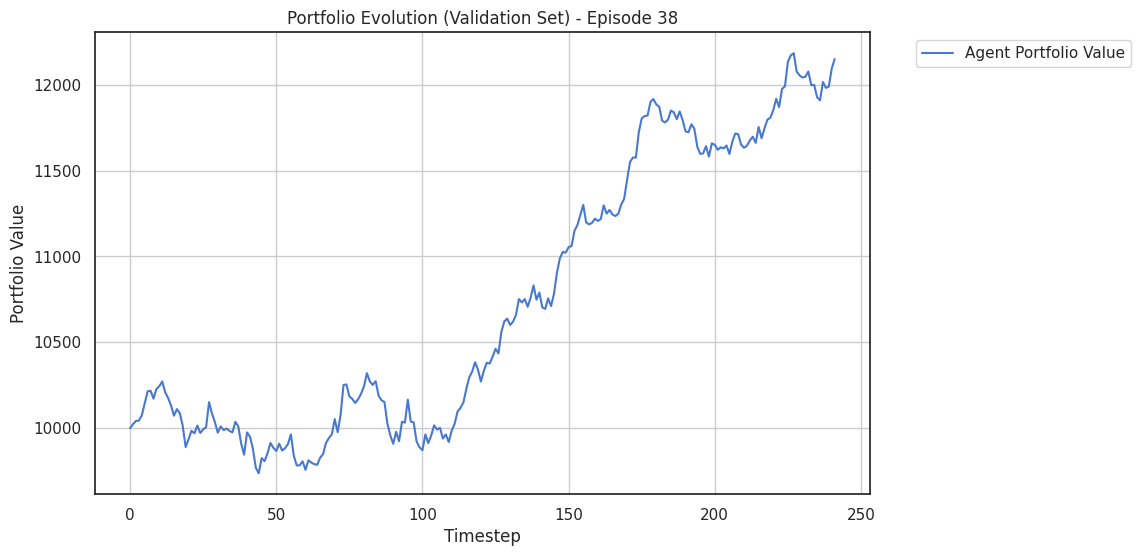

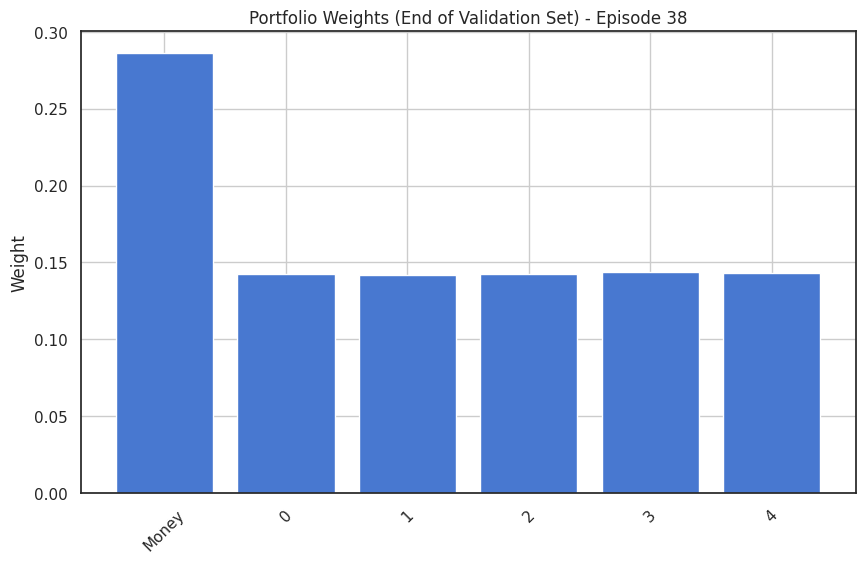

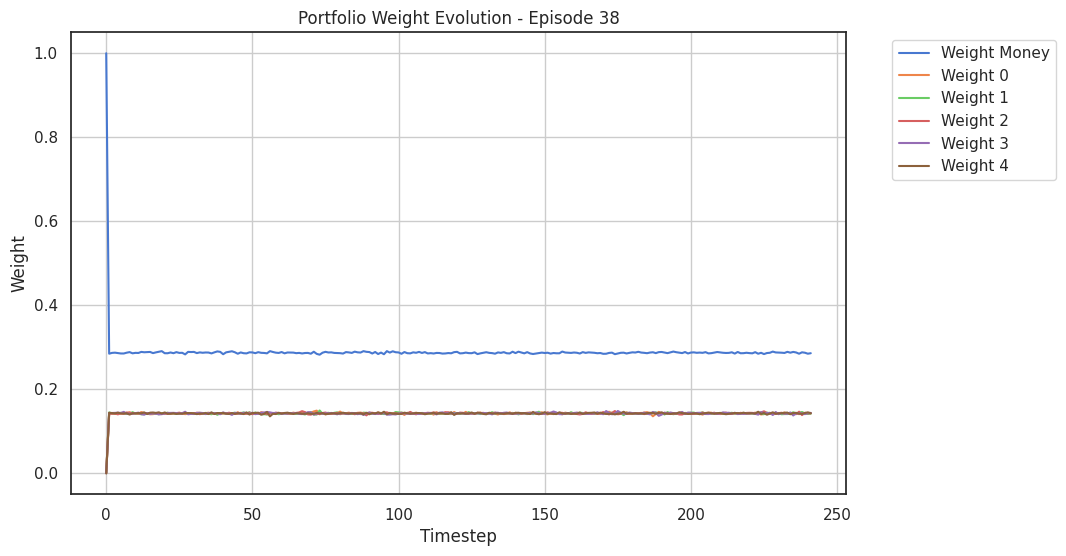

Start Episode 39
Episode: 39
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


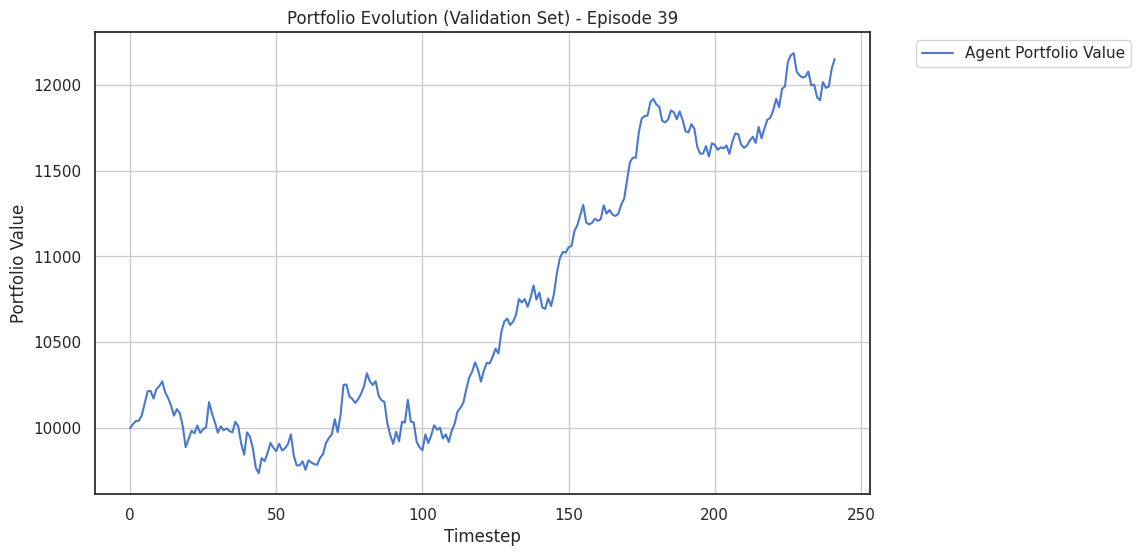

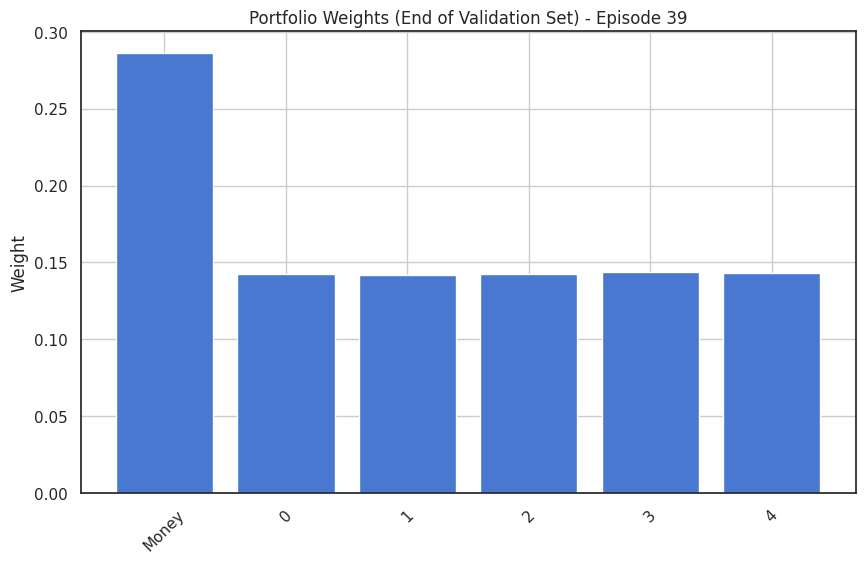

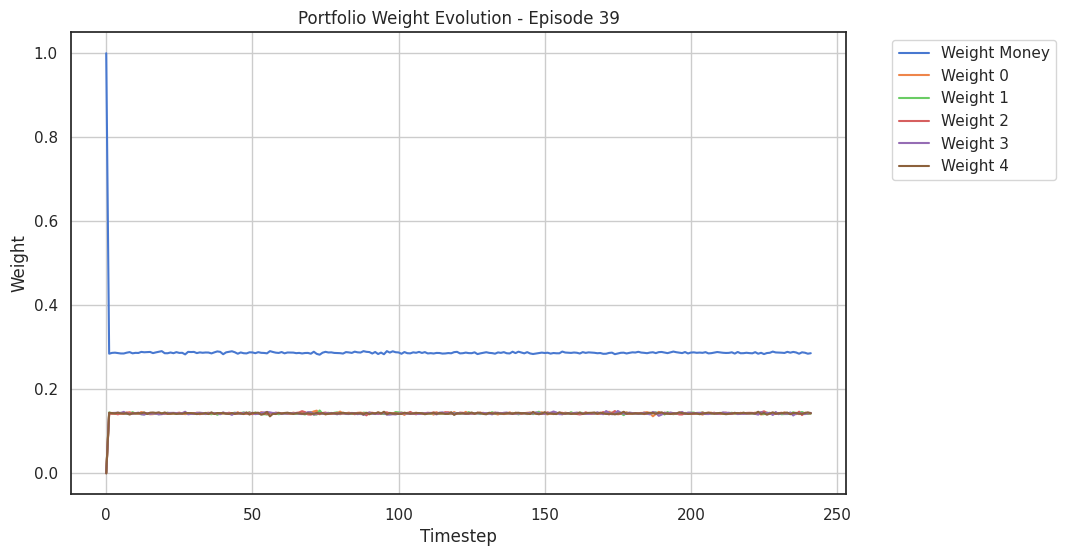

Start Episode 40
Episode: 40
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


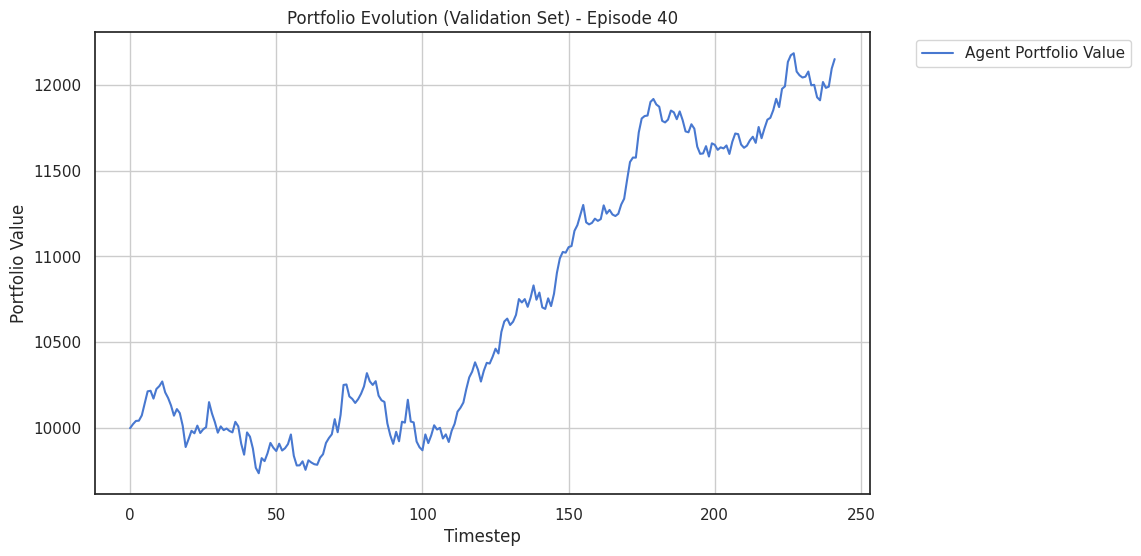

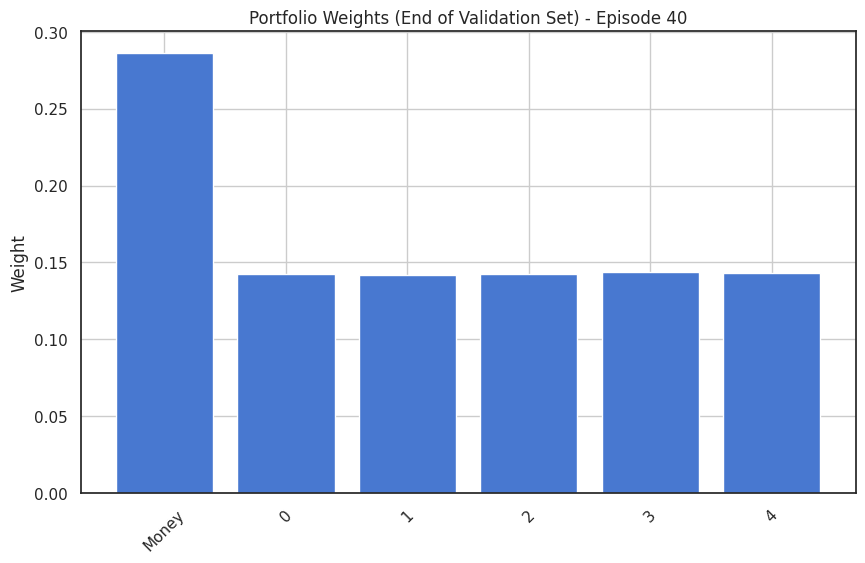

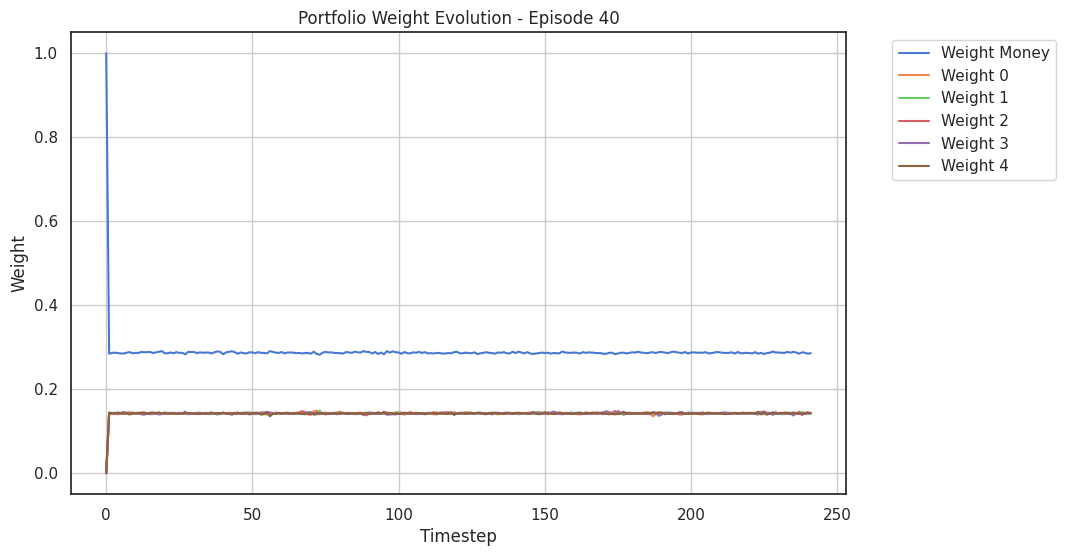

Start Episode 41
Episode: 41
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


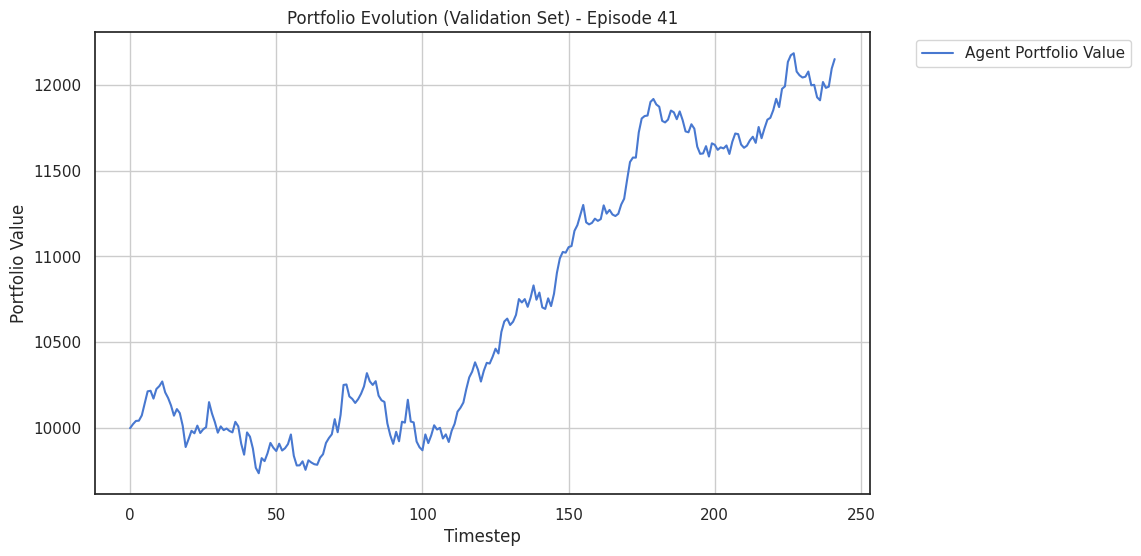

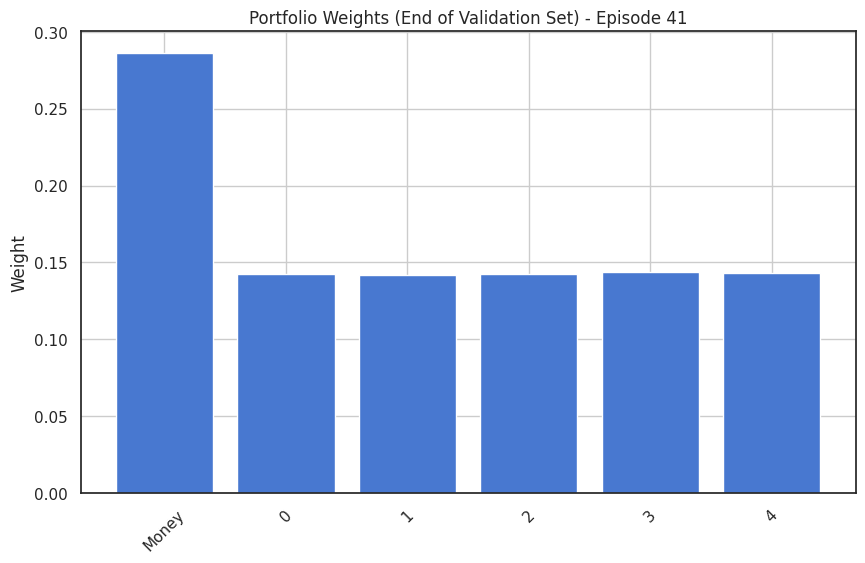

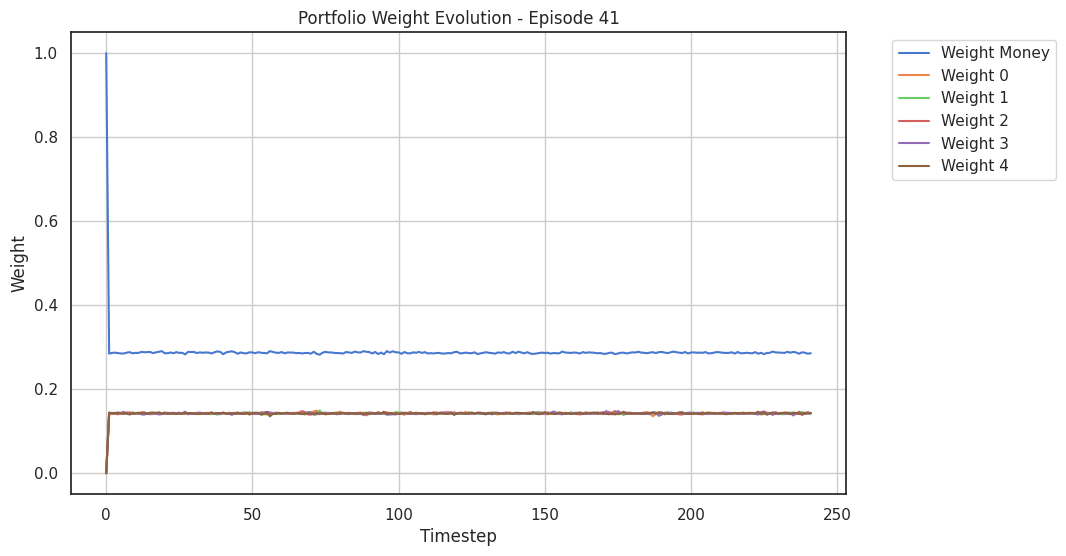

Start Episode 42
Episode: 42
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


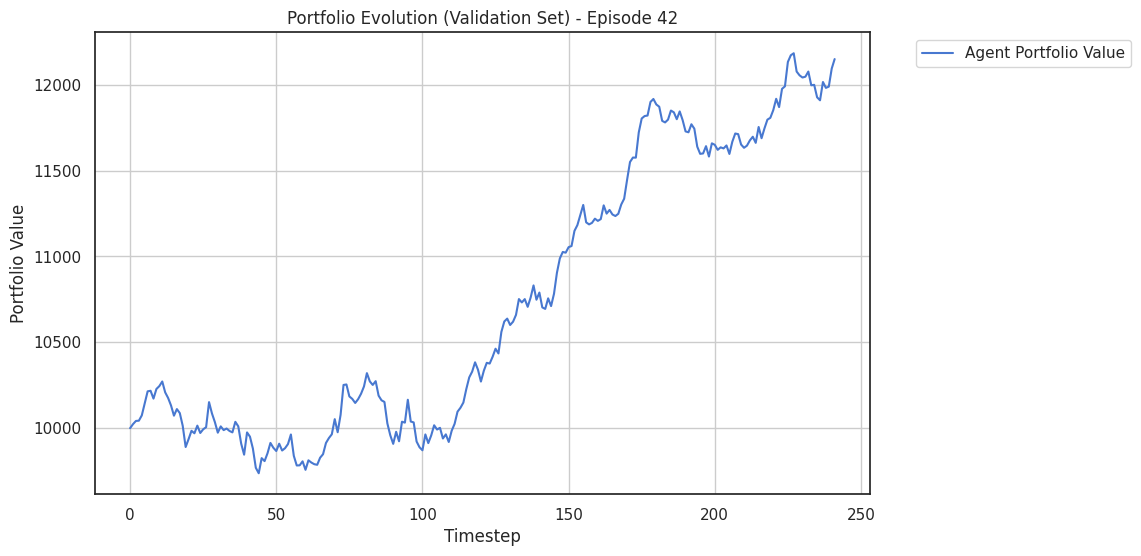

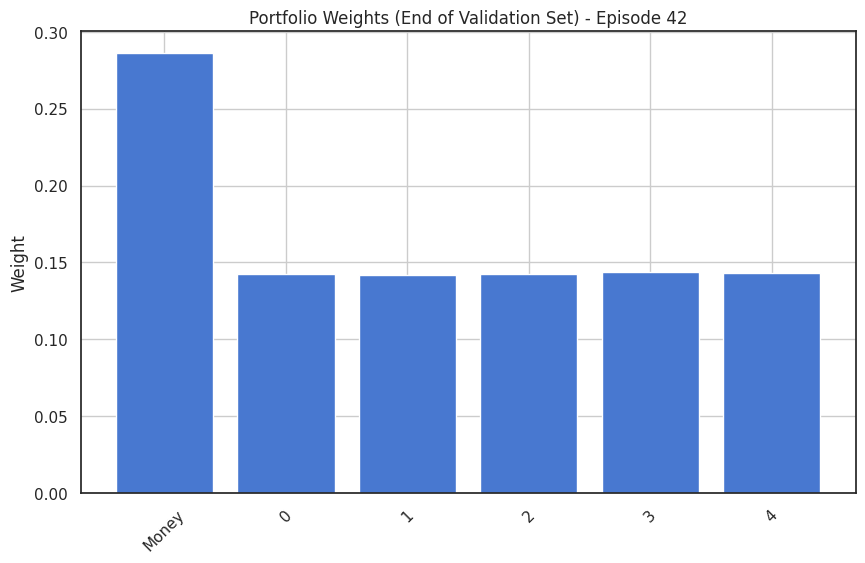

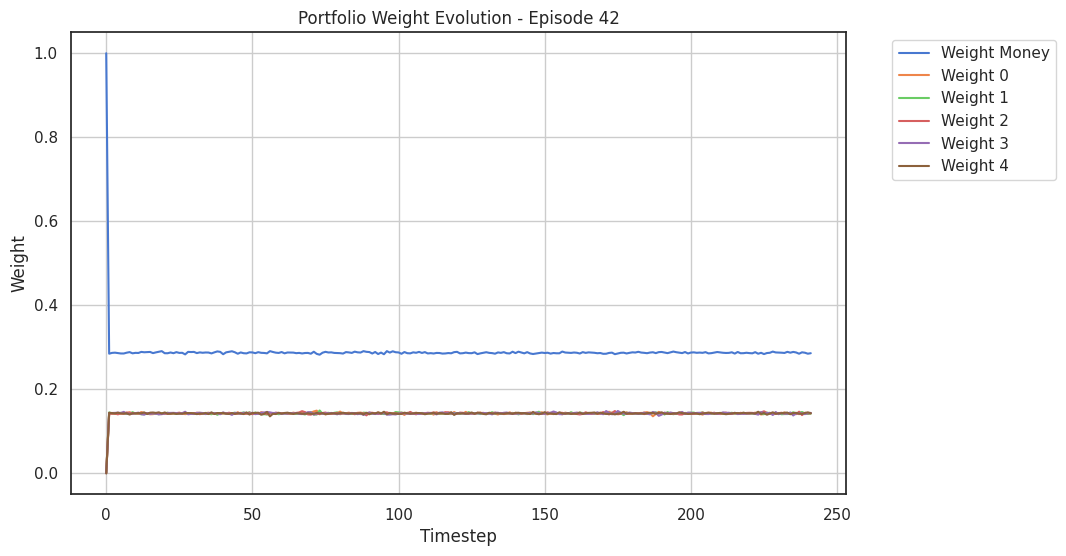

Start Episode 43
Episode: 43
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


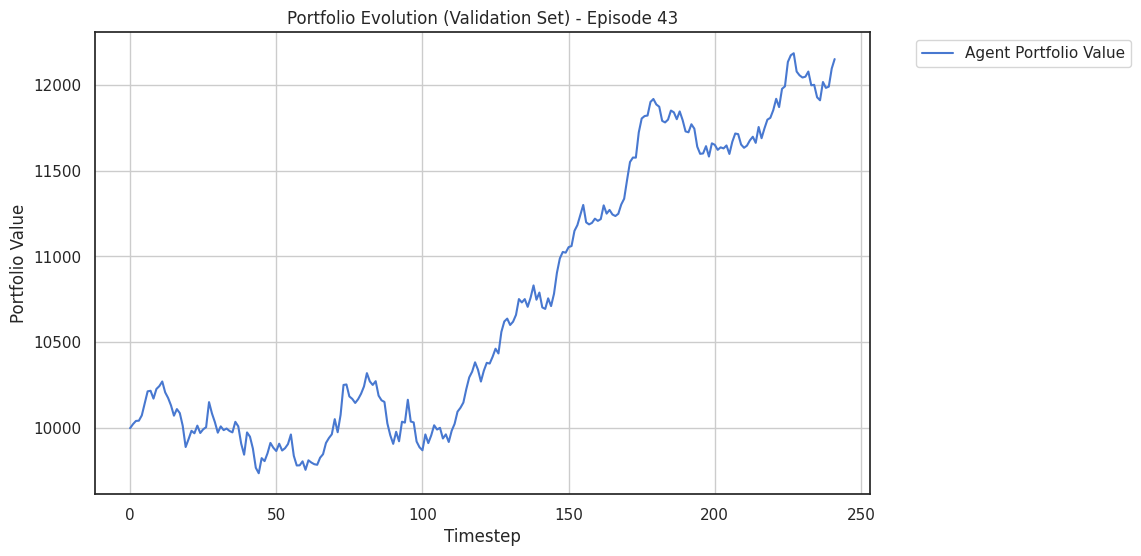

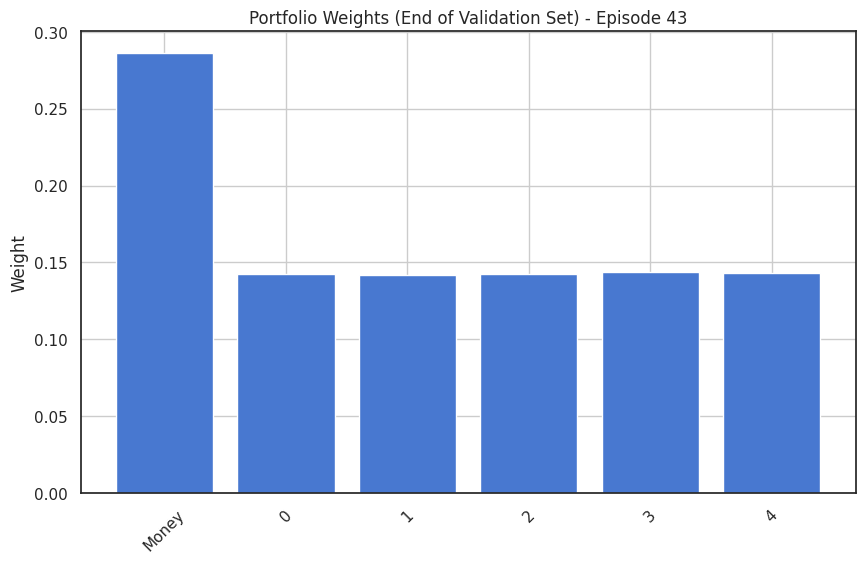

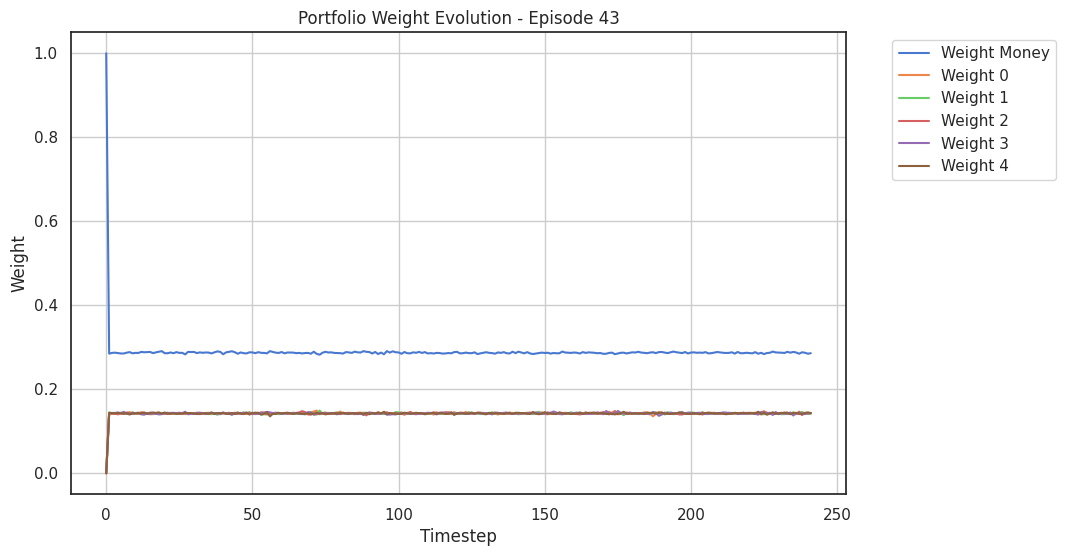

Start Episode 44
Episode: 44
End of test PF value: 12149.23
Min of test PF value: 9737.62
Max of test PF value: 12183.16
Mean of test PF value: 10732.44
Max Draw Down of test PF value: 534.3
End of test weights: [0.28582546 0.14270598 0.14202765 0.14277072 0.14367948 0.14299081]


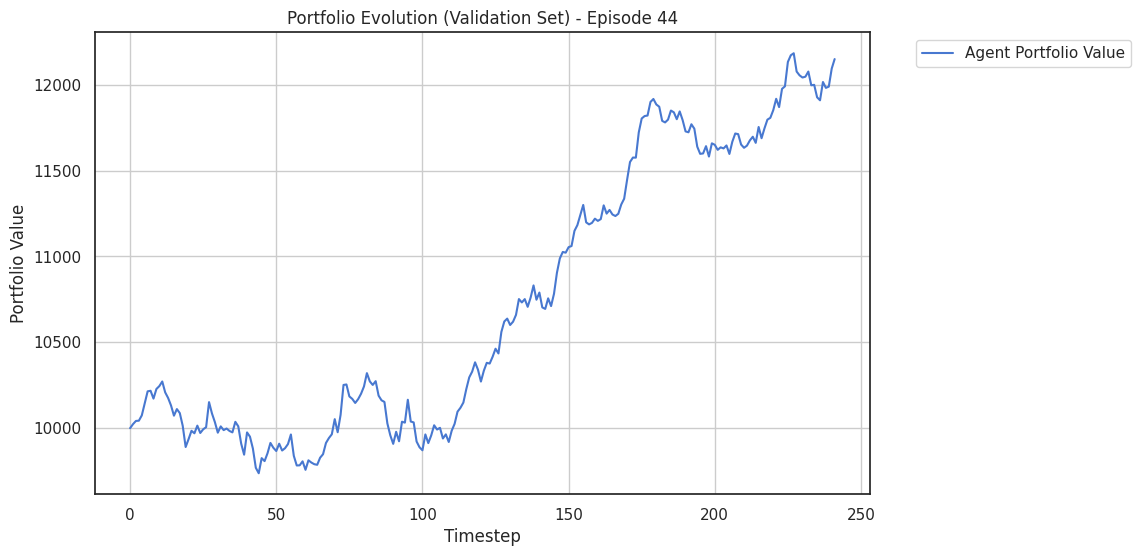

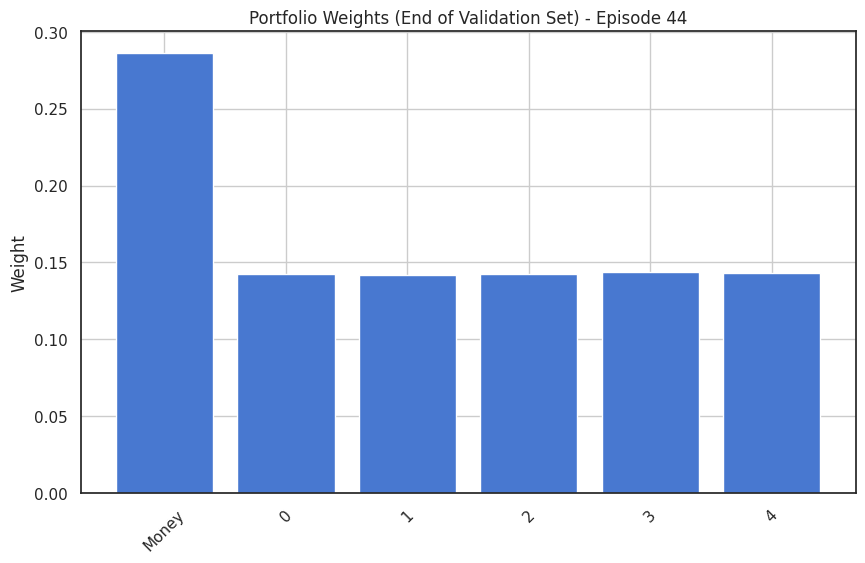

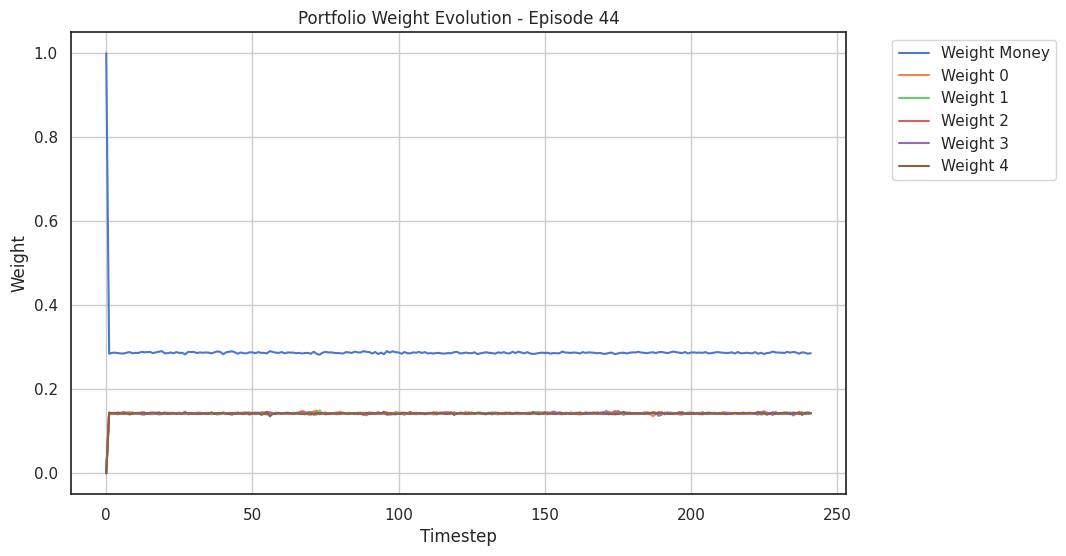

Start Episode 45
Episode: 45


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming Policy and PVM classes are already defined somewhere

############# TRAINING #####################
###########################################

# No need for tf.reset_default_graph() in TF 2.x, as eager execution is the default.

# Initialize the actor (policy network)
actor = Policy(m, n, optimizer=optimizer,
               trading_cost=trading_cost,
               interest_rate=interest_rate)

#Critic --> Value Function

# Initialize tensorflow variables
# In TF 2.x, variable initialization happens automatically when layers are created
# So no need to explicitly run an initializer.

list_final_pf = list()
list_final_pf_eq = list()
list_final_pf_s = list()
list_final_pf_fu = list()
state_fu = [0] * m
done_fu = [0] * m
pf_value_t_fu = [0] * m

for i in range(m):
    list_final_pf_fu.append(list())

###### Train #####
for e in range(n_episodes):
    print('Start Episode', e)
    if e == 0:
        eval_perf('Before Training')
    print('Episode:', e)

    # Initialize the PVM with the training parameters
    memory = PVM(m, sample_bias, total_steps=total_steps_train,
                 batch_size=batch_size, w_init=w_init_train)

    for nb in range(n_batches):
        # Draw the starting point of the batch
        i_start = memory.draw()

        # Reset the environment with the weight from PVM at the starting point
        # Reset also with a portfolio value with initial portfolio value
        state, done = env.reset(memory.get_W(i_start), pf_init_train, t=i_start)
        state_eq, done_eq = env_eq.reset(w_eq, pf_init_train, t=i_start)
        state_s, done_s = env_s.reset(w_s, pf_init_train, t=i_start)

        for i in range(m):
            state_fu[i], done_fu[i] = env_fu[i].reset(action_fu[i], pf_init_train, t=i_start)

        list_X_t, list_W_previous, list_pf_value_previous, list_dailyReturn_t = [], [], [], []
        list_pf_value_previous_eq, list_pf_value_previous_s = [], []
        list_pf_value_previous_fu = [[] for _ in range(m)]

        # state_list = list(state)  # Convert tuple to list
        # # Assuming you want W_previous (state[1]) to have shape (1, 6) or (batch_size, 6)
        # state_list[1] = tf.reshape(state_list[1], [1, -1])  # Reshape it to (1, 6) explicitly
        # state = tuple(state_list)  # Convert list back to tuple

        for bs in range(batch_size):
            # Reshape X_t as well
            X_t = tf.reshape(state[0], [-1] + list(state[0].shape))
            num_dimensions = len(state[1].shape)
            if num_dimensions < 2 :
                W_previous = tf.reshape(state[1],[-1] + list(state[1].shape))
            else :
                W_previous = state[1]

            # print('X_t shape - ', X_t.shape)
            # print('W_previous shape - ', W_previous.shape)

            # Load the different inputs from the previous loaded state
            pf_value_previous = state[2]

            if np.random.rand() < ratio_greedy:
                # Compute the action of the agent
                action = actor.compute_W(X_t, W_previous, pf_value_previous)
            else:
                action = get_random_action(m)

            # Step forward in the environment
            state, reward, done = env.step(action)
            state_eq, reward_eq, done_eq = env_eq.step(w_eq)
            state_s, reward_s, done_s = env_s.step(w_s)

            for i in range(m):
                state_fu[i], _, done_fu[i] = env_fu[i].step(action_fu[i])

            # Get the new state
            X_next = state[0]
            W_t = state[1]
            pf_value_t = state[2]

            pf_value_t_eq = state_eq[2]
            pf_value_t_s = state_s[2]

            for i in range(m):
                pf_value_t_fu[i] = state_fu[i][2]

            # Compute the returns
            dailyReturn_t = X_next[-1, :, -1]
            # Update into the PVM
            memory.update(i_start + bs, W_t)
            # Store elements
            list_X_t.append(tf.squeeze(X_t,[0]))
            list_W_previous.append(tf.squeeze(W_previous,[0]))
            list_pf_value_previous.append([pf_value_previous])
            list_dailyReturn_t.append(dailyReturn_t)

            list_pf_value_previous_eq.append(pf_value_t_eq)
            list_pf_value_previous_s.append(pf_value_t_s)

            for i in range(m):
                list_pf_value_previous_fu[i].append(pf_value_t_fu[i])

            if bs == batch_size - 1:
                list_final_pf.append(pf_value_t)
                list_final_pf_eq.append(pf_value_t_eq)
                list_final_pf_s.append(pf_value_t_s)
                for i in range(m):
                    list_final_pf_fu[i].append(pf_value_t_fu[i])

        list_X_t = np.array(list_X_t)
        list_W_previous = np.array(list_W_previous)
        list_pf_value_previous = np.array(list_pf_value_previous)
        list_dailyReturn_t = np.array(list_dailyReturn_t)

        # For each batch, train the network to maximize the reward
        # print(list_X_t)
        actor.train(list_X_t, list_W_previous,
                    list_pf_value_previous, list_dailyReturn_t)

    # Evaluate performance after each episode
    eval_perf(e)


**Testing**

In [ ]:
#######TEST#######


#initialization of the environment
state, done = env.reset(w_init_test, pf_init_test, t = total_steps_train)

state_eq, done_eq = env_eq.reset(w_eq, pf_init_test, t = total_steps_train)
state_s, done_s = env_s.reset(w_s, pf_init_test, t = total_steps_train)

for i in range(m):
    state_fu[i],  done_fu[i] = env_fu[i].reset(action_fu[i], pf_init_test, t = total_steps_train)


#first element of the weight and portfolio value
p_list = [pf_init_test]
w_list = [w_init_test]

p_list_eq = [pf_init_test]
p_list_s = [pf_init_test]


p_list_fu = list()
for i in range(m):
    p_list_fu.append([pf_init_test])

pf_value_t_fu = [0]*m


W_previous = tf.reshape(state[1],[-1]+ list(state[1].shape))
for k in range(total_steps_train +total_steps_val-int(n/2), total_steps_train +total_steps_val +total_steps_test -n):
    X_t = tf.reshape(state[0],[-1]+ list(state[0].shape))

    num_dimensions = len(state[1].shape)
    if num_dimensions < 2 :
        W_previous = tf.reshape(state[1],[-1] + list(state[1].shape))
    else :
        W_previous = state[1]

    pf_value_previous = state[2]
    #compute the action
    action = actor.get_action(X_t, W_previous,pf_value_previous)
    #step forward environment
    state, reward, done = env.step(action)
    state_eq, reward_eq, done_eq = env_eq.step(w_eq)
    state_s, reward_s, done_s = env_s.step(w_s)


    for i in range(m):
        state_fu[i], _ , done_fu[i] = env_fu[i].step(action_fu[i])


    X_next = state[0]
    W_t = state[1]
    pf_value_t = state[2]

    pf_value_t_eq = state_eq[2]
    pf_value_t_s = state_s[2]
    for i in range(m):
        pf_value_t_fu[i] = state_fu[i][2]

    dailyReturn_t = X_next[-1, :, -1]
    if k%20 == 0:
        print('current portfolio value', round(pf_value_previous,0))
        print('weights', W_previous)
    p_list.append(pf_value_t)
    w_list.append(W_t)

    p_list_eq.append(pf_value_t_eq)
    p_list_s.append(pf_value_t_s)
    for i in range(m):
        p_list_fu[i].append(pf_value_t_fu[i])

    #here to break the loop/not in original code
    if k== total_steps_train +total_steps_val-int(n/2) + 100:
        break



current portfolio value 10427.0
weights tf.Tensor([[0.28805292 0.14343369 0.14097683 0.14317681 0.139414   0.14494579]], shape=(1, 6), dtype=float32)
current portfolio value 10245.0
weights tf.Tensor([[0.28686908 0.14225763 0.14245428 0.14303188 0.14340281 0.14198431]], shape=(1, 6), dtype=float32)
current portfolio value 10127.0
weights tf.Tensor([[0.28673965 0.14500238 0.14067781 0.14437656 0.14383383 0.13936974]], shape=(1, 6), dtype=float32)
current portfolio value 10505.0
weights tf.Tensor([[0.2822442  0.14037523 0.14950334 0.14243416 0.1435269  0.14191616]], shape=(1, 6), dtype=float32)
current portfolio value 10285.0
weights tf.Tensor([[0.2838746  0.1442863  0.14348936 0.14102116 0.14226413 0.14506441]], shape=(1, 6), dtype=float32)


**Analysis**

In [ ]:
path = "individual_stocks_5yr/"
times = pd.read_csv(path+"A_data.csv").date
test_start_day =total_steps_train +total_steps_val-int(n/2)+10
times = list(times[test_start_day:])

# Agilent Technologies, Inc. -- Healthcare, Life Sciences, and Diagnostics

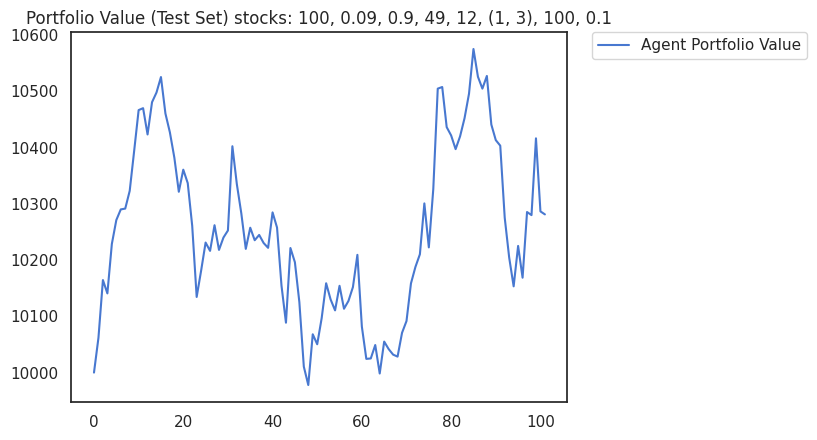

2.8122070312500003


In [ ]:
#batch_size, learning, ratio_greedy, e, n, kernel1_size, n_batches, ratio_regul

data_type = "stocks"
list_stock = [i for i in range(m)]


plt.title('Portfolio Value (Test Set) {}: {}, {}, {}, {}, {}, {}, {}, {}'.format(data_type, batch_size, learning, ratio_greedy, e, n, kernel1_size, n_batches, ratio_regul))
plt.plot(p_list, label = 'Agent Portfolio Value')
# plt.plot(p_list_eq, label = 'Equi-weighted Portfolio Value')
# plt.plot(p_list_s, label = 'Secured Portfolio Value')
# for i in range(m):
    # plt.plot(p_list_fu[i], label = 'Full Stock {} Portfolio Value'.format(list_stock[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

final_pf_value = p_list[-1]
imp = (final_pf_value - pf_init_train)/pf_init_train
imp *= 100
print(imp)